In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from statsmodels.api import OLS
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

C:\Users\Mohammed Yusuf Khan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/getmykhan/toolstack/master/Datasets/Salary.csv')

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(1, input_shape=([1])))
model1.compile(loss='mean_squared_error', optimizer=tf.optimizers.RMSprop(1), metrics=['mean_absolute_error', 'mean_squared_error'])
model1_history = model1.fit(df['YearsExperience'], df['Salary'], epochs=12000)

Epoch 1/12000
30/30 [==============================] - 0s 2ms/sample - loss: 6502508544.0000 - mean_absolute_error: 76000.5078 - mean_squared_error: 6502508544.0000
Epoch 2/12000
30/30 [==============================] - 0s 49us/sample - loss: 6499009024.0000 - mean_absolute_error: 75980.5469 - mean_squared_error: 6499009024.0000
Epoch 3/12000
30/30 [==============================] - 0s 50us/sample - loss: 6496471040.0000 - mean_absolute_error: 75966.0703 - mean_squared_error: 6496471040.0000
Epoch 4/12000
30/30 [==============================] - 0s 66us/sample - loss: 6494346240.0000 - mean_absolute_error: 75953.9453 - mean_squared_error: 6494346240.0000
Epoch 5/12000
30/30 [==============================] - 0s 50us/sample - loss: 6492461568.0000 - mean_absolute_error: 75943.1797 - mean_squared_error: 6492461568.0000
Epoch 6/12000
30/30 [==============================] - 0s 47us/sample - loss: 6490733568.0000 - mean_absolute_error: 75933.3203 - mean_squared_error: 6490733568.0000
Epoch

Epoch 51/12000
30/30 [==============================] - 0s 51us/sample - loss: 6437280768.0000 - mean_absolute_error: 75627.4844 - mean_squared_error: 6437280768.0000
Epoch 52/12000
30/30 [==============================] - 0s 49us/sample - loss: 6436177408.0000 - mean_absolute_error: 75621.1562 - mean_squared_error: 6436177408.0000
Epoch 53/12000
30/30 [==============================] - 0s 50us/sample - loss: 6435075072.0000 - mean_absolute_error: 75614.8359 - mean_squared_error: 6435075072.0000
Epoch 54/12000
30/30 [==============================] - 0s 33us/sample - loss: 6433973248.0000 - mean_absolute_error: 75608.5156 - mean_squared_error: 6433973248.0000
Epoch 55/12000
30/30 [==============================] - 0s 49us/sample - loss: 6432871424.0000 - mean_absolute_error: 75602.2031 - mean_squared_error: 6432871424.0000
Epoch 56/12000
30/30 [==============================] - 0s 49us/sample - loss: 6431770112.0000 - mean_absolute_error: 75595.8828 - mean_squared_error: 6431770112.000

Epoch 101/12000
30/30 [==============================] - 0s 33us/sample - loss: 6382360576.0000 - mean_absolute_error: 75311.9141 - mean_squared_error: 6382360576.0000
Epoch 102/12000
30/30 [==============================] - 0s 33us/sample - loss: 6381264896.0000 - mean_absolute_error: 75305.6094 - mean_squared_error: 6381264896.0000
Epoch 103/12000
30/30 [==============================] - 0s 50us/sample - loss: 6380168704.0000 - mean_absolute_error: 75299.2969 - mean_squared_error: 6380168704.0000
Epoch 104/12000
30/30 [==============================] - 0s 33us/sample - loss: 6379074048.0000 - mean_absolute_error: 75292.9922 - mean_squared_error: 6379074048.0000
Epoch 105/12000
30/30 [==============================] - 0s 50us/sample - loss: 6377978880.0000 - mean_absolute_error: 75286.6797 - mean_squared_error: 6377978880.0000
Epoch 106/12000
30/30 [==============================] - 0s 50us/sample - loss: 6376884224.0000 - mean_absolute_error: 75280.3750 - mean_squared_error: 63768842

Epoch 150/12000
30/30 [==============================] - 0s 33us/sample - loss: 6328794624.0000 - mean_absolute_error: 75002.7969 - mean_squared_error: 6328794624.0000
Epoch 151/12000
30/30 [==============================] - 0s 50us/sample - loss: 6327704064.0000 - mean_absolute_error: 74996.4922 - mean_squared_error: 6327704064.0000
Epoch 152/12000
30/30 [==============================] - 0s 50us/sample - loss: 6326612992.0000 - mean_absolute_error: 74990.1797 - mean_squared_error: 6326612992.0000
Epoch 153/12000
30/30 [==============================] - 0s 51us/sample - loss: 6325521920.0000 - mean_absolute_error: 74983.8828 - mean_squared_error: 6325521920.0000
Epoch 154/12000
30/30 [==============================] - 0s 50us/sample - loss: 6324431360.0000 - mean_absolute_error: 74977.5781 - mean_squared_error: 6324431360.0000
Epoch 155/12000
30/30 [==============================] - 0s 67us/sample - loss: 6323340800.0000 - mean_absolute_error: 74971.2656 - mean_squared_error: 63233408

Epoch 199/12000
30/30 [==============================] - 0s 50us/sample - loss: 6275457024.0000 - mean_absolute_error: 74693.7031 - mean_squared_error: 6275457024.0000
Epoch 200/12000
30/30 [==============================] - 0s 49us/sample - loss: 6274371072.0000 - mean_absolute_error: 74687.3828 - mean_squared_error: 6274371072.0000
Epoch 201/12000
30/30 [==============================] - 0s 49us/sample - loss: 6273285120.0000 - mean_absolute_error: 74681.0859 - mean_squared_error: 6273285120.0000
Epoch 202/12000
30/30 [==============================] - 0s 49us/sample - loss: 6272198656.0000 - mean_absolute_error: 74674.7734 - mean_squared_error: 6272198656.0000
Epoch 203/12000
30/30 [==============================] - 0s 50us/sample - loss: 6271112704.0000 - mean_absolute_error: 74668.4688 - mean_squared_error: 6271112704.0000
Epoch 204/12000
30/30 [==============================] - 0s 50us/sample - loss: 6270027264.0000 - mean_absolute_error: 74662.1484 - mean_squared_error: 62700272

Epoch 248/12000
30/30 [==============================] - 0s 66us/sample - loss: 6222348288.0000 - mean_absolute_error: 74384.5859 - mean_squared_error: 6222348288.0000
Epoch 249/12000
30/30 [==============================] - 0s 100us/sample - loss: 6221266944.0000 - mean_absolute_error: 74378.2812 - mean_squared_error: 6221266944.0000
Epoch 250/12000
30/30 [==============================] - 0s 49us/sample - loss: 6220185600.0000 - mean_absolute_error: 74371.9766 - mean_squared_error: 6220185600.0000
Epoch 251/12000
30/30 [==============================] - 0s 100us/sample - loss: 6219104256.0000 - mean_absolute_error: 74365.6641 - mean_squared_error: 6219104256.0000
Epoch 252/12000
30/30 [==============================] - 0s 66us/sample - loss: 6218022912.0000 - mean_absolute_error: 74359.3594 - mean_squared_error: 6218022912.0000
Epoch 253/12000
30/30 [==============================] - 0s 50us/sample - loss: 6216942080.0000 - mean_absolute_error: 74353.0391 - mean_squared_error: 621694

Epoch 297/12000
30/30 [==============================] - 0s 66us/sample - loss: 6169467904.0000 - mean_absolute_error: 74075.4766 - mean_squared_error: 6169467904.0000
Epoch 298/12000
30/30 [==============================] - 0s 33us/sample - loss: 6168390656.0000 - mean_absolute_error: 74069.1641 - mean_squared_error: 6168390656.0000
Epoch 299/12000
30/30 [==============================] - 0s 33us/sample - loss: 6167314944.0000 - mean_absolute_error: 74062.8672 - mean_squared_error: 6167314944.0000
Epoch 300/12000
30/30 [==============================] - 0s 50us/sample - loss: 6166238208.0000 - mean_absolute_error: 74056.5547 - mean_squared_error: 6166238208.0000
Epoch 301/12000
30/30 [==============================] - 0s 66us/sample - loss: 6165161472.0000 - mean_absolute_error: 74050.2422 - mean_squared_error: 6165161472.0000
Epoch 302/12000
30/30 [==============================] - 0s 50us/sample - loss: 6164085760.0000 - mean_absolute_error: 74043.9297 - mean_squared_error: 61640857

Epoch 346/12000
30/30 [==============================] - 0s 50us/sample - loss: 6116816384.0000 - mean_absolute_error: 73766.3672 - mean_squared_error: 6116816384.0000
Epoch 347/12000
30/30 [==============================] - 0s 33us/sample - loss: 6115744256.0000 - mean_absolute_error: 73760.0547 - mean_squared_error: 6115744256.0000
Epoch 348/12000
30/30 [==============================] - 0s 33us/sample - loss: 6114671616.0000 - mean_absolute_error: 73753.7500 - mean_squared_error: 6114671616.0000
Epoch 349/12000
30/30 [==============================] - 0s 50us/sample - loss: 6113600000.0000 - mean_absolute_error: 73747.4453 - mean_squared_error: 6113600000.0000
Epoch 350/12000
30/30 [==============================] - 0s 33us/sample - loss: 6112528384.0000 - mean_absolute_error: 73741.1328 - mean_squared_error: 6112528384.0000
Epoch 351/12000
30/30 [==============================] - 0s 33us/sample - loss: 6111456256.0000 - mean_absolute_error: 73734.8359 - mean_squared_error: 61114562

Epoch 395/12000
30/30 [==============================] - 0s 33us/sample - loss: 6064392704.0000 - mean_absolute_error: 73457.2578 - mean_squared_error: 6064392704.0000
Epoch 396/12000
30/30 [==============================] - 0s 50us/sample - loss: 6063325184.0000 - mean_absolute_error: 73450.9453 - mean_squared_error: 6063325184.0000
Epoch 397/12000
30/30 [==============================] - 0s 67us/sample - loss: 6062258176.0000 - mean_absolute_error: 73444.6406 - mean_squared_error: 6062258176.0000
Epoch 398/12000
30/30 [==============================] - 0s 50us/sample - loss: 6061190656.0000 - mean_absolute_error: 73438.3359 - mean_squared_error: 6061190656.0000
Epoch 399/12000
30/30 [==============================] - 0s 50us/sample - loss: 6060123136.0000 - mean_absolute_error: 73432.0312 - mean_squared_error: 6060123136.0000
Epoch 400/12000
30/30 [==============================] - 0s 51us/sample - loss: 6059056640.0000 - mean_absolute_error: 73425.7266 - mean_squared_error: 60590566

Epoch 444/12000
30/30 [==============================] - 0s 51us/sample - loss: 6012197888.0000 - mean_absolute_error: 73148.1484 - mean_squared_error: 6012197888.0000
Epoch 445/12000
30/30 [==============================] - 0s 33us/sample - loss: 6011135488.0000 - mean_absolute_error: 73141.8438 - mean_squared_error: 6011135488.0000
Epoch 446/12000
30/30 [==============================] - 0s 51us/sample - loss: 6010072576.0000 - mean_absolute_error: 73135.5312 - mean_squared_error: 6010072576.0000
Epoch 447/12000
30/30 [==============================] - 0s 50us/sample - loss: 6009010176.0000 - mean_absolute_error: 73129.2266 - mean_squared_error: 6009010176.0000
Epoch 448/12000
30/30 [==============================] - 0s 33us/sample - loss: 6007947264.0000 - mean_absolute_error: 73122.9141 - mean_squared_error: 6007947264.0000
Epoch 449/12000
30/30 [==============================] - 0s 50us/sample - loss: 6006884864.0000 - mean_absolute_error: 73116.6094 - mean_squared_error: 60068848

Epoch 493/12000
30/30 [==============================] - 0s 50us/sample - loss: 5960232448.0000 - mean_absolute_error: 72839.0469 - mean_squared_error: 5960232448.0000
Epoch 494/12000
30/30 [==============================] - 0s 83us/sample - loss: 5959174656.0000 - mean_absolute_error: 72832.7422 - mean_squared_error: 5959174656.0000
Epoch 495/12000
30/30 [==============================] - 0s 50us/sample - loss: 5958116864.0000 - mean_absolute_error: 72826.4297 - mean_squared_error: 5958116864.0000
Epoch 496/12000
30/30 [==============================] - 0s 50us/sample - loss: 5957058560.0000 - mean_absolute_error: 72820.1250 - mean_squared_error: 5957058560.0000
Epoch 497/12000
30/30 [==============================] - 0s 50us/sample - loss: 5956000768.0000 - mean_absolute_error: 72813.8203 - mean_squared_error: 5956000768.0000
Epoch 498/12000
30/30 [==============================] - 0s 67us/sample - loss: 5954943488.0000 - mean_absolute_error: 72807.5078 - mean_squared_error: 59549434

Epoch 542/12000
30/30 [==============================] - 0s 67us/sample - loss: 5908495360.0000 - mean_absolute_error: 72529.9531 - mean_squared_error: 5908495360.0000
Epoch 543/12000
30/30 [==============================] - 0s 50us/sample - loss: 5907441152.0000 - mean_absolute_error: 72523.6328 - mean_squared_error: 5907441152.0000
Epoch 544/12000
30/30 [==============================] - 0s 67us/sample - loss: 5906388480.0000 - mean_absolute_error: 72517.3359 - mean_squared_error: 5906388480.0000
Epoch 545/12000
30/30 [==============================] - 0s 55us/sample - loss: 5905334784.0000 - mean_absolute_error: 72511.0156 - mean_squared_error: 5905334784.0000
Epoch 546/12000
30/30 [==============================] - 0s 67us/sample - loss: 5904281088.0000 - mean_absolute_error: 72504.7109 - mean_squared_error: 5904281088.0000
Epoch 547/12000
30/30 [==============================] - 0s 117us/sample - loss: 5903228416.0000 - mean_absolute_error: 72498.3984 - mean_squared_error: 5903228

Epoch 591/12000
30/30 [==============================] - 0s 67us/sample - loss: 5856985088.0000 - mean_absolute_error: 72220.8359 - mean_squared_error: 5856985088.0000
Epoch 592/12000
30/30 [==============================] - 0s 50us/sample - loss: 5855936512.0000 - mean_absolute_error: 72214.5312 - mean_squared_error: 5855936512.0000
Epoch 593/12000
30/30 [==============================] - 0s 33us/sample - loss: 5854888448.0000 - mean_absolute_error: 72208.2266 - mean_squared_error: 5854888448.0000
Epoch 594/12000
30/30 [==============================] - 0s 33us/sample - loss: 5853839360.0000 - mean_absolute_error: 72201.9141 - mean_squared_error: 5853839360.0000
Epoch 595/12000
30/30 [==============================] - 0s 83us/sample - loss: 5852790784.0000 - mean_absolute_error: 72195.6016 - mean_squared_error: 5852790784.0000
Epoch 596/12000
30/30 [==============================] - 0s 50us/sample - loss: 5851742720.0000 - mean_absolute_error: 72189.2969 - mean_squared_error: 58517427

Epoch 640/12000
30/30 [==============================] - 0s 67us/sample - loss: 5805704704.0000 - mean_absolute_error: 71911.7344 - mean_squared_error: 5805704704.0000
Epoch 641/12000
30/30 [==============================] - 0s 67us/sample - loss: 5804660736.0000 - mean_absolute_error: 71905.4219 - mean_squared_error: 5804660736.0000
Epoch 642/12000
30/30 [==============================] - 0s 67us/sample - loss: 5803616256.0000 - mean_absolute_error: 71899.1172 - mean_squared_error: 5803616256.0000
Epoch 643/12000
30/30 [==============================] - 0s 33us/sample - loss: 5802572800.0000 - mean_absolute_error: 71892.7969 - mean_squared_error: 5802572800.0000
Epoch 644/12000
30/30 [==============================] - 0s 84us/sample - loss: 5801528320.0000 - mean_absolute_error: 71886.5000 - mean_squared_error: 5801528320.0000
Epoch 645/12000
30/30 [==============================] - 0s 66us/sample - loss: 5800485376.0000 - mean_absolute_error: 71880.1953 - mean_squared_error: 58004853

Epoch 689/12000
30/30 [==============================] - 0s 50us/sample - loss: 5754654208.0000 - mean_absolute_error: 71602.6406 - mean_squared_error: 5754654208.0000
Epoch 690/12000
30/30 [==============================] - 0s 33us/sample - loss: 5753615360.0000 - mean_absolute_error: 71596.3359 - mean_squared_error: 5753615360.0000
Epoch 691/12000
30/30 [==============================] - 0s 50us/sample - loss: 5752576000.0000 - mean_absolute_error: 71590.0156 - mean_squared_error: 5752576000.0000
Epoch 692/12000
30/30 [==============================] - 0s 50us/sample - loss: 5751536640.0000 - mean_absolute_error: 71583.7188 - mean_squared_error: 5751536640.0000
Epoch 693/12000
30/30 [==============================] - 0s 50us/sample - loss: 5750497280.0000 - mean_absolute_error: 71577.4062 - mean_squared_error: 5750497280.0000
Epoch 694/12000
30/30 [==============================] - 0s 50us/sample - loss: 5749457920.0000 - mean_absolute_error: 71571.1016 - mean_squared_error: 57494579

Epoch 738/12000
30/30 [==============================] - 0s 33us/sample - loss: 5703833088.0000 - mean_absolute_error: 71293.5469 - mean_squared_error: 5703833088.0000
Epoch 739/12000
30/30 [==============================] - 0s 33us/sample - loss: 5702798336.0000 - mean_absolute_error: 71287.2344 - mean_squared_error: 5702798336.0000
Epoch 740/12000
30/30 [==============================] - 0s 33us/sample - loss: 5701763584.0000 - mean_absolute_error: 71280.9297 - mean_squared_error: 5701763584.0000
Epoch 741/12000
30/30 [==============================] - 0s 33us/sample - loss: 5700728832.0000 - mean_absolute_error: 71274.6250 - mean_squared_error: 5700728832.0000
Epoch 742/12000
30/30 [==============================] - 0s 33us/sample - loss: 5699695104.0000 - mean_absolute_error: 71268.3203 - mean_squared_error: 5699695104.0000
Epoch 743/12000
30/30 [==============================] - 0s 51us/sample - loss: 5698659840.0000 - mean_absolute_error: 71262.0078 - mean_squared_error: 56986598

Epoch 787/12000
30/30 [==============================] - 0s 32us/sample - loss: 5653239808.0000 - mean_absolute_error: 70984.4609 - mean_squared_error: 5653239808.0000
Epoch 788/12000
30/30 [==============================] - 0s 49us/sample - loss: 5652209664.0000 - mean_absolute_error: 70978.1484 - mean_squared_error: 5652209664.0000
Epoch 789/12000
30/30 [==============================] - 0s 33us/sample - loss: 5651179008.0000 - mean_absolute_error: 70971.8438 - mean_squared_error: 5651179008.0000
Epoch 790/12000
30/30 [==============================] - 0s 100us/sample - loss: 5650148864.0000 - mean_absolute_error: 70965.5312 - mean_squared_error: 5650148864.0000
Epoch 791/12000
30/30 [==============================] - 0s 83us/sample - loss: 5649119744.0000 - mean_absolute_error: 70959.2266 - mean_squared_error: 5649119744.0000
Epoch 792/12000
30/30 [==============================] - 0s 67us/sample - loss: 5648090112.0000 - mean_absolute_error: 70952.9141 - mean_squared_error: 5648090

Epoch 836/12000
30/30 [==============================] - 0s 33us/sample - loss: 5602874880.0000 - mean_absolute_error: 70675.3672 - mean_squared_error: 5602874880.0000
Epoch 837/12000
30/30 [==============================] - 0s 32us/sample - loss: 5601848832.0000 - mean_absolute_error: 70669.0547 - mean_squared_error: 5601848832.0000
Epoch 838/12000
30/30 [==============================] - 0s 32us/sample - loss: 5600823808.0000 - mean_absolute_error: 70662.7500 - mean_squared_error: 5600823808.0000
Epoch 839/12000
30/30 [==============================] - 0s 33us/sample - loss: 5599798784.0000 - mean_absolute_error: 70656.4297 - mean_squared_error: 5599798784.0000
Epoch 840/12000
30/30 [==============================] - 0s 32us/sample - loss: 5598773760.0000 - mean_absolute_error: 70650.1328 - mean_squared_error: 5598773760.0000
Epoch 841/12000
30/30 [==============================] - 0s 33us/sample - loss: 5597748224.0000 - mean_absolute_error: 70643.8281 - mean_squared_error: 55977482

Epoch 885/12000
30/30 [==============================] - 0s 33us/sample - loss: 5552738816.0000 - mean_absolute_error: 70366.2734 - mean_squared_error: 5552738816.0000
Epoch 886/12000
30/30 [==============================] - 0s 33us/sample - loss: 5551717376.0000 - mean_absolute_error: 70359.9609 - mean_squared_error: 5551717376.0000
Epoch 887/12000
30/30 [==============================] - 0s 50us/sample - loss: 5550696448.0000 - mean_absolute_error: 70353.6562 - mean_squared_error: 5550696448.0000
Epoch 888/12000
30/30 [==============================] - 0s 50us/sample - loss: 5549676032.0000 - mean_absolute_error: 70347.3516 - mean_squared_error: 5549676032.0000
Epoch 889/12000
30/30 [==============================] - 0s 33us/sample - loss: 5548655104.0000 - mean_absolute_error: 70341.0312 - mean_squared_error: 5548655104.0000
Epoch 890/12000
30/30 [==============================] - 0s 33us/sample - loss: 5547635200.0000 - mean_absolute_error: 70334.7344 - mean_squared_error: 55476352

Epoch 934/12000
30/30 [==============================] - 0s 33us/sample - loss: 5502829568.0000 - mean_absolute_error: 70057.1797 - mean_squared_error: 5502829568.0000
Epoch 935/12000
30/30 [==============================] - 0s 33us/sample - loss: 5501813760.0000 - mean_absolute_error: 70050.8672 - mean_squared_error: 5501813760.0000
Epoch 936/12000
30/30 [==============================] - 0s 33us/sample - loss: 5500797440.0000 - mean_absolute_error: 70044.5703 - mean_squared_error: 5500797440.0000
Epoch 937/12000
30/30 [==============================] - 0s 33us/sample - loss: 5499782144.0000 - mean_absolute_error: 70038.2578 - mean_squared_error: 5499782144.0000
Epoch 938/12000
30/30 [==============================] - 0s 33us/sample - loss: 5498766336.0000 - mean_absolute_error: 70031.9531 - mean_squared_error: 5498766336.0000
Epoch 939/12000
30/30 [==============================] - 0s 33us/sample - loss: 5497750528.0000 - mean_absolute_error: 70025.6406 - mean_squared_error: 54977505

Epoch 983/12000
30/30 [==============================] - 0s 33us/sample - loss: 5453150208.0000 - mean_absolute_error: 69748.0859 - mean_squared_error: 5453150208.0000
Epoch 984/12000
30/30 [==============================] - 0s 32us/sample - loss: 5452139008.0000 - mean_absolute_error: 69741.7812 - mean_squared_error: 5452139008.0000
Epoch 985/12000
30/30 [==============================] - 0s 33us/sample - loss: 5451127808.0000 - mean_absolute_error: 69735.4688 - mean_squared_error: 5451127808.0000
Epoch 986/12000
30/30 [==============================] - 0s 33us/sample - loss: 5450116096.0000 - mean_absolute_error: 69729.1641 - mean_squared_error: 5450116096.0000
Epoch 987/12000
30/30 [==============================] - 0s 49us/sample - loss: 5449104896.0000 - mean_absolute_error: 69722.8516 - mean_squared_error: 5449104896.0000
Epoch 988/12000
30/30 [==============================] - 0s 33us/sample - loss: 5448094208.0000 - mean_absolute_error: 69716.5469 - mean_squared_error: 54480942

Epoch 1032/12000
30/30 [==============================] - 0s 32us/sample - loss: 5403699200.0000 - mean_absolute_error: 69439.0000 - mean_squared_error: 5403699200.0000
Epoch 1033/12000
30/30 [==============================] - 0s 33us/sample - loss: 5402692608.0000 - mean_absolute_error: 69432.6953 - mean_squared_error: 5402692608.0000
Epoch 1034/12000
30/30 [==============================] - 0s 33us/sample - loss: 5401686528.0000 - mean_absolute_error: 69426.3828 - mean_squared_error: 5401686528.0000
Epoch 1035/12000
30/30 [==============================] - 0s 50us/sample - loss: 5400679424.0000 - mean_absolute_error: 69420.0781 - mean_squared_error: 5400679424.0000
Epoch 1036/12000
30/30 [==============================] - 0s 51us/sample - loss: 5399672832.0000 - mean_absolute_error: 69413.7656 - mean_squared_error: 5399672832.0000
Epoch 1037/12000
30/30 [==============================] - 0s 50us/sample - loss: 5398666240.0000 - mean_absolute_error: 69407.4609 - mean_squared_error: 53

Epoch 1081/12000
30/30 [==============================] - 0s 33us/sample - loss: 5354477056.0000 - mean_absolute_error: 69129.9062 - mean_squared_error: 5354477056.0000
Epoch 1082/12000
30/30 [==============================] - 0s 33us/sample - loss: 5353474560.0000 - mean_absolute_error: 69123.6016 - mean_squared_error: 5353474560.0000
Epoch 1083/12000
30/30 [==============================] - 0s 51us/sample - loss: 5352472576.0000 - mean_absolute_error: 69117.2891 - mean_squared_error: 5352472576.0000
Epoch 1084/12000
30/30 [==============================] - 0s 33us/sample - loss: 5351471104.0000 - mean_absolute_error: 69110.9844 - mean_squared_error: 5351471104.0000
Epoch 1085/12000
30/30 [==============================] - 0s 50us/sample - loss: 5350468096.0000 - mean_absolute_error: 69104.6719 - mean_squared_error: 5350468096.0000
Epoch 1086/12000
30/30 [==============================] - 0s 49us/sample - loss: 5349466624.0000 - mean_absolute_error: 69098.3672 - mean_squared_error: 53

Epoch 1130/12000
30/30 [==============================] - 0s 50us/sample - loss: 5305482752.0000 - mean_absolute_error: 68820.8203 - mean_squared_error: 5305482752.0000
Epoch 1131/12000
30/30 [==============================] - 0s 33us/sample - loss: 5304485376.0000 - mean_absolute_error: 68814.5156 - mean_squared_error: 5304485376.0000
Epoch 1132/12000
30/30 [==============================] - 0s 33us/sample - loss: 5303487488.0000 - mean_absolute_error: 68808.2031 - mean_squared_error: 5303487488.0000
Epoch 1133/12000
30/30 [==============================] - 0s 33us/sample - loss: 5302490624.0000 - mean_absolute_error: 68801.8906 - mean_squared_error: 5302490624.0000
Epoch 1134/12000
30/30 [==============================] - 0s 50us/sample - loss: 5301493248.0000 - mean_absolute_error: 68795.5859 - mean_squared_error: 5301493248.0000
Epoch 1135/12000
30/30 [==============================] - 0s 50us/sample - loss: 5300495872.0000 - mean_absolute_error: 68789.2734 - mean_squared_error: 53

Epoch 1179/12000
30/30 [==============================] - 0s 50us/sample - loss: 5256716800.0000 - mean_absolute_error: 68511.7266 - mean_squared_error: 5256716800.0000
Epoch 1180/12000
30/30 [==============================] - 0s 33us/sample - loss: 5255724544.0000 - mean_absolute_error: 68505.4219 - mean_squared_error: 5255724544.0000
Epoch 1181/12000
30/30 [==============================] - 0s 33us/sample - loss: 5254731776.0000 - mean_absolute_error: 68499.1172 - mean_squared_error: 5254731776.0000
Epoch 1182/12000
30/30 [==============================] - 0s 50us/sample - loss: 5253739008.0000 - mean_absolute_error: 68492.8047 - mean_squared_error: 5253739008.0000
Epoch 1183/12000
30/30 [==============================] - 0s 33us/sample - loss: 5252746240.0000 - mean_absolute_error: 68486.5000 - mean_squared_error: 5252746240.0000
Epoch 1184/12000
30/30 [==============================] - 0s 50us/sample - loss: 5251753472.0000 - mean_absolute_error: 68480.1953 - mean_squared_error: 52

Epoch 1228/12000
30/30 [==============================] - 0s 33us/sample - loss: 5208179712.0000 - mean_absolute_error: 68202.6406 - mean_squared_error: 5208179712.0000
Epoch 1229/12000
30/30 [==============================] - 0s 33us/sample - loss: 5207192064.0000 - mean_absolute_error: 68196.3359 - mean_squared_error: 5207192064.0000
Epoch 1230/12000
30/30 [==============================] - 0s 33us/sample - loss: 5206203392.0000 - mean_absolute_error: 68190.0234 - mean_squared_error: 5206203392.0000
Epoch 1231/12000
30/30 [==============================] - 0s 33us/sample - loss: 5205215232.0000 - mean_absolute_error: 68183.7188 - mean_squared_error: 5205215232.0000
Epoch 1232/12000
30/30 [==============================] - 0s 33us/sample - loss: 5204227584.0000 - mean_absolute_error: 68177.4062 - mean_squared_error: 5204227584.0000
Epoch 1233/12000
30/30 [==============================] - 0s 33us/sample - loss: 5203239936.0000 - mean_absolute_error: 68171.1016 - mean_squared_error: 52

Epoch 1277/12000
30/30 [==============================] - 0s 50us/sample - loss: 5159870976.0000 - mean_absolute_error: 67893.5469 - mean_squared_error: 5159870976.0000
Epoch 1278/12000
30/30 [==============================] - 0s 83us/sample - loss: 5158887424.0000 - mean_absolute_error: 67887.2422 - mean_squared_error: 5158887424.0000
Epoch 1279/12000
30/30 [==============================] - 0s 66us/sample - loss: 5157903872.0000 - mean_absolute_error: 67880.9375 - mean_squared_error: 5157903872.0000
Epoch 1280/12000
30/30 [==============================] - 0s 67us/sample - loss: 5156920832.0000 - mean_absolute_error: 67874.6328 - mean_squared_error: 5156920832.0000
Epoch 1281/12000
30/30 [==============================] - 0s 33us/sample - loss: 5155937280.0000 - mean_absolute_error: 67868.3203 - mean_squared_error: 5155937280.0000
Epoch 1282/12000
30/30 [==============================] - 0s 84us/sample - loss: 5154954240.0000 - mean_absolute_error: 67862.0156 - mean_squared_error: 51

Epoch 1326/12000
30/30 [==============================] - 0s 50us/sample - loss: 5111790080.0000 - mean_absolute_error: 67584.4688 - mean_squared_error: 5111790080.0000
Epoch 1327/12000
30/30 [==============================] - 0s 33us/sample - loss: 5110811136.0000 - mean_absolute_error: 67578.1562 - mean_squared_error: 5110811136.0000
Epoch 1328/12000
30/30 [==============================] - 0s 33us/sample - loss: 5109832704.0000 - mean_absolute_error: 67571.8438 - mean_squared_error: 5109832704.0000
Epoch 1329/12000
30/30 [==============================] - 0s 33us/sample - loss: 5108853760.0000 - mean_absolute_error: 67565.5391 - mean_squared_error: 5108853760.0000
Epoch 1330/12000
30/30 [==============================] - 0s 33us/sample - loss: 5107875328.0000 - mean_absolute_error: 67559.2266 - mean_squared_error: 5107875328.0000
Epoch 1331/12000
30/30 [==============================] - 0s 50us/sample - loss: 5106897408.0000 - mean_absolute_error: 67552.9219 - mean_squared_error: 51

Epoch 1375/12000
30/30 [==============================] - 0s 33us/sample - loss: 5063938560.0000 - mean_absolute_error: 67275.3750 - mean_squared_error: 5063938560.0000
Epoch 1376/12000
30/30 [==============================] - 0s 33us/sample - loss: 5062964224.0000 - mean_absolute_error: 67269.0703 - mean_squared_error: 5062964224.0000
Epoch 1377/12000
30/30 [==============================] - 0s 33us/sample - loss: 5061989888.0000 - mean_absolute_error: 67262.7578 - mean_squared_error: 5061989888.0000
Epoch 1378/12000
30/30 [==============================] - 0s 33us/sample - loss: 5061016064.0000 - mean_absolute_error: 67256.4531 - mean_squared_error: 5061016064.0000
Epoch 1379/12000
30/30 [==============================] - 0s 33us/sample - loss: 5060041728.0000 - mean_absolute_error: 67250.1484 - mean_squared_error: 5060041728.0000
Epoch 1380/12000
30/30 [==============================] - 0s 33us/sample - loss: 5059067904.0000 - mean_absolute_error: 67243.8359 - mean_squared_error: 50

Epoch 1424/12000
30/30 [==============================] - 0s 50us/sample - loss: 5016314368.0000 - mean_absolute_error: 66966.2812 - mean_squared_error: 5016314368.0000
Epoch 1425/12000
30/30 [==============================] - 0s 67us/sample - loss: 5015344640.0000 - mean_absolute_error: 66959.9766 - mean_squared_error: 5015344640.0000
Epoch 1426/12000
30/30 [==============================] - 0s 50us/sample - loss: 5014375424.0000 - mean_absolute_error: 66953.6641 - mean_squared_error: 5014375424.0000
Epoch 1427/12000
30/30 [==============================] - 0s 67us/sample - loss: 5013405696.0000 - mean_absolute_error: 66947.3594 - mean_squared_error: 5013405696.0000
Epoch 1428/12000
30/30 [==============================] - 0s 67us/sample - loss: 5012436992.0000 - mean_absolute_error: 66941.0547 - mean_squared_error: 5012436992.0000
Epoch 1429/12000
30/30 [==============================] - 0s 50us/sample - loss: 5011467264.0000 - mean_absolute_error: 66934.7422 - mean_squared_error: 50

Epoch 1473/12000
30/30 [==============================] - 0s 50us/sample - loss: 4968918528.0000 - mean_absolute_error: 66657.1953 - mean_squared_error: 4968918528.0000
Epoch 1474/12000
30/30 [==============================] - 0s 49us/sample - loss: 4967954432.0000 - mean_absolute_error: 66650.8906 - mean_squared_error: 4967954432.0000
Epoch 1475/12000
30/30 [==============================] - 0s 48us/sample - loss: 4966989312.0000 - mean_absolute_error: 66644.5859 - mean_squared_error: 4966989312.0000
Epoch 1476/12000
30/30 [==============================] - 0s 50us/sample - loss: 4966024704.0000 - mean_absolute_error: 66638.2734 - mean_squared_error: 4966024704.0000
Epoch 1477/12000
30/30 [==============================] - 0s 33us/sample - loss: 4965059584.0000 - mean_absolute_error: 66631.9609 - mean_squared_error: 4965059584.0000
Epoch 1478/12000
30/30 [==============================] - 0s 33us/sample - loss: 4964096000.0000 - mean_absolute_error: 66625.6562 - mean_squared_error: 49

Epoch 1522/12000
30/30 [==============================] - 0s 33us/sample - loss: 4921752064.0000 - mean_absolute_error: 66348.1016 - mean_squared_error: 4921752064.0000
Epoch 1523/12000
30/30 [==============================] - 0s 32us/sample - loss: 4920792064.0000 - mean_absolute_error: 66341.7969 - mean_squared_error: 4920792064.0000
Epoch 1524/12000
30/30 [==============================] - 0s 32us/sample - loss: 4919831552.0000 - mean_absolute_error: 66335.4922 - mean_squared_error: 4919831552.0000
Epoch 1525/12000
30/30 [==============================] - 0s 50us/sample - loss: 4918871552.0000 - mean_absolute_error: 66329.1797 - mean_squared_error: 4918871552.0000
Epoch 1526/12000
30/30 [==============================] - 0s 49us/sample - loss: 4917912064.0000 - mean_absolute_error: 66322.8750 - mean_squared_error: 4917912064.0000
Epoch 1527/12000
30/30 [==============================] - 0s 33us/sample - loss: 4916952064.0000 - mean_absolute_error: 66316.5703 - mean_squared_error: 49

Epoch 1571/12000
30/30 [==============================] - 0s 32us/sample - loss: 4874813440.0000 - mean_absolute_error: 66039.0156 - mean_squared_error: 4874813440.0000
Epoch 1572/12000
30/30 [==============================] - 0s 32us/sample - loss: 4873857536.0000 - mean_absolute_error: 66032.7109 - mean_squared_error: 4873857536.0000
Epoch 1573/12000
30/30 [==============================] - 0s 32us/sample - loss: 4872902656.0000 - mean_absolute_error: 66026.3984 - mean_squared_error: 4872902656.0000
Epoch 1574/12000
30/30 [==============================] - 0s 33us/sample - loss: 4871946752.0000 - mean_absolute_error: 66020.0938 - mean_squared_error: 4871946752.0000
Epoch 1575/12000
30/30 [==============================] - 0s 50us/sample - loss: 4870992384.0000 - mean_absolute_error: 66013.7812 - mean_squared_error: 4870992384.0000
Epoch 1576/12000
30/30 [==============================] - 0s 49us/sample - loss: 4870036480.0000 - mean_absolute_error: 66007.4844 - mean_squared_error: 48

Epoch 1620/12000
30/30 [==============================] - 0s 33us/sample - loss: 4828103168.0000 - mean_absolute_error: 65729.9297 - mean_squared_error: 4828103168.0000
Epoch 1621/12000
30/30 [==============================] - 0s 33us/sample - loss: 4827152384.0000 - mean_absolute_error: 65723.6172 - mean_squared_error: 4827152384.0000
Epoch 1622/12000
30/30 [==============================] - 0s 33us/sample - loss: 4826201600.0000 - mean_absolute_error: 65717.3125 - mean_squared_error: 4826201600.0000
Epoch 1623/12000
30/30 [==============================] - 0s 33us/sample - loss: 4825251328.0000 - mean_absolute_error: 65711.0078 - mean_squared_error: 4825251328.0000
Epoch 1624/12000
30/30 [==============================] - 0s 32us/sample - loss: 4824300544.0000 - mean_absolute_error: 65704.6953 - mean_squared_error: 4824300544.0000
Epoch 1625/12000
30/30 [==============================] - 0s 33us/sample - loss: 4823349760.0000 - mean_absolute_error: 65698.3906 - mean_squared_error: 48

Epoch 1669/12000
30/30 [==============================] - 0s 67us/sample - loss: 4781621248.0000 - mean_absolute_error: 65420.8359 - mean_squared_error: 4781621248.0000
Epoch 1670/12000
30/30 [==============================] - 0s 33us/sample - loss: 4780675584.0000 - mean_absolute_error: 65414.5352 - mean_squared_error: 4780675584.0000
Epoch 1671/12000
30/30 [==============================] - 0s 67us/sample - loss: 4779729408.0000 - mean_absolute_error: 65408.2227 - mean_squared_error: 4779729408.0000
Epoch 1672/12000
30/30 [==============================] - 0s 85us/sample - loss: 4778783232.0000 - mean_absolute_error: 65401.9180 - mean_squared_error: 4778783232.0000
Epoch 1673/12000
30/30 [==============================] - 0s 50us/sample - loss: 4777837056.0000 - mean_absolute_error: 65395.6094 - mean_squared_error: 4777837056.0000
Epoch 1674/12000
30/30 [==============================] - 0s 50us/sample - loss: 4776891904.0000 - mean_absolute_error: 65389.3008 - mean_squared_error: 47

Epoch 1718/12000
30/30 [==============================] - 0s 33us/sample - loss: 4735367680.0000 - mean_absolute_error: 65111.7539 - mean_squared_error: 4735367680.0000
Epoch 1719/12000
30/30 [==============================] - 0s 33us/sample - loss: 4734426624.0000 - mean_absolute_error: 65105.4414 - mean_squared_error: 4734426624.0000
Epoch 1720/12000
30/30 [==============================] - 0s 32us/sample - loss: 4733485056.0000 - mean_absolute_error: 65099.1328 - mean_squared_error: 4733485056.0000
Epoch 1721/12000
30/30 [==============================] - 0s 49us/sample - loss: 4732544000.0000 - mean_absolute_error: 65092.8242 - mean_squared_error: 4732544000.0000
Epoch 1722/12000
30/30 [==============================] - 0s 49us/sample - loss: 4731602432.0000 - mean_absolute_error: 65086.5156 - mean_squared_error: 4731602432.0000
Epoch 1723/12000
30/30 [==============================] - 0s 49us/sample - loss: 4730660864.0000 - mean_absolute_error: 65080.2109 - mean_squared_error: 47

Epoch 1767/12000
30/30 [==============================] - 0s 32us/sample - loss: 4689347072.0000 - mean_absolute_error: 64802.6836 - mean_squared_error: 4689347072.0000
Epoch 1768/12000
30/30 [==============================] - 0s 49us/sample - loss: 4688410624.0000 - mean_absolute_error: 64796.3789 - mean_squared_error: 4688410624.0000
Epoch 1769/12000
30/30 [==============================] - 0s 33us/sample - loss: 4687473664.0000 - mean_absolute_error: 64790.0742 - mean_squared_error: 4687473664.0000
Epoch 1770/12000
30/30 [==============================] - 0s 33us/sample - loss: 4686537216.0000 - mean_absolute_error: 64783.7656 - mean_squared_error: 4686537216.0000
Epoch 1771/12000
30/30 [==============================] - 0s 33us/sample - loss: 4685600256.0000 - mean_absolute_error: 64777.4570 - mean_squared_error: 4685600256.0000
Epoch 1772/12000
30/30 [==============================] - 0s 33us/sample - loss: 4684663808.0000 - mean_absolute_error: 64771.1484 - mean_squared_error: 46

Epoch 1816/12000
30/30 [==============================] - 0s 66us/sample - loss: 4643555328.0000 - mean_absolute_error: 64493.6289 - mean_squared_error: 4643555328.0000
Epoch 1817/12000
30/30 [==============================] - 0s 50us/sample - loss: 4642622464.0000 - mean_absolute_error: 64487.3242 - mean_squared_error: 4642622464.0000
Epoch 1818/12000
30/30 [==============================] - 0s 50us/sample - loss: 4641691136.0000 - mean_absolute_error: 64481.0156 - mean_squared_error: 4641691136.0000
Epoch 1819/12000
30/30 [==============================] - 0s 33us/sample - loss: 4640759296.0000 - mean_absolute_error: 64474.7070 - mean_squared_error: 4640759296.0000
Epoch 1820/12000
30/30 [==============================] - 0s 67us/sample - loss: 4639826944.0000 - mean_absolute_error: 64468.4023 - mean_squared_error: 4639826944.0000
Epoch 1821/12000
30/30 [==============================] - 0s 66us/sample - loss: 4638895616.0000 - mean_absolute_error: 64462.0898 - mean_squared_error: 46

Epoch 1865/12000
30/30 [==============================] - 0s 50us/sample - loss: 4597991424.0000 - mean_absolute_error: 64184.5742 - mean_squared_error: 4597991424.0000
Epoch 1866/12000
30/30 [==============================] - 0s 33us/sample - loss: 4597064192.0000 - mean_absolute_error: 64178.2656 - mean_squared_error: 4597064192.0000
Epoch 1867/12000
30/30 [==============================] - 0s 32us/sample - loss: 4596136960.0000 - mean_absolute_error: 64171.9570 - mean_squared_error: 4596136960.0000
Epoch 1868/12000
30/30 [==============================] - 0s 32us/sample - loss: 4595209728.0000 - mean_absolute_error: 64165.6484 - mean_squared_error: 4595209728.0000
Epoch 1869/12000
30/30 [==============================] - 0s 50us/sample - loss: 4594283008.0000 - mean_absolute_error: 64159.3516 - mean_squared_error: 4594283008.0000
Epoch 1870/12000
30/30 [==============================] - 0s 50us/sample - loss: 4593354752.0000 - mean_absolute_error: 64153.0352 - mean_squared_error: 45

Epoch 1914/12000
30/30 [==============================] - 0s 67us/sample - loss: 4552656384.0000 - mean_absolute_error: 63875.5117 - mean_squared_error: 4552656384.0000
Epoch 1915/12000
30/30 [==============================] - 0s 67us/sample - loss: 4551733760.0000 - mean_absolute_error: 63869.2070 - mean_squared_error: 4551733760.0000
Epoch 1916/12000
30/30 [==============================] - 0s 50us/sample - loss: 4550810624.0000 - mean_absolute_error: 63862.8984 - mean_squared_error: 4550810624.0000
Epoch 1917/12000
30/30 [==============================] - 0s 50us/sample - loss: 4549888512.0000 - mean_absolute_error: 63856.5977 - mean_squared_error: 4549888512.0000
Epoch 1918/12000
30/30 [==============================] - 0s 84us/sample - loss: 4548965888.0000 - mean_absolute_error: 63850.2891 - mean_squared_error: 4548965888.0000
Epoch 1919/12000
30/30 [==============================] - 0s 82us/sample - loss: 4548043776.0000 - mean_absolute_error: 63843.9844 - mean_squared_error: 45

Epoch 1963/12000
30/30 [==============================] - 0s 33us/sample - loss: 4507550208.0000 - mean_absolute_error: 63566.4570 - mean_squared_error: 4507550208.0000
Epoch 1964/12000
30/30 [==============================] - 0s 33us/sample - loss: 4506631680.0000 - mean_absolute_error: 63560.1523 - mean_squared_error: 4506631680.0000
Epoch 1965/12000
30/30 [==============================] - 0s 33us/sample - loss: 4505713664.0000 - mean_absolute_error: 63553.8398 - mean_squared_error: 4505713664.0000
Epoch 1966/12000
30/30 [==============================] - 0s 33us/sample - loss: 4504795648.0000 - mean_absolute_error: 63547.5391 - mean_squared_error: 4504795648.0000
Epoch 1967/12000
30/30 [==============================] - 0s 32us/sample - loss: 4503877632.0000 - mean_absolute_error: 63541.2344 - mean_squared_error: 4503877632.0000
Epoch 1968/12000
30/30 [==============================] - 0s 51us/sample - loss: 4502960128.0000 - mean_absolute_error: 63534.9258 - mean_squared_error: 45

Epoch 2012/12000
30/30 [==============================] - 0s 50us/sample - loss: 4462671360.0000 - mean_absolute_error: 63257.3984 - mean_squared_error: 4462671360.0000
Epoch 2013/12000
30/30 [==============================] - 0s 50us/sample - loss: 4461757952.0000 - mean_absolute_error: 63251.0977 - mean_squared_error: 4461757952.0000
Epoch 2014/12000
30/30 [==============================] - 0s 33us/sample - loss: 4460844544.0000 - mean_absolute_error: 63244.7891 - mean_squared_error: 4460844544.0000
Epoch 2015/12000
30/30 [==============================] - 0s 33us/sample - loss: 4459931648.0000 - mean_absolute_error: 63238.4805 - mean_squared_error: 4459931648.0000
Epoch 2016/12000
30/30 [==============================] - 0s 50us/sample - loss: 4459017728.0000 - mean_absolute_error: 63232.1758 - mean_squared_error: 4459017728.0000
Epoch 2017/12000
30/30 [==============================] - 0s 50us/sample - loss: 4458104832.0000 - mean_absolute_error: 63225.8672 - mean_squared_error: 44

Epoch 2061/12000
30/30 [==============================] - 0s 34us/sample - loss: 4418021888.0000 - mean_absolute_error: 62948.3477 - mean_squared_error: 4418021888.0000
Epoch 2062/12000
30/30 [==============================] - 0s 51us/sample - loss: 4417112576.0000 - mean_absolute_error: 62942.0430 - mean_squared_error: 4417112576.0000
Epoch 2063/12000
30/30 [==============================] - 0s 32us/sample - loss: 4416203776.0000 - mean_absolute_error: 62935.7305 - mean_squared_error: 4416203776.0000
Epoch 2064/12000
30/30 [==============================] - 0s 33us/sample - loss: 4415295488.0000 - mean_absolute_error: 62929.4258 - mean_squared_error: 4415295488.0000
Epoch 2065/12000
30/30 [==============================] - 0s 33us/sample - loss: 4414386688.0000 - mean_absolute_error: 62923.1172 - mean_squared_error: 4414386688.0000
Epoch 2066/12000
30/30 [==============================] - 0s 51us/sample - loss: 4413478400.0000 - mean_absolute_error: 62916.8125 - mean_squared_error: 44

Epoch 2110/12000
30/30 [==============================] - 0s 67us/sample - loss: 4373600768.0000 - mean_absolute_error: 62639.2930 - mean_squared_error: 4373600768.0000
Epoch 2111/12000
30/30 [==============================] - 0s 67us/sample - loss: 4372696064.0000 - mean_absolute_error: 62632.9883 - mean_squared_error: 4372696064.0000
Epoch 2112/12000
30/30 [==============================] - 0s 65us/sample - loss: 4371792384.0000 - mean_absolute_error: 62626.6836 - mean_squared_error: 4371792384.0000
Epoch 2113/12000
30/30 [==============================] - 0s 33us/sample - loss: 4370888704.0000 - mean_absolute_error: 62620.3750 - mean_squared_error: 4370888704.0000
Epoch 2114/12000
30/30 [==============================] - 0s 50us/sample - loss: 4369984512.0000 - mean_absolute_error: 62614.0664 - mean_squared_error: 4369984512.0000
Epoch 2115/12000
30/30 [==============================] - 0s 49us/sample - loss: 4369080320.0000 - mean_absolute_error: 62607.7578 - mean_squared_error: 43

Epoch 2159/12000
30/30 [==============================] - 0s 33us/sample - loss: 4329408000.0000 - mean_absolute_error: 62330.2500 - mean_squared_error: 4329408000.0000
Epoch 2160/12000
30/30 [==============================] - 0s 50us/sample - loss: 4328508416.0000 - mean_absolute_error: 62323.9336 - mean_squared_error: 4328508416.0000
Epoch 2161/12000
30/30 [==============================] - 0s 33us/sample - loss: 4327609344.0000 - mean_absolute_error: 62317.6289 - mean_squared_error: 4327609344.0000
Epoch 2162/12000
30/30 [==============================] - 0s 32us/sample - loss: 4326709760.0000 - mean_absolute_error: 62311.3242 - mean_squared_error: 4326709760.0000
Epoch 2163/12000
30/30 [==============================] - 0s 49us/sample - loss: 4325810688.0000 - mean_absolute_error: 62305.0117 - mean_squared_error: 4325810688.0000
Epoch 2164/12000
30/30 [==============================] - 0s 33us/sample - loss: 4324911616.0000 - mean_absolute_error: 62298.7070 - mean_squared_error: 43

Epoch 2208/12000
30/30 [==============================] - 0s 33us/sample - loss: 4285443840.0000 - mean_absolute_error: 62021.1914 - mean_squared_error: 4285443840.0000
Epoch 2209/12000
30/30 [==============================] - 0s 33us/sample - loss: 4284548864.0000 - mean_absolute_error: 62014.8867 - mean_squared_error: 4284548864.0000
Epoch 2210/12000
30/30 [==============================] - 0s 33us/sample - loss: 4283654144.0000 - mean_absolute_error: 62008.5742 - mean_squared_error: 4283654144.0000
Epoch 2211/12000
30/30 [==============================] - 0s 33us/sample - loss: 4282758912.0000 - mean_absolute_error: 62002.2695 - mean_squared_error: 4282758912.0000
Epoch 2212/12000
30/30 [==============================] - 0s 33us/sample - loss: 4281864704.0000 - mean_absolute_error: 61995.9648 - mean_squared_error: 4281864704.0000
Epoch 2213/12000
30/30 [==============================] - 0s 33us/sample - loss: 4280970496.0000 - mean_absolute_error: 61989.6602 - mean_squared_error: 42

Epoch 2257/12000
30/30 [==============================] - 0s 83us/sample - loss: 4241707776.0000 - mean_absolute_error: 61712.1406 - mean_squared_error: 4241707776.0000
Epoch 2258/12000
30/30 [==============================] - 0s 52us/sample - loss: 4240817664.0000 - mean_absolute_error: 61705.8320 - mean_squared_error: 4240817664.0000
Epoch 2259/12000
30/30 [==============================] - 0s 49us/sample - loss: 4239927552.0000 - mean_absolute_error: 61699.5234 - mean_squared_error: 4239927552.0000
Epoch 2260/12000
30/30 [==============================] - 0s 50us/sample - loss: 4239037184.0000 - mean_absolute_error: 61693.2227 - mean_squared_error: 4239037184.0000
Epoch 2261/12000
30/30 [==============================] - 0s 67us/sample - loss: 4238147328.0000 - mean_absolute_error: 61686.9102 - mean_squared_error: 4238147328.0000
Epoch 2262/12000
30/30 [==============================] - 0s 66us/sample - loss: 4237257728.0000 - mean_absolute_error: 61680.6094 - mean_squared_error: 42

Epoch 2306/12000
30/30 [==============================] - 0s 32us/sample - loss: 4198200064.0000 - mean_absolute_error: 61403.0898 - mean_squared_error: 4198200064.0000
Epoch 2307/12000
30/30 [==============================] - 0s 32us/sample - loss: 4197314304.0000 - mean_absolute_error: 61396.7852 - mean_squared_error: 4197314304.0000
Epoch 2308/12000
30/30 [==============================] - 0s 33us/sample - loss: 4196429056.0000 - mean_absolute_error: 61390.4766 - mean_squared_error: 4196429056.0000
Epoch 2309/12000
30/30 [==============================] - 0s 33us/sample - loss: 4195543808.0000 - mean_absolute_error: 61384.1680 - mean_squared_error: 4195543808.0000
Epoch 2310/12000
30/30 [==============================] - 0s 49us/sample - loss: 4194658816.0000 - mean_absolute_error: 61377.8633 - mean_squared_error: 4194658816.0000
Epoch 2311/12000
30/30 [==============================] - 0s 49us/sample - loss: 4193773056.0000 - mean_absolute_error: 61371.5508 - mean_squared_error: 41

Epoch 2355/12000
30/30 [==============================] - 0s 68us/sample - loss: 4154920704.0000 - mean_absolute_error: 61094.0391 - mean_squared_error: 4154920704.0000
Epoch 2356/12000
30/30 [==============================] - 0s 67us/sample - loss: 4154039808.0000 - mean_absolute_error: 61087.7344 - mean_squared_error: 4154039808.0000
Epoch 2357/12000
30/30 [==============================] - 0s 67us/sample - loss: 4153159168.0000 - mean_absolute_error: 61081.4258 - mean_squared_error: 4153159168.0000
Epoch 2358/12000
30/30 [==============================] - 0s 66us/sample - loss: 4152278528.0000 - mean_absolute_error: 61075.1211 - mean_squared_error: 4152278528.0000
Epoch 2359/12000
30/30 [==============================] - 0s 67us/sample - loss: 4151397632.0000 - mean_absolute_error: 61068.8086 - mean_squared_error: 4151397632.0000
Epoch 2360/12000
30/30 [==============================] - 0s 66us/sample - loss: 4150517248.0000 - mean_absolute_error: 61062.5000 - mean_squared_error: 41

Epoch 2404/12000
30/30 [==============================] - 0s 50us/sample - loss: 4111869440.0000 - mean_absolute_error: 60784.9883 - mean_squared_error: 4111869440.0000
Epoch 2405/12000
30/30 [==============================] - 0s 32us/sample - loss: 4110993664.0000 - mean_absolute_error: 60778.6797 - mean_squared_error: 4110993664.0000
Epoch 2406/12000
30/30 [==============================] - 0s 32us/sample - loss: 4110117632.0000 - mean_absolute_error: 60772.3750 - mean_squared_error: 4110117632.0000
Epoch 2407/12000
30/30 [==============================] - 0s 33us/sample - loss: 4109241344.0000 - mean_absolute_error: 60766.0625 - mean_squared_error: 4109241344.0000
Epoch 2408/12000
30/30 [==============================] - 0s 33us/sample - loss: 4108365312.0000 - mean_absolute_error: 60759.7617 - mean_squared_error: 4108365312.0000
Epoch 2409/12000
30/30 [==============================] - 0s 49us/sample - loss: 4107489536.0000 - mean_absolute_error: 60753.4531 - mean_squared_error: 41

Epoch 2453/12000
30/30 [==============================] - 0s 50us/sample - loss: 4069046784.0000 - mean_absolute_error: 60475.9336 - mean_squared_error: 4069046784.0000
Epoch 2454/12000
30/30 [==============================] - 0s 33us/sample - loss: 4068175616.0000 - mean_absolute_error: 60469.6289 - mean_squared_error: 4068175616.0000
Epoch 2455/12000
30/30 [==============================] - 0s 33us/sample - loss: 4067304192.0000 - mean_absolute_error: 60463.3203 - mean_squared_error: 4067304192.0000
Epoch 2456/12000
30/30 [==============================] - 0s 51us/sample - loss: 4066432512.0000 - mean_absolute_error: 60457.0117 - mean_squared_error: 4066432512.0000
Epoch 2457/12000
30/30 [==============================] - 0s 50us/sample - loss: 4065561344.0000 - mean_absolute_error: 60450.7070 - mean_squared_error: 4065561344.0000
Epoch 2458/12000
30/30 [==============================] - 0s 50us/sample - loss: 4064689920.0000 - mean_absolute_error: 60444.4023 - mean_squared_error: 40

Epoch 2502/12000
30/30 [==============================] - 0s 68us/sample - loss: 4026452736.0000 - mean_absolute_error: 60166.8867 - mean_squared_error: 4026452736.0000
Epoch 2503/12000
30/30 [==============================] - 0s 49us/sample - loss: 4025585920.0000 - mean_absolute_error: 60160.5781 - mean_squared_error: 4025585920.0000
Epoch 2504/12000
30/30 [==============================] - 0s 33us/sample - loss: 4024718848.0000 - mean_absolute_error: 60154.2656 - mean_squared_error: 4024718848.0000
Epoch 2505/12000
30/30 [==============================] - 0s 100us/sample - loss: 4023852544.0000 - mean_absolute_error: 60147.9609 - mean_squared_error: 4023852544.0000
Epoch 2506/12000
30/30 [==============================] - 0s 84us/sample - loss: 4022985472.0000 - mean_absolute_error: 60141.6523 - mean_squared_error: 4022985472.0000
Epoch 2507/12000
30/30 [==============================] - 0s 50us/sample - loss: 4022119168.0000 - mean_absolute_error: 60135.3477 - mean_squared_error: 4

Epoch 2551/12000
30/30 [==============================] - 0s 50us/sample - loss: 3984086272.0000 - mean_absolute_error: 59857.8320 - mean_squared_error: 3984086272.0000
Epoch 2552/12000
30/30 [==============================] - 0s 33us/sample - loss: 3983224320.0000 - mean_absolute_error: 59851.5273 - mean_squared_error: 3983224320.0000
Epoch 2553/12000
30/30 [==============================] - 0s 50us/sample - loss: 3982362112.0000 - mean_absolute_error: 59845.2227 - mean_squared_error: 3982362112.0000
Epoch 2554/12000
30/30 [==============================] - 0s 50us/sample - loss: 3981500160.0000 - mean_absolute_error: 59838.9141 - mean_squared_error: 3981500160.0000
Epoch 2555/12000
30/30 [==============================] - 0s 49us/sample - loss: 3980637952.0000 - mean_absolute_error: 59832.6094 - mean_squared_error: 3980637952.0000
Epoch 2556/12000
30/30 [==============================] - 0s 50us/sample - loss: 3979776512.0000 - mean_absolute_error: 59826.3008 - mean_squared_error: 39

Epoch 2600/12000
30/30 [==============================] - 0s 33us/sample - loss: 3941949184.0000 - mean_absolute_error: 59548.7891 - mean_squared_error: 3941949184.0000
Epoch 2601/12000
30/30 [==============================] - 0s 32us/sample - loss: 3941091584.0000 - mean_absolute_error: 59542.4766 - mean_squared_error: 3941091584.0000
Epoch 2602/12000
30/30 [==============================] - 0s 32us/sample - loss: 3940233984.0000 - mean_absolute_error: 59536.1680 - mean_squared_error: 3940233984.0000
Epoch 2603/12000
30/30 [==============================] - 0s 49us/sample - loss: 3939376640.0000 - mean_absolute_error: 59529.8672 - mean_squared_error: 3939376640.0000
Epoch 2604/12000
30/30 [==============================] - 0s 33us/sample - loss: 3938519552.0000 - mean_absolute_error: 59523.5586 - mean_squared_error: 3938519552.0000
Epoch 2605/12000
30/30 [==============================] - 0s 50us/sample - loss: 3937662208.0000 - mean_absolute_error: 59517.2461 - mean_squared_error: 39

Epoch 2649/12000
30/30 [==============================] - 0s 33us/sample - loss: 3900039680.0000 - mean_absolute_error: 59239.7305 - mean_squared_error: 3900039680.0000
Epoch 2650/12000
30/30 [==============================] - 0s 100us/sample - loss: 3899186688.0000 - mean_absolute_error: 59233.4258 - mean_squared_error: 3899186688.0000
Epoch 2651/12000
30/30 [==============================] - 0s 67us/sample - loss: 3898334208.0000 - mean_absolute_error: 59227.1172 - mean_squared_error: 3898334208.0000
Epoch 2652/12000
30/30 [==============================] - 0s 66us/sample - loss: 3897481472.0000 - mean_absolute_error: 59220.8125 - mean_squared_error: 3897481472.0000
Epoch 2653/12000
30/30 [==============================] - 0s 49us/sample - loss: 3896628992.0000 - mean_absolute_error: 59214.5039 - mean_squared_error: 3896628992.0000
Epoch 2654/12000
30/30 [==============================] - 0s 100us/sample - loss: 3895776256.0000 - mean_absolute_error: 59208.1953 - mean_squared_error: 

Epoch 2698/12000
30/30 [==============================] - 0s 51us/sample - loss: 3858358784.0000 - mean_absolute_error: 58930.6797 - mean_squared_error: 3858358784.0000
Epoch 2699/12000
30/30 [==============================] - 0s 66us/sample - loss: 3857510656.0000 - mean_absolute_error: 58924.3750 - mean_squared_error: 3857510656.0000
Epoch 2700/12000
30/30 [==============================] - 0s 32us/sample - loss: 3856662272.0000 - mean_absolute_error: 58918.0664 - mean_squared_error: 3856662272.0000
Epoch 2701/12000
30/30 [==============================] - 0s 50us/sample - loss: 3855814656.0000 - mean_absolute_error: 58911.7578 - mean_squared_error: 3855814656.0000
Epoch 2702/12000
30/30 [==============================] - 0s 34us/sample - loss: 3854966272.0000 - mean_absolute_error: 58905.4492 - mean_squared_error: 3854966272.0000
Epoch 2703/12000
30/30 [==============================] - 0s 50us/sample - loss: 3854118656.0000 - mean_absolute_error: 58899.1484 - mean_squared_error: 38

Epoch 2747/12000
30/30 [==============================] - 0s 50us/sample - loss: 3816906240.0000 - mean_absolute_error: 58621.6289 - mean_squared_error: 3816906240.0000
Epoch 2748/12000
30/30 [==============================] - 0s 33us/sample - loss: 3816062464.0000 - mean_absolute_error: 58615.3242 - mean_squared_error: 3816062464.0000
Epoch 2749/12000
30/30 [==============================] - 0s 33us/sample - loss: 3815219200.0000 - mean_absolute_error: 58609.0156 - mean_squared_error: 3815219200.0000
Epoch 2750/12000
30/30 [==============================] - 0s 33us/sample - loss: 3814375680.0000 - mean_absolute_error: 58602.7070 - mean_squared_error: 3814375680.0000
Epoch 2751/12000
30/30 [==============================] - 0s 32us/sample - loss: 3813532672.0000 - mean_absolute_error: 58596.3984 - mean_squared_error: 3813532672.0000
Epoch 2752/12000
30/30 [==============================] - 0s 51us/sample - loss: 3812689152.0000 - mean_absolute_error: 58590.0898 - mean_squared_error: 38

Epoch 2796/12000
30/30 [==============================] - 0s 33us/sample - loss: 3775681536.0000 - mean_absolute_error: 58312.5742 - mean_squared_error: 3775681536.0000
Epoch 2797/12000
30/30 [==============================] - 0s 33us/sample - loss: 3774843136.0000 - mean_absolute_error: 58306.2734 - mean_squared_error: 3774843136.0000
Epoch 2798/12000
30/30 [==============================] - 0s 50us/sample - loss: 3774004224.0000 - mean_absolute_error: 58299.9570 - mean_squared_error: 3774004224.0000
Epoch 2799/12000
30/30 [==============================] - 0s 50us/sample - loss: 3773165312.0000 - mean_absolute_error: 58293.6602 - mean_squared_error: 3773165312.0000
Epoch 2800/12000
30/30 [==============================] - 0s 33us/sample - loss: 3772326400.0000 - mean_absolute_error: 58287.3516 - mean_squared_error: 3772326400.0000
Epoch 2801/12000
30/30 [==============================] - 0s 33us/sample - loss: 3771488000.0000 - mean_absolute_error: 58281.0430 - mean_squared_error: 37

Epoch 2845/12000
30/30 [==============================] - 0s 50us/sample - loss: 3734686208.0000 - mean_absolute_error: 58003.5273 - mean_squared_error: 3734686208.0000
Epoch 2846/12000
30/30 [==============================] - 0s 32us/sample - loss: 3733851904.0000 - mean_absolute_error: 57997.2266 - mean_squared_error: 3733851904.0000
Epoch 2847/12000
30/30 [==============================] - 0s 50us/sample - loss: 3733017600.0000 - mean_absolute_error: 57990.9180 - mean_squared_error: 3733017600.0000
Epoch 2848/12000
30/30 [==============================] - 0s 33us/sample - loss: 3732183296.0000 - mean_absolute_error: 57984.6055 - mean_squared_error: 3732183296.0000
Epoch 2849/12000
30/30 [==============================] - 0s 48us/sample - loss: 3731349504.0000 - mean_absolute_error: 57978.3008 - mean_squared_error: 3731349504.0000
Epoch 2850/12000
30/30 [==============================] - 0s 49us/sample - loss: 3730515456.0000 - mean_absolute_error: 57971.9883 - mean_squared_error: 37

Epoch 2894/12000
30/30 [==============================] - 0s 33us/sample - loss: 3693918464.0000 - mean_absolute_error: 57694.4805 - mean_squared_error: 3693918464.0000
Epoch 2895/12000
30/30 [==============================] - 0s 33us/sample - loss: 3693088768.0000 - mean_absolute_error: 57688.1680 - mean_squared_error: 3693088768.0000
Epoch 2896/12000
30/30 [==============================] - 0s 33us/sample - loss: 3692259072.0000 - mean_absolute_error: 57681.8633 - mean_squared_error: 3692259072.0000
Epoch 2897/12000
30/30 [==============================] - 0s 33us/sample - loss: 3691429632.0000 - mean_absolute_error: 57675.5547 - mean_squared_error: 3691429632.0000
Epoch 2898/12000
30/30 [==============================] - 0s 50us/sample - loss: 3690600192.0000 - mean_absolute_error: 57669.2461 - mean_squared_error: 3690600192.0000
Epoch 2899/12000
30/30 [==============================] - 0s 32us/sample - loss: 3689771264.0000 - mean_absolute_error: 57662.9375 - mean_squared_error: 36

Epoch 2943/12000
30/30 [==============================] - 0s 33us/sample - loss: 3653378816.0000 - mean_absolute_error: 57385.4258 - mean_squared_error: 3653378816.0000
Epoch 2944/12000
30/30 [==============================] - 0s 33us/sample - loss: 3652554240.0000 - mean_absolute_error: 57379.1172 - mean_squared_error: 3652554240.0000
Epoch 2945/12000
30/30 [==============================] - 0s 33us/sample - loss: 3651729152.0000 - mean_absolute_error: 57372.8125 - mean_squared_error: 3651729152.0000
Epoch 2946/12000
30/30 [==============================] - 0s 33us/sample - loss: 3650904064.0000 - mean_absolute_error: 57366.5000 - mean_squared_error: 3650904064.0000
Epoch 2947/12000
30/30 [==============================] - 0s 49us/sample - loss: 3650080000.0000 - mean_absolute_error: 57360.1953 - mean_squared_error: 3650080000.0000
Epoch 2948/12000
30/30 [==============================] - 0s 49us/sample - loss: 3649255168.0000 - mean_absolute_error: 57353.8867 - mean_squared_error: 36

Epoch 2992/12000
30/30 [==============================] - 0s 32us/sample - loss: 3613068032.0000 - mean_absolute_error: 57076.3711 - mean_squared_error: 3613068032.0000
Epoch 2993/12000
30/30 [==============================] - 0s 50us/sample - loss: 3612247808.0000 - mean_absolute_error: 57070.0703 - mean_squared_error: 3612247808.0000
Epoch 2994/12000
30/30 [==============================] - 0s 33us/sample - loss: 3611427328.0000 - mean_absolute_error: 57063.7578 - mean_squared_error: 3611427328.0000
Epoch 2995/12000
30/30 [==============================] - 0s 50us/sample - loss: 3610607616.0000 - mean_absolute_error: 57057.4531 - mean_squared_error: 3610607616.0000
Epoch 2996/12000
30/30 [==============================] - 0s 50us/sample - loss: 3609787392.0000 - mean_absolute_error: 57051.1406 - mean_squared_error: 3609787392.0000
Epoch 2997/12000
30/30 [==============================] - 0s 50us/sample - loss: 3608967680.0000 - mean_absolute_error: 57044.8359 - mean_squared_error: 36

Epoch 3041/12000
30/30 [==============================] - 0s 67us/sample - loss: 3572985600.0000 - mean_absolute_error: 56767.3203 - mean_squared_error: 3572985600.0000
Epoch 3042/12000
30/30 [==============================] - 0s 49us/sample - loss: 3572169728.0000 - mean_absolute_error: 56761.0156 - mean_squared_error: 3572169728.0000
Epoch 3043/12000
30/30 [==============================] - 0s 50us/sample - loss: 3571354368.0000 - mean_absolute_error: 56754.7070 - mean_squared_error: 3571354368.0000
Epoch 3044/12000
30/30 [==============================] - 0s 67us/sample - loss: 3570539008.0000 - mean_absolute_error: 56748.3984 - mean_squared_error: 3570539008.0000
Epoch 3045/12000
30/30 [==============================] - 0s 67us/sample - loss: 3569723904.0000 - mean_absolute_error: 56742.0898 - mean_squared_error: 3569723904.0000
Epoch 3046/12000
30/30 [==============================] - 0s 67us/sample - loss: 3568908032.0000 - mean_absolute_error: 56735.7930 - mean_squared_error: 35

Epoch 3090/12000
30/30 [==============================] - 0s 50us/sample - loss: 3533131008.0000 - mean_absolute_error: 56458.2695 - mean_squared_error: 3533131008.0000
Epoch 3091/12000
30/30 [==============================] - 0s 50us/sample - loss: 3532320256.0000 - mean_absolute_error: 56451.9648 - mean_squared_error: 3532320256.0000
Epoch 3092/12000
30/30 [==============================] - 0s 50us/sample - loss: 3531509504.0000 - mean_absolute_error: 56445.6602 - mean_squared_error: 3531509504.0000
Epoch 3093/12000
30/30 [==============================] - 0s 49us/sample - loss: 3530698496.0000 - mean_absolute_error: 56439.3555 - mean_squared_error: 3530698496.0000
Epoch 3094/12000
30/30 [==============================] - 0s 49us/sample - loss: 3529888000.0000 - mean_absolute_error: 56433.0430 - mean_squared_error: 3529888000.0000
Epoch 3095/12000
30/30 [==============================] - 0s 66us/sample - loss: 3529077248.0000 - mean_absolute_error: 56426.7344 - mean_squared_error: 35

Epoch 3139/12000
30/30 [==============================] - 0s 49us/sample - loss: 3493505280.0000 - mean_absolute_error: 56149.2148 - mean_squared_error: 3493505280.0000
Epoch 3140/12000
30/30 [==============================] - 0s 33us/sample - loss: 3492698880.0000 - mean_absolute_error: 56142.9141 - mean_squared_error: 3492698880.0000
Epoch 3141/12000
30/30 [==============================] - 0s 33us/sample - loss: 3491892992.0000 - mean_absolute_error: 56136.6094 - mean_squared_error: 3491892992.0000
Epoch 3142/12000
30/30 [==============================] - 0s 50us/sample - loss: 3491086592.0000 - mean_absolute_error: 56130.3008 - mean_squared_error: 3491086592.0000
Epoch 3143/12000
30/30 [==============================] - 0s 50us/sample - loss: 3490280704.0000 - mean_absolute_error: 56123.9922 - mean_squared_error: 3490280704.0000
Epoch 3144/12000
30/30 [==============================] - 0s 50us/sample - loss: 3489474304.0000 - mean_absolute_error: 56117.6836 - mean_squared_error: 34

Epoch 3188/12000
30/30 [==============================] - 0s 49us/sample - loss: 3454107648.0000 - mean_absolute_error: 55840.1680 - mean_squared_error: 3454107648.0000
Epoch 3189/12000
30/30 [==============================] - 0s 67us/sample - loss: 3453305856.0000 - mean_absolute_error: 55833.8633 - mean_squared_error: 3453305856.0000
Epoch 3190/12000
30/30 [==============================] - 0s 51us/sample - loss: 3452504576.0000 - mean_absolute_error: 55827.5547 - mean_squared_error: 3452504576.0000
Epoch 3191/12000
30/30 [==============================] - 0s 82us/sample - loss: 3451703040.0000 - mean_absolute_error: 55821.2500 - mean_squared_error: 3451703040.0000
Epoch 3192/12000
30/30 [==============================] - 0s 50us/sample - loss: 3450901504.0000 - mean_absolute_error: 55814.9414 - mean_squared_error: 3450901504.0000
Epoch 3193/12000
30/30 [==============================] - 0s 101us/sample - loss: 3450100224.0000 - mean_absolute_error: 55808.6328 - mean_squared_error: 3

Epoch 3237/12000
30/30 [==============================] - 0s 50us/sample - loss: 3414938112.0000 - mean_absolute_error: 55531.1172 - mean_squared_error: 3414938112.0000
Epoch 3238/12000
30/30 [==============================] - 0s 33us/sample - loss: 3414141696.0000 - mean_absolute_error: 55524.8086 - mean_squared_error: 3414141696.0000
Epoch 3239/12000
30/30 [==============================] - 0s 50us/sample - loss: 3413344768.0000 - mean_absolute_error: 55518.5039 - mean_squared_error: 3413344768.0000
Epoch 3240/12000
30/30 [==============================] - 0s 67us/sample - loss: 3412547840.0000 - mean_absolute_error: 55512.1953 - mean_squared_error: 3412547840.0000
Epoch 3241/12000
30/30 [==============================] - 0s 50us/sample - loss: 3411750912.0000 - mean_absolute_error: 55505.8906 - mean_squared_error: 3411750912.0000
Epoch 3242/12000
30/30 [==============================] - 0s 50us/sample - loss: 3410954496.0000 - mean_absolute_error: 55499.5781 - mean_squared_error: 34

Epoch 3286/12000
30/30 [==============================] - 0s 49us/sample - loss: 3375997440.0000 - mean_absolute_error: 55222.0664 - mean_squared_error: 3375997440.0000
Epoch 3287/12000
30/30 [==============================] - 0s 50us/sample - loss: 3375205120.0000 - mean_absolute_error: 55215.7578 - mean_squared_error: 3375205120.0000
Epoch 3288/12000
30/30 [==============================] - 0s 50us/sample - loss: 3374412800.0000 - mean_absolute_error: 55209.4492 - mean_squared_error: 3374412800.0000
Epoch 3289/12000
30/30 [==============================] - 0s 32us/sample - loss: 3373620736.0000 - mean_absolute_error: 55203.1445 - mean_squared_error: 3373620736.0000
Epoch 3290/12000
30/30 [==============================] - 0s 49us/sample - loss: 3372828416.0000 - mean_absolute_error: 55196.8320 - mean_squared_error: 3372828416.0000
Epoch 3291/12000
30/30 [==============================] - 0s 33us/sample - loss: 3372036352.0000 - mean_absolute_error: 55190.5352 - mean_squared_error: 33

Epoch 3335/12000
30/30 [==============================] - 0s 50us/sample - loss: 3337285120.0000 - mean_absolute_error: 54913.0156 - mean_squared_error: 3337285120.0000
Epoch 3336/12000
30/30 [==============================] - 0s 49us/sample - loss: 3336497408.0000 - mean_absolute_error: 54906.7070 - mean_squared_error: 3336497408.0000
Epoch 3337/12000
30/30 [==============================] - 0s 50us/sample - loss: 3335709696.0000 - mean_absolute_error: 54900.3984 - mean_squared_error: 3335709696.0000
Epoch 3338/12000
30/30 [==============================] - 0s 50us/sample - loss: 3334921984.0000 - mean_absolute_error: 54894.0977 - mean_squared_error: 3334921984.0000
Epoch 3339/12000
30/30 [==============================] - 0s 32us/sample - loss: 3334134784.0000 - mean_absolute_error: 54887.7852 - mean_squared_error: 3334134784.0000
Epoch 3340/12000
30/30 [==============================] - 0s 50us/sample - loss: 3333347584.0000 - mean_absolute_error: 54881.4766 - mean_squared_error: 33

Epoch 3384/12000
30/30 [==============================] - 0s 50us/sample - loss: 3298803712.0000 - mean_absolute_error: 54603.9883 - mean_squared_error: 3298803712.0000
Epoch 3385/12000
30/30 [==============================] - 0s 84us/sample - loss: 3298020608.0000 - mean_absolute_error: 54597.6836 - mean_squared_error: 3298020608.0000
Epoch 3386/12000
30/30 [==============================] - 0s 67us/sample - loss: 3297238016.0000 - mean_absolute_error: 54591.3750 - mean_squared_error: 3297238016.0000
Epoch 3387/12000
30/30 [==============================] - 0s 65us/sample - loss: 3296455424.0000 - mean_absolute_error: 54585.0703 - mean_squared_error: 3296455424.0000
Epoch 3388/12000
30/30 [==============================] - 0s 67us/sample - loss: 3295673088.0000 - mean_absolute_error: 54578.7617 - mean_squared_error: 3295673088.0000
Epoch 3389/12000
30/30 [==============================] - 0s 66us/sample - loss: 3294890496.0000 - mean_absolute_error: 54572.4531 - mean_squared_error: 32

Epoch 3433/12000
30/30 [==============================] - 0s 50us/sample - loss: 3260555264.0000 - mean_absolute_error: 54295.0000 - mean_squared_error: 3260555264.0000
Epoch 3434/12000
30/30 [==============================] - 0s 50us/sample - loss: 3259777536.0000 - mean_absolute_error: 54288.6914 - mean_squared_error: 3259777536.0000
Epoch 3435/12000
30/30 [==============================] - 0s 49us/sample - loss: 3258999552.0000 - mean_absolute_error: 54282.3867 - mean_squared_error: 3258999552.0000
Epoch 3436/12000
30/30 [==============================] - 0s 50us/sample - loss: 3258221312.0000 - mean_absolute_error: 54276.0820 - mean_squared_error: 3258221312.0000
Epoch 3437/12000
30/30 [==============================] - 0s 51us/sample - loss: 3257443328.0000 - mean_absolute_error: 54269.7773 - mean_squared_error: 3257443328.0000
Epoch 3438/12000
30/30 [==============================] - 0s 51us/sample - loss: 3256665600.0000 - mean_absolute_error: 54263.4648 - mean_squared_error: 32

Epoch 3482/12000
30/30 [==============================] - 0s 50us/sample - loss: 3222536192.0000 - mean_absolute_error: 53986.0078 - mean_squared_error: 3222536192.0000
Epoch 3483/12000
30/30 [==============================] - 0s 50us/sample - loss: 3221762560.0000 - mean_absolute_error: 53979.7031 - mean_squared_error: 3221762560.0000
Epoch 3484/12000
30/30 [==============================] - 0s 50us/sample - loss: 3220988928.0000 - mean_absolute_error: 53973.3984 - mean_squared_error: 3220988928.0000
Epoch 3485/12000
30/30 [==============================] - 0s 50us/sample - loss: 3220215552.0000 - mean_absolute_error: 53967.0977 - mean_squared_error: 3220215552.0000
Epoch 3486/12000
30/30 [==============================] - 0s 50us/sample - loss: 3219442432.0000 - mean_absolute_error: 53960.7930 - mean_squared_error: 3219442432.0000
Epoch 3487/12000
30/30 [==============================] - 0s 66us/sample - loss: 3218669312.0000 - mean_absolute_error: 53954.4805 - mean_squared_error: 32

Epoch 3531/12000
30/30 [==============================] - 0s 67us/sample - loss: 3184744704.0000 - mean_absolute_error: 53677.0234 - mean_squared_error: 3184744704.0000
Epoch 3532/12000
30/30 [==============================] - 0s 50us/sample - loss: 3183975936.0000 - mean_absolute_error: 53670.7148 - mean_squared_error: 3183975936.0000
Epoch 3533/12000
30/30 [==============================] - 0s 50us/sample - loss: 3183206656.0000 - mean_absolute_error: 53664.4102 - mean_squared_error: 3183206656.0000
Epoch 3534/12000
30/30 [==============================] - 0s 50us/sample - loss: 3182438144.0000 - mean_absolute_error: 53658.1094 - mean_squared_error: 3182438144.0000
Epoch 3535/12000
30/30 [==============================] - 0s 33us/sample - loss: 3181669632.0000 - mean_absolute_error: 53651.7969 - mean_squared_error: 3181669632.0000
Epoch 3536/12000
30/30 [==============================] - 0s 50us/sample - loss: 3180900864.0000 - mean_absolute_error: 53645.4922 - mean_squared_error: 31

Epoch 3580/12000
30/30 [==============================] - 0s 50us/sample - loss: 3147181312.0000 - mean_absolute_error: 53368.0430 - mean_squared_error: 3147181312.0000
Epoch 3581/12000
30/30 [==============================] - 0s 50us/sample - loss: 3146416896.0000 - mean_absolute_error: 53361.7344 - mean_squared_error: 3146416896.0000
Epoch 3582/12000
30/30 [==============================] - 0s 50us/sample - loss: 3145653248.0000 - mean_absolute_error: 53355.4297 - mean_squared_error: 3145653248.0000
Epoch 3583/12000
30/30 [==============================] - 0s 50us/sample - loss: 3144888832.0000 - mean_absolute_error: 53349.1172 - mean_squared_error: 3144888832.0000
Epoch 3584/12000
30/30 [==============================] - 0s 67us/sample - loss: 3144125440.0000 - mean_absolute_error: 53342.8125 - mean_squared_error: 3144125440.0000
Epoch 3585/12000
30/30 [==============================] - 0s 50us/sample - loss: 3143361024.0000 - mean_absolute_error: 53336.5039 - mean_squared_error: 31

Epoch 3629/12000
30/30 [==============================] - 0s 50us/sample - loss: 3109846528.0000 - mean_absolute_error: 53059.0469 - mean_squared_error: 3109846528.0000
Epoch 3630/12000
30/30 [==============================] - 0s 49us/sample - loss: 3109086720.0000 - mean_absolute_error: 53052.7422 - mean_squared_error: 3109086720.0000
Epoch 3631/12000
30/30 [==============================] - 0s 50us/sample - loss: 3108327168.0000 - mean_absolute_error: 53046.4375 - mean_squared_error: 3108327168.0000
Epoch 3632/12000
30/30 [==============================] - 0s 50us/sample - loss: 3107568128.0000 - mean_absolute_error: 53040.1289 - mean_squared_error: 3107568128.0000
Epoch 3633/12000
30/30 [==============================] - 0s 32us/sample - loss: 3106808576.0000 - mean_absolute_error: 53033.8242 - mean_squared_error: 3106808576.0000
Epoch 3634/12000
30/30 [==============================] - 0s 33us/sample - loss: 3106049792.0000 - mean_absolute_error: 53027.5195 - mean_squared_error: 31

Epoch 3678/12000
30/30 [==============================] - 0s 51us/sample - loss: 3072740096.0000 - mean_absolute_error: 52750.0625 - mean_squared_error: 3072740096.0000
Epoch 3679/12000
30/30 [==============================] - 0s 50us/sample - loss: 3071985152.0000 - mean_absolute_error: 52743.7578 - mean_squared_error: 3071985152.0000
Epoch 3680/12000
30/30 [==============================] - 0s 50us/sample - loss: 3071229952.0000 - mean_absolute_error: 52737.4492 - mean_squared_error: 3071229952.0000
Epoch 3681/12000
30/30 [==============================] - 0s 50us/sample - loss: 3070475264.0000 - mean_absolute_error: 52731.1406 - mean_squared_error: 3070475264.0000
Epoch 3682/12000
30/30 [==============================] - 0s 66us/sample - loss: 3069721088.0000 - mean_absolute_error: 52724.8359 - mean_squared_error: 3069721088.0000
Epoch 3683/12000
30/30 [==============================] - 0s 50us/sample - loss: 3068966144.0000 - mean_absolute_error: 52718.5352 - mean_squared_error: 30

Epoch 3727/12000
30/30 [==============================] - 0s 50us/sample - loss: 3035861248.0000 - mean_absolute_error: 52441.0742 - mean_squared_error: 3035861248.0000
Epoch 3728/12000
30/30 [==============================] - 0s 50us/sample - loss: 3035110912.0000 - mean_absolute_error: 52434.7656 - mean_squared_error: 3035110912.0000
Epoch 3729/12000
30/30 [==============================] - 0s 33us/sample - loss: 3034361088.0000 - mean_absolute_error: 52428.4609 - mean_squared_error: 3034361088.0000
Epoch 3730/12000
30/30 [==============================] - 0s 50us/sample - loss: 3033611008.0000 - mean_absolute_error: 52422.1602 - mean_squared_error: 3033611008.0000
Epoch 3731/12000
30/30 [==============================] - 0s 33us/sample - loss: 3032860928.0000 - mean_absolute_error: 52415.8516 - mean_squared_error: 3032860928.0000
Epoch 3732/12000
30/30 [==============================] - 0s 49us/sample - loss: 3032110848.0000 - mean_absolute_error: 52409.5430 - mean_squared_error: 30

Epoch 3776/12000
30/30 [==============================] - 0s 50us/sample - loss: 2999211008.0000 - mean_absolute_error: 52132.0859 - mean_squared_error: 2999211008.0000
Epoch 3777/12000
30/30 [==============================] - 0s 50us/sample - loss: 2998465536.0000 - mean_absolute_error: 52125.7773 - mean_squared_error: 2998465536.0000
Epoch 3778/12000
30/30 [==============================] - 0s 50us/sample - loss: 2997720064.0000 - mean_absolute_error: 52119.4766 - mean_squared_error: 2997720064.0000
Epoch 3779/12000
30/30 [==============================] - 0s 49us/sample - loss: 2996974592.0000 - mean_absolute_error: 52113.1680 - mean_squared_error: 2996974592.0000
Epoch 3780/12000
30/30 [==============================] - 0s 33us/sample - loss: 2996229120.0000 - mean_absolute_error: 52106.8672 - mean_squared_error: 2996229120.0000
Epoch 3781/12000
30/30 [==============================] - 0s 32us/sample - loss: 2995483904.0000 - mean_absolute_error: 52100.5586 - mean_squared_error: 29

Epoch 3825/12000
30/30 [==============================] - 0s 50us/sample - loss: 2962789120.0000 - mean_absolute_error: 51823.1016 - mean_squared_error: 2962789120.0000
Epoch 3826/12000
30/30 [==============================] - 0s 50us/sample - loss: 2962048256.0000 - mean_absolute_error: 51816.7969 - mean_squared_error: 2962048256.0000
Epoch 3827/12000
30/30 [==============================] - 0s 50us/sample - loss: 2961307392.0000 - mean_absolute_error: 51810.4883 - mean_squared_error: 2961307392.0000
Epoch 3828/12000
30/30 [==============================] - 0s 67us/sample - loss: 2960566528.0000 - mean_absolute_error: 51804.1797 - mean_squared_error: 2960566528.0000
Epoch 3829/12000
30/30 [==============================] - 0s 50us/sample - loss: 2959825920.0000 - mean_absolute_error: 51797.8711 - mean_squared_error: 2959825920.0000
Epoch 3830/12000
30/30 [==============================] - 0s 67us/sample - loss: 2959085568.0000 - mean_absolute_error: 51791.5664 - mean_squared_error: 29

Epoch 3874/12000
30/30 [==============================] - 0s 33us/sample - loss: 2926595840.0000 - mean_absolute_error: 51514.1172 - mean_squared_error: 2926595840.0000
Epoch 3875/12000
30/30 [==============================] - 0s 50us/sample - loss: 2925859328.0000 - mean_absolute_error: 51507.8086 - mean_squared_error: 2925859328.0000
Epoch 3876/12000
30/30 [==============================] - 0s 49us/sample - loss: 2925123328.0000 - mean_absolute_error: 51501.5039 - mean_squared_error: 2925123328.0000
Epoch 3877/12000
30/30 [==============================] - 0s 49us/sample - loss: 2924387328.0000 - mean_absolute_error: 51495.1992 - mean_squared_error: 2924387328.0000
Epoch 3878/12000
30/30 [==============================] - 0s 50us/sample - loss: 2923651328.0000 - mean_absolute_error: 51488.8906 - mean_squared_error: 2923651328.0000
Epoch 3879/12000
30/30 [==============================] - 0s 50us/sample - loss: 2922915328.0000 - mean_absolute_error: 51482.5820 - mean_squared_error: 29

Epoch 3923/12000
30/30 [==============================] - 0s 51us/sample - loss: 2890631680.0000 - mean_absolute_error: 51205.1406 - mean_squared_error: 2890631680.0000
Epoch 3924/12000
30/30 [==============================] - 0s 33us/sample - loss: 2889900032.0000 - mean_absolute_error: 51198.8320 - mean_squared_error: 2889900032.0000
Epoch 3925/12000
30/30 [==============================] - 0s 50us/sample - loss: 2889168384.0000 - mean_absolute_error: 51192.5273 - mean_squared_error: 2889168384.0000
Epoch 3926/12000
30/30 [==============================] - 0s 32us/sample - loss: 2888436992.0000 - mean_absolute_error: 51186.2266 - mean_squared_error: 2888436992.0000
Epoch 3927/12000
30/30 [==============================] - 0s 50us/sample - loss: 2887705856.0000 - mean_absolute_error: 51179.9180 - mean_squared_error: 2887705856.0000
Epoch 3928/12000
30/30 [==============================] - 0s 50us/sample - loss: 2886974720.0000 - mean_absolute_error: 51173.6133 - mean_squared_error: 28

Epoch 3972/12000
30/30 [==============================] - 0s 32us/sample - loss: 2854895360.0000 - mean_absolute_error: 50896.1641 - mean_squared_error: 2854895360.0000
Epoch 3973/12000
30/30 [==============================] - 0s 33us/sample - loss: 2854168320.0000 - mean_absolute_error: 50889.8594 - mean_squared_error: 2854168320.0000
Epoch 3974/12000
30/30 [==============================] - 0s 51us/sample - loss: 2853441792.0000 - mean_absolute_error: 50883.5547 - mean_squared_error: 2853441792.0000
Epoch 3975/12000
30/30 [==============================] - 0s 50us/sample - loss: 2852715008.0000 - mean_absolute_error: 50877.2461 - mean_squared_error: 2852715008.0000
Epoch 3976/12000
30/30 [==============================] - 0s 50us/sample - loss: 2851988480.0000 - mean_absolute_error: 50870.9414 - mean_squared_error: 2851988480.0000
Epoch 3977/12000
30/30 [==============================] - 0s 49us/sample - loss: 2851261696.0000 - mean_absolute_error: 50864.6367 - mean_squared_error: 28

Epoch 4021/12000
30/30 [==============================] - 0s 50us/sample - loss: 2819387648.0000 - mean_absolute_error: 50587.1914 - mean_squared_error: 2819387648.0000
Epoch 4022/12000
30/30 [==============================] - 0s 32us/sample - loss: 2818665472.0000 - mean_absolute_error: 50580.8828 - mean_squared_error: 2818665472.0000
Epoch 4023/12000
30/30 [==============================] - 0s 33us/sample - loss: 2817943040.0000 - mean_absolute_error: 50574.5781 - mean_squared_error: 2817943040.0000
Epoch 4024/12000
30/30 [==============================] - 0s 50us/sample - loss: 2817221120.0000 - mean_absolute_error: 50568.2656 - mean_squared_error: 2817221120.0000
Epoch 4025/12000
30/30 [==============================] - 0s 50us/sample - loss: 2816499200.0000 - mean_absolute_error: 50561.9648 - mean_squared_error: 2816499200.0000
Epoch 4026/12000
30/30 [==============================] - 0s 49us/sample - loss: 2815777280.0000 - mean_absolute_error: 50555.6602 - mean_squared_error: 28

Epoch 4070/12000
30/30 [==============================] - 0s 49us/sample - loss: 2784108032.0000 - mean_absolute_error: 50278.2109 - mean_squared_error: 2784108032.0000
Epoch 4071/12000
30/30 [==============================] - 0s 50us/sample - loss: 2783390464.0000 - mean_absolute_error: 50271.9023 - mean_squared_error: 2783390464.0000
Epoch 4072/12000
30/30 [==============================] - 0s 32us/sample - loss: 2782673152.0000 - mean_absolute_error: 50265.6016 - mean_squared_error: 2782673152.0000
Epoch 4073/12000
30/30 [==============================] - 0s 50us/sample - loss: 2781955584.0000 - mean_absolute_error: 50259.3008 - mean_squared_error: 2781955584.0000
Epoch 4074/12000
30/30 [==============================] - 0s 50us/sample - loss: 2781238016.0000 - mean_absolute_error: 50252.9922 - mean_squared_error: 2781238016.0000
Epoch 4075/12000
30/30 [==============================] - 0s 50us/sample - loss: 2780520960.0000 - mean_absolute_error: 50246.6836 - mean_squared_error: 27

Epoch 4119/12000
30/30 [==============================] - 0s 50us/sample - loss: 2749051904.0000 - mean_absolute_error: 49969.1953 - mean_squared_error: 2749051904.0000
Epoch 4120/12000
30/30 [==============================] - 0s 33us/sample - loss: 2748338944.0000 - mean_absolute_error: 49962.8867 - mean_squared_error: 2748338944.0000
Epoch 4121/12000
30/30 [==============================] - 0s 50us/sample - loss: 2747625472.0000 - mean_absolute_error: 49956.5781 - mean_squared_error: 2747625472.0000
Epoch 4122/12000
30/30 [==============================] - 0s 50us/sample - loss: 2746912768.0000 - mean_absolute_error: 49950.2734 - mean_squared_error: 2746912768.0000
Epoch 4123/12000
30/30 [==============================] - 0s 33us/sample - loss: 2746200064.0000 - mean_absolute_error: 49943.9648 - mean_squared_error: 2746200064.0000
Epoch 4124/12000
30/30 [==============================] - 0s 50us/sample - loss: 2745487104.0000 - mean_absolute_error: 49937.6602 - mean_squared_error: 27

Epoch 4168/12000
30/30 [==============================] - 0s 33us/sample - loss: 2714220032.0000 - mean_absolute_error: 49660.1406 - mean_squared_error: 2714220032.0000
Epoch 4169/12000
30/30 [==============================] - 0s 50us/sample - loss: 2713511680.0000 - mean_absolute_error: 49653.8359 - mean_squared_error: 2713511680.0000
Epoch 4170/12000
30/30 [==============================] - 0s 49us/sample - loss: 2712803584.0000 - mean_absolute_error: 49647.5273 - mean_squared_error: 2712803584.0000
Epoch 4171/12000
30/30 [==============================] - 0s 50us/sample - loss: 2712095488.0000 - mean_absolute_error: 49641.2227 - mean_squared_error: 2712095488.0000
Epoch 4172/12000
30/30 [==============================] - 0s 50us/sample - loss: 2711386880.0000 - mean_absolute_error: 49634.9180 - mean_squared_error: 2711386880.0000
Epoch 4173/12000
30/30 [==============================] - 0s 50us/sample - loss: 2710678784.0000 - mean_absolute_error: 49628.6094 - mean_squared_error: 27

Epoch 4217/12000
30/30 [==============================] - 0s 33us/sample - loss: 2679626240.0000 - mean_absolute_error: 49351.1758 - mean_squared_error: 2679626240.0000
Epoch 4218/12000
30/30 [==============================] - 0s 50us/sample - loss: 2678923008.0000 - mean_absolute_error: 49344.8672 - mean_squared_error: 2678923008.0000
Epoch 4219/12000
30/30 [==============================] - 0s 49us/sample - loss: 2678219520.0000 - mean_absolute_error: 49338.5664 - mean_squared_error: 2678219520.0000
Epoch 4220/12000
30/30 [==============================] - 0s 49us/sample - loss: 2677516544.0000 - mean_absolute_error: 49332.2578 - mean_squared_error: 2677516544.0000
Epoch 4221/12000
30/30 [==============================] - 0s 50us/sample - loss: 2676813056.0000 - mean_absolute_error: 49325.9531 - mean_squared_error: 2676813056.0000
Epoch 4222/12000
30/30 [==============================] - 0s 50us/sample - loss: 2676109568.0000 - mean_absolute_error: 49319.6484 - mean_squared_error: 26

Epoch 4266/12000
30/30 [==============================] - 0s 50us/sample - loss: 2645265920.0000 - mean_absolute_error: 49042.2500 - mean_squared_error: 2645265920.0000
Epoch 4267/12000
30/30 [==============================] - 0s 49us/sample - loss: 2644567040.0000 - mean_absolute_error: 49035.9492 - mean_squared_error: 2644567040.0000
Epoch 4268/12000
30/30 [==============================] - 0s 50us/sample - loss: 2643868416.0000 - mean_absolute_error: 49029.6406 - mean_squared_error: 2643868416.0000
Epoch 4269/12000
30/30 [==============================] - 0s 32us/sample - loss: 2643169536.0000 - mean_absolute_error: 49023.3398 - mean_squared_error: 2643169536.0000
Epoch 4270/12000
30/30 [==============================] - 0s 49us/sample - loss: 2642470656.0000 - mean_absolute_error: 49017.0352 - mean_squared_error: 2642470656.0000
Epoch 4271/12000
30/30 [==============================] - 0s 50us/sample - loss: 2641772544.0000 - mean_absolute_error: 49010.7344 - mean_squared_error: 26

Epoch 4315/12000
30/30 [==============================] - 0s 33us/sample - loss: 2611133440.0000 - mean_absolute_error: 48733.3242 - mean_squared_error: 2611133440.0000
Epoch 4316/12000
30/30 [==============================] - 0s 50us/sample - loss: 2610438912.0000 - mean_absolute_error: 48727.0234 - mean_squared_error: 2610438912.0000
Epoch 4317/12000
30/30 [==============================] - 0s 50us/sample - loss: 2609745152.0000 - mean_absolute_error: 48720.7148 - mean_squared_error: 2609745152.0000
Epoch 4318/12000
30/30 [==============================] - 0s 67us/sample - loss: 2609050880.0000 - mean_absolute_error: 48714.4141 - mean_squared_error: 2609050880.0000
Epoch 4319/12000
30/30 [==============================] - 0s 50us/sample - loss: 2608356864.0000 - mean_absolute_error: 48708.1094 - mean_squared_error: 2608356864.0000
Epoch 4320/12000
30/30 [==============================] - 0s 49us/sample - loss: 2607663360.0000 - mean_absolute_error: 48701.8047 - mean_squared_error: 26

Epoch 4364/12000
30/30 [==============================] - 0s 33us/sample - loss: 2577229056.0000 - mean_absolute_error: 48424.4023 - mean_squared_error: 2577229056.0000
Epoch 4365/12000
30/30 [==============================] - 0s 50us/sample - loss: 2576539392.0000 - mean_absolute_error: 48418.1016 - mean_squared_error: 2576539392.0000
Epoch 4366/12000
30/30 [==============================] - 0s 32us/sample - loss: 2575849984.0000 - mean_absolute_error: 48411.7930 - mean_squared_error: 2575849984.0000
Epoch 4367/12000
30/30 [==============================] - 0s 50us/sample - loss: 2575160576.0000 - mean_absolute_error: 48405.4922 - mean_squared_error: 2575160576.0000
Epoch 4368/12000
30/30 [==============================] - 0s 50us/sample - loss: 2574471424.0000 - mean_absolute_error: 48399.1836 - mean_squared_error: 2574471424.0000
Epoch 4369/12000
30/30 [==============================] - 0s 33us/sample - loss: 2573782272.0000 - mean_absolute_error: 48392.8750 - mean_squared_error: 25

Epoch 4413/12000
30/30 [==============================] - 0s 50us/sample - loss: 2543552768.0000 - mean_absolute_error: 48115.4844 - mean_squared_error: 2543552768.0000
Epoch 4414/12000
30/30 [==============================] - 0s 32us/sample - loss: 2542867712.0000 - mean_absolute_error: 48109.1758 - mean_squared_error: 2542867712.0000
Epoch 4415/12000
30/30 [==============================] - 0s 50us/sample - loss: 2542183168.0000 - mean_absolute_error: 48102.8672 - mean_squared_error: 2542183168.0000
Epoch 4416/12000
30/30 [==============================] - 0s 32us/sample - loss: 2541498624.0000 - mean_absolute_error: 48096.5664 - mean_squared_error: 2541498624.0000
Epoch 4417/12000
30/30 [==============================] - 0s 49us/sample - loss: 2540813824.0000 - mean_absolute_error: 48090.2617 - mean_squared_error: 2540813824.0000
Epoch 4418/12000
30/30 [==============================] - 0s 50us/sample - loss: 2540129280.0000 - mean_absolute_error: 48083.9570 - mean_squared_error: 25

Epoch 4462/12000
30/30 [==============================] - 0s 49us/sample - loss: 2510104832.0000 - mean_absolute_error: 47806.5508 - mean_squared_error: 2510104832.0000
Epoch 4463/12000
30/30 [==============================] - 0s 33us/sample - loss: 2509424384.0000 - mean_absolute_error: 47800.2539 - mean_squared_error: 2509424384.0000
Epoch 4464/12000
30/30 [==============================] - 0s 50us/sample - loss: 2508744192.0000 - mean_absolute_error: 47793.9453 - mean_squared_error: 2508744192.0000
Epoch 4465/12000
30/30 [==============================] - 0s 50us/sample - loss: 2508064256.0000 - mean_absolute_error: 47787.6406 - mean_squared_error: 2508064256.0000
Epoch 4466/12000
30/30 [==============================] - 0s 50us/sample - loss: 2507384320.0000 - mean_absolute_error: 47781.3398 - mean_squared_error: 2507384320.0000
Epoch 4467/12000
30/30 [==============================] - 0s 50us/sample - loss: 2506704384.0000 - mean_absolute_error: 47775.0352 - mean_squared_error: 25

Epoch 4511/12000
30/30 [==============================] - 0s 50us/sample - loss: 2476884992.0000 - mean_absolute_error: 47497.6328 - mean_squared_error: 2476884992.0000
Epoch 4512/12000
30/30 [==============================] - 0s 68us/sample - loss: 2476209408.0000 - mean_absolute_error: 47491.3203 - mean_squared_error: 2476209408.0000
Epoch 4513/12000
30/30 [==============================] - 0s 68us/sample - loss: 2475533824.0000 - mean_absolute_error: 47485.0195 - mean_squared_error: 2475533824.0000
Epoch 4514/12000
30/30 [==============================] - 0s 50us/sample - loss: 2474858240.0000 - mean_absolute_error: 47478.7148 - mean_squared_error: 2474858240.0000
Epoch 4515/12000
30/30 [==============================] - 0s 33us/sample - loss: 2474183424.0000 - mean_absolute_error: 47472.4141 - mean_squared_error: 2474183424.0000
Epoch 4516/12000
30/30 [==============================] - 0s 66us/sample - loss: 2473508096.0000 - mean_absolute_error: 47466.1133 - mean_squared_error: 24

Epoch 4560/12000
30/30 [==============================] - 0s 50us/sample - loss: 2443893248.0000 - mean_absolute_error: 47188.7070 - mean_squared_error: 2443893248.0000
Epoch 4561/12000
30/30 [==============================] - 0s 83us/sample - loss: 2443222272.0000 - mean_absolute_error: 47182.4023 - mean_squared_error: 2443222272.0000
Epoch 4562/12000
30/30 [==============================] - 0s 66us/sample - loss: 2442551296.0000 - mean_absolute_error: 47176.1016 - mean_squared_error: 2442551296.0000
Epoch 4563/12000
30/30 [==============================] - 0s 66us/sample - loss: 2441880576.0000 - mean_absolute_error: 47169.7930 - mean_squared_error: 2441880576.0000
Epoch 4564/12000
30/30 [==============================] - 0s 49us/sample - loss: 2441210112.0000 - mean_absolute_error: 47163.4922 - mean_squared_error: 2441210112.0000
Epoch 4565/12000
30/30 [==============================] - 0s 50us/sample - loss: 2440539392.0000 - mean_absolute_error: 47157.1836 - mean_squared_error: 24

Epoch 4609/12000
30/30 [==============================] - 0s 49us/sample - loss: 2411129600.0000 - mean_absolute_error: 46879.7852 - mean_squared_error: 2411129600.0000
Epoch 4610/12000
30/30 [==============================] - 0s 50us/sample - loss: 2410463232.0000 - mean_absolute_error: 46873.4766 - mean_squared_error: 2410463232.0000
Epoch 4611/12000
30/30 [==============================] - 0s 32us/sample - loss: 2409797120.0000 - mean_absolute_error: 46867.1758 - mean_squared_error: 2409797120.0000
Epoch 4612/12000
30/30 [==============================] - 0s 33us/sample - loss: 2409131008.0000 - mean_absolute_error: 46860.8672 - mean_squared_error: 2409131008.0000
Epoch 4613/12000
30/30 [==============================] - 0s 50us/sample - loss: 2408464896.0000 - mean_absolute_error: 46854.5664 - mean_squared_error: 2408464896.0000
Epoch 4614/12000
30/30 [==============================] - 0s 33us/sample - loss: 2407799040.0000 - mean_absolute_error: 46848.2578 - mean_squared_error: 24

Epoch 4658/12000
30/30 [==============================] - 0s 50us/sample - loss: 2378594048.0000 - mean_absolute_error: 46570.8594 - mean_squared_error: 2378594048.0000
Epoch 4659/12000
30/30 [==============================] - 0s 67us/sample - loss: 2377932544.0000 - mean_absolute_error: 46564.5586 - mean_squared_error: 2377932544.0000
Epoch 4660/12000
30/30 [==============================] - 0s 50us/sample - loss: 2377270784.0000 - mean_absolute_error: 46558.2500 - mean_squared_error: 2377270784.0000
Epoch 4661/12000
30/30 [==============================] - 0s 50us/sample - loss: 2376609536.0000 - mean_absolute_error: 46551.9453 - mean_squared_error: 2376609536.0000
Epoch 4662/12000
30/30 [==============================] - 0s 50us/sample - loss: 2375948032.0000 - mean_absolute_error: 46545.6406 - mean_squared_error: 2375948032.0000
Epoch 4663/12000
30/30 [==============================] - 0s 32us/sample - loss: 2375287040.0000 - mean_absolute_error: 46539.3320 - mean_squared_error: 23

Epoch 4707/12000
30/30 [==============================] - 0s 68us/sample - loss: 2346288128.0000 - mean_absolute_error: 46261.9492 - mean_squared_error: 2346288128.0000
Epoch 4708/12000
30/30 [==============================] - 0s 50us/sample - loss: 2345631232.0000 - mean_absolute_error: 46255.6445 - mean_squared_error: 2345631232.0000
Epoch 4709/12000
30/30 [==============================] - 0s 83us/sample - loss: 2344974080.0000 - mean_absolute_error: 46249.3398 - mean_squared_error: 2344974080.0000
Epoch 4710/12000
30/30 [==============================] - 0s 67us/sample - loss: 2344317696.0000 - mean_absolute_error: 46243.0391 - mean_squared_error: 2344317696.0000
Epoch 4711/12000
30/30 [==============================] - 0s 83us/sample - loss: 2343661312.0000 - mean_absolute_error: 46236.7344 - mean_squared_error: 2343661312.0000
Epoch 4712/12000
30/30 [==============================] - 0s 83us/sample - loss: 2343004416.0000 - mean_absolute_error: 46230.4297 - mean_squared_error: 23

Epoch 4756/12000
30/30 [==============================] - 0s 50us/sample - loss: 2314211072.0000 - mean_absolute_error: 45953.0469 - mean_squared_error: 2314211072.0000
Epoch 4757/12000
30/30 [==============================] - 0s 50us/sample - loss: 2313558784.0000 - mean_absolute_error: 45946.7422 - mean_squared_error: 2313558784.0000
Epoch 4758/12000
30/30 [==============================] - 0s 33us/sample - loss: 2312906496.0000 - mean_absolute_error: 45940.4414 - mean_squared_error: 2312906496.0000
Epoch 4759/12000
30/30 [==============================] - 0s 50us/sample - loss: 2312254464.0000 - mean_absolute_error: 45934.1367 - mean_squared_error: 2312254464.0000
Epoch 4760/12000
30/30 [==============================] - 0s 33us/sample - loss: 2311602688.0000 - mean_absolute_error: 45927.8281 - mean_squared_error: 2311602688.0000
Epoch 4761/12000
30/30 [==============================] - 0s 50us/sample - loss: 2310950912.0000 - mean_absolute_error: 45921.5352 - mean_squared_error: 23

Epoch 4805/12000
30/30 [==============================] - 0s 67us/sample - loss: 2282362112.0000 - mean_absolute_error: 45644.1406 - mean_squared_error: 2282362112.0000
Epoch 4806/12000
30/30 [==============================] - 0s 49us/sample - loss: 2281714688.0000 - mean_absolute_error: 45637.8398 - mean_squared_error: 2281714688.0000
Epoch 4807/12000
30/30 [==============================] - 0s 49us/sample - loss: 2281067264.0000 - mean_absolute_error: 45631.5430 - mean_squared_error: 2281067264.0000
Epoch 4808/12000
30/30 [==============================] - 0s 50us/sample - loss: 2280419584.0000 - mean_absolute_error: 45625.2383 - mean_squared_error: 2280419584.0000
Epoch 4809/12000
30/30 [==============================] - 0s 49us/sample - loss: 2279772416.0000 - mean_absolute_error: 45618.9297 - mean_squared_error: 2279772416.0000
Epoch 4810/12000
30/30 [==============================] - 0s 50us/sample - loss: 2279125248.0000 - mean_absolute_error: 45612.6289 - mean_squared_error: 22

Epoch 4854/12000
30/30 [==============================] - 0s 50us/sample - loss: 2250741504.0000 - mean_absolute_error: 45335.2461 - mean_squared_error: 2250741504.0000
Epoch 4855/12000
30/30 [==============================] - 0s 83us/sample - loss: 2250098432.0000 - mean_absolute_error: 45328.9492 - mean_squared_error: 2250098432.0000
Epoch 4856/12000
30/30 [==============================] - 0s 50us/sample - loss: 2249455872.0000 - mean_absolute_error: 45322.6406 - mean_squared_error: 2249455872.0000
Epoch 4857/12000
30/30 [==============================] - 0s 50us/sample - loss: 2248813056.0000 - mean_absolute_error: 45316.3320 - mean_squared_error: 2248813056.0000
Epoch 4858/12000
30/30 [==============================] - 0s 49us/sample - loss: 2248170240.0000 - mean_absolute_error: 45310.0273 - mean_squared_error: 2248170240.0000
Epoch 4859/12000
30/30 [==============================] - 0s 66us/sample - loss: 2247527680.0000 - mean_absolute_error: 45303.7305 - mean_squared_error: 22

Epoch 4903/12000
30/30 [==============================] - 0s 51us/sample - loss: 2219348992.0000 - mean_absolute_error: 45026.3516 - mean_squared_error: 2219348992.0000
Epoch 4904/12000
30/30 [==============================] - 0s 49us/sample - loss: 2218710528.0000 - mean_absolute_error: 45020.0508 - mean_squared_error: 2218710528.0000
Epoch 4905/12000
30/30 [==============================] - 0s 50us/sample - loss: 2218072320.0000 - mean_absolute_error: 45013.7422 - mean_squared_error: 2218072320.0000
Epoch 4906/12000
30/30 [==============================] - 0s 50us/sample - loss: 2217434368.0000 - mean_absolute_error: 45007.4375 - mean_squared_error: 2217434368.0000
Epoch 4907/12000
30/30 [==============================] - 0s 50us/sample - loss: 2216796416.0000 - mean_absolute_error: 45001.1328 - mean_squared_error: 2216796416.0000
Epoch 4908/12000
30/30 [==============================] - 0s 49us/sample - loss: 2216158208.0000 - mean_absolute_error: 44994.8242 - mean_squared_error: 22

Epoch 4952/12000
30/30 [==============================] - 0s 50us/sample - loss: 2188184320.0000 - mean_absolute_error: 44717.4492 - mean_squared_error: 2188184320.0000
Epoch 4953/12000
30/30 [==============================] - 0s 50us/sample - loss: 2187550720.0000 - mean_absolute_error: 44711.1406 - mean_squared_error: 2187550720.0000
Epoch 4954/12000
30/30 [==============================] - 0s 50us/sample - loss: 2186917120.0000 - mean_absolute_error: 44704.8359 - mean_squared_error: 2186917120.0000
Epoch 4955/12000
30/30 [==============================] - 0s 50us/sample - loss: 2186283776.0000 - mean_absolute_error: 44698.5352 - mean_squared_error: 2186283776.0000
Epoch 4956/12000
30/30 [==============================] - 0s 50us/sample - loss: 2185650432.0000 - mean_absolute_error: 44692.2344 - mean_squared_error: 2185650432.0000
Epoch 4957/12000
30/30 [==============================] - 0s 32us/sample - loss: 2185017088.0000 - mean_absolute_error: 44685.9297 - mean_squared_error: 21

Epoch 5001/12000
30/30 [==============================] - 0s 50us/sample - loss: 2157248000.0000 - mean_absolute_error: 44408.5508 - mean_squared_error: 2157248000.0000
Epoch 5002/12000
30/30 [==============================] - 0s 50us/sample - loss: 2156619008.0000 - mean_absolute_error: 44402.2461 - mean_squared_error: 2156619008.0000
Epoch 5003/12000
30/30 [==============================] - 0s 50us/sample - loss: 2155990016.0000 - mean_absolute_error: 44395.9453 - mean_squared_error: 2155990016.0000
Epoch 5004/12000
30/30 [==============================] - 0s 83us/sample - loss: 2155361024.0000 - mean_absolute_error: 44389.6328 - mean_squared_error: 2155361024.0000
Epoch 5005/12000
30/30 [==============================] - 0s 50us/sample - loss: 2154732544.0000 - mean_absolute_error: 44383.3281 - mean_squared_error: 2154732544.0000
Epoch 5006/12000
30/30 [==============================] - 0s 50us/sample - loss: 2154104064.0000 - mean_absolute_error: 44377.0234 - mean_squared_error: 21

Epoch 5050/12000
30/30 [==============================] - 0s 50us/sample - loss: 2126539648.0000 - mean_absolute_error: 44099.6484 - mean_squared_error: 2126539648.0000
Epoch 5051/12000
30/30 [==============================] - 0s 50us/sample - loss: 2125915264.0000 - mean_absolute_error: 44093.3477 - mean_squared_error: 2125915264.0000
Epoch 5052/12000
30/30 [==============================] - 0s 49us/sample - loss: 2125291008.0000 - mean_absolute_error: 44087.0391 - mean_squared_error: 2125291008.0000
Epoch 5053/12000
30/30 [==============================] - 0s 50us/sample - loss: 2124666880.0000 - mean_absolute_error: 44080.7344 - mean_squared_error: 2124666880.0000
Epoch 5054/12000
30/30 [==============================] - 0s 32us/sample - loss: 2124042752.0000 - mean_absolute_error: 44074.4336 - mean_squared_error: 2124042752.0000
Epoch 5055/12000
30/30 [==============================] - 0s 49us/sample - loss: 2123418880.0000 - mean_absolute_error: 44068.1289 - mean_squared_error: 21

Epoch 5099/12000
30/30 [==============================] - 0s 50us/sample - loss: 2096059520.0000 - mean_absolute_error: 43790.7461 - mean_squared_error: 2096059520.0000
Epoch 5100/12000
30/30 [==============================] - 0s 50us/sample - loss: 2095439616.0000 - mean_absolute_error: 43784.4414 - mean_squared_error: 2095439616.0000
Epoch 5101/12000
30/30 [==============================] - 0s 50us/sample - loss: 2094819968.0000 - mean_absolute_error: 43778.1406 - mean_squared_error: 2094819968.0000
Epoch 5102/12000
30/30 [==============================] - 0s 50us/sample - loss: 2094200576.0000 - mean_absolute_error: 43771.8320 - mean_squared_error: 2094200576.0000
Epoch 5103/12000
30/30 [==============================] - 0s 66us/sample - loss: 2093581440.0000 - mean_absolute_error: 43765.5352 - mean_squared_error: 2093581440.0000
Epoch 5104/12000
30/30 [==============================] - 0s 50us/sample - loss: 2092961920.0000 - mean_absolute_error: 43759.2266 - mean_squared_error: 20

Epoch 5148/12000
30/30 [==============================] - 0s 67us/sample - loss: 2065807360.0000 - mean_absolute_error: 43481.8477 - mean_squared_error: 2065807360.0000
Epoch 5149/12000
30/30 [==============================] - 0s 50us/sample - loss: 2065192320.0000 - mean_absolute_error: 43475.5430 - mean_squared_error: 2065192320.0000
Epoch 5150/12000
30/30 [==============================] - 0s 49us/sample - loss: 2064577280.0000 - mean_absolute_error: 43469.2422 - mean_squared_error: 2064577280.0000
Epoch 5151/12000
30/30 [==============================] - 0s 50us/sample - loss: 2063962368.0000 - mean_absolute_error: 43462.9297 - mean_squared_error: 2063962368.0000
Epoch 5152/12000
30/30 [==============================] - 0s 32us/sample - loss: 2063347712.0000 - mean_absolute_error: 43456.6289 - mean_squared_error: 2063347712.0000
Epoch 5153/12000
30/30 [==============================] - 0s 50us/sample - loss: 2062733184.0000 - mean_absolute_error: 43450.3242 - mean_squared_error: 20

Epoch 5197/12000
30/30 [==============================] - 0s 50us/sample - loss: 2035783424.0000 - mean_absolute_error: 43172.9453 - mean_squared_error: 2035783424.0000
Epoch 5198/12000
30/30 [==============================] - 0s 67us/sample - loss: 2035172992.0000 - mean_absolute_error: 43166.6406 - mean_squared_error: 2035172992.0000
Epoch 5199/12000
30/30 [==============================] - 0s 50us/sample - loss: 2034562816.0000 - mean_absolute_error: 43160.3359 - mean_squared_error: 2034562816.0000
Epoch 5200/12000
30/30 [==============================] - 0s 67us/sample - loss: 2033952384.0000 - mean_absolute_error: 43154.0391 - mean_squared_error: 2033952384.0000
Epoch 5201/12000
30/30 [==============================] - 0s 67us/sample - loss: 2033342592.0000 - mean_absolute_error: 43147.7344 - mean_squared_error: 2033342592.0000
Epoch 5202/12000
30/30 [==============================] - 0s 49us/sample - loss: 2032732544.0000 - mean_absolute_error: 43141.4258 - mean_squared_error: 20

Epoch 5246/12000
30/30 [==============================] - 0s 50us/sample - loss: 2005987584.0000 - mean_absolute_error: 42864.0508 - mean_squared_error: 2005987584.0000
Epoch 5247/12000
30/30 [==============================] - 0s 50us/sample - loss: 2005381888.0000 - mean_absolute_error: 42857.7422 - mean_squared_error: 2005381888.0000
Epoch 5248/12000
30/30 [==============================] - 0s 49us/sample - loss: 2004776192.0000 - mean_absolute_error: 42851.4336 - mean_squared_error: 2004776192.0000
Epoch 5249/12000
30/30 [==============================] - 0s 33us/sample - loss: 2004170752.0000 - mean_absolute_error: 42845.1328 - mean_squared_error: 2004170752.0000
Epoch 5250/12000
30/30 [==============================] - 0s 50us/sample - loss: 2003565312.0000 - mean_absolute_error: 42838.8281 - mean_squared_error: 2003565312.0000
Epoch 5251/12000
30/30 [==============================] - 0s 49us/sample - loss: 2002959872.0000 - mean_absolute_error: 42832.5234 - mean_squared_error: 20

Epoch 5295/12000
30/30 [==============================] - 0s 50us/sample - loss: 1976419840.0000 - mean_absolute_error: 42555.1445 - mean_squared_error: 1976419840.0000
Epoch 5296/12000
30/30 [==============================] - 0s 49us/sample - loss: 1975818624.0000 - mean_absolute_error: 42548.8398 - mean_squared_error: 1975818624.0000
Epoch 5297/12000
30/30 [==============================] - 0s 50us/sample - loss: 1975217920.0000 - mean_absolute_error: 42542.5430 - mean_squared_error: 1975217920.0000
Epoch 5298/12000
30/30 [==============================] - 0s 50us/sample - loss: 1974616832.0000 - mean_absolute_error: 42536.2344 - mean_squared_error: 1974616832.0000
Epoch 5299/12000
30/30 [==============================] - 0s 33us/sample - loss: 1974016128.0000 - mean_absolute_error: 42529.9297 - mean_squared_error: 1974016128.0000
Epoch 5300/12000
30/30 [==============================] - 0s 49us/sample - loss: 1973415424.0000 - mean_absolute_error: 42523.6250 - mean_squared_error: 19

Epoch 5344/12000
30/30 [==============================] - 0s 67us/sample - loss: 1947080320.0000 - mean_absolute_error: 42246.2461 - mean_squared_error: 1947080320.0000
Epoch 5345/12000
30/30 [==============================] - 0s 49us/sample - loss: 1946483840.0000 - mean_absolute_error: 42239.9414 - mean_squared_error: 1946483840.0000
Epoch 5346/12000
30/30 [==============================] - 0s 49us/sample - loss: 1945887360.0000 - mean_absolute_error: 42233.6406 - mean_squared_error: 1945887360.0000
Epoch 5347/12000
30/30 [==============================] - 0s 49us/sample - loss: 1945291264.0000 - mean_absolute_error: 42227.3320 - mean_squared_error: 1945291264.0000
Epoch 5348/12000
30/30 [==============================] - 0s 51us/sample - loss: 1944695040.0000 - mean_absolute_error: 42221.0273 - mean_squared_error: 1944695040.0000
Epoch 5349/12000
30/30 [==============================] - 0s 49us/sample - loss: 1944099072.0000 - mean_absolute_error: 42214.7266 - mean_squared_error: 19

Epoch 5393/12000
30/30 [==============================] - 0s 33us/sample - loss: 1917968640.0000 - mean_absolute_error: 41937.3516 - mean_squared_error: 1917968640.0000
Epoch 5394/12000
30/30 [==============================] - 0s 50us/sample - loss: 1917376896.0000 - mean_absolute_error: 41931.0430 - mean_squared_error: 1917376896.0000
Epoch 5395/12000
30/30 [==============================] - 0s 32us/sample - loss: 1916785152.0000 - mean_absolute_error: 41924.7383 - mean_squared_error: 1916785152.0000
Epoch 5396/12000
30/30 [==============================] - 0s 50us/sample - loss: 1916193664.0000 - mean_absolute_error: 41918.4336 - mean_squared_error: 1916193664.0000
Epoch 5397/12000
30/30 [==============================] - 0s 50us/sample - loss: 1915602304.0000 - mean_absolute_error: 41912.1289 - mean_squared_error: 1915602304.0000
Epoch 5398/12000
30/30 [==============================] - 0s 49us/sample - loss: 1915010944.0000 - mean_absolute_error: 41905.8242 - mean_squared_error: 19

Epoch 5442/12000
30/30 [==============================] - 0s 50us/sample - loss: 1889085184.0000 - mean_absolute_error: 41628.4453 - mean_squared_error: 1889085184.0000
Epoch 5443/12000
30/30 [==============================] - 0s 49us/sample - loss: 1888498176.0000 - mean_absolute_error: 41622.1406 - mean_squared_error: 1888498176.0000
Epoch 5444/12000
30/30 [==============================] - 0s 50us/sample - loss: 1887911168.0000 - mean_absolute_error: 41615.8359 - mean_squared_error: 1887911168.0000
Epoch 5445/12000
30/30 [==============================] - 0s 33us/sample - loss: 1887324032.0000 - mean_absolute_error: 41609.5352 - mean_squared_error: 1887324032.0000
Epoch 5446/12000
30/30 [==============================] - 0s 50us/sample - loss: 1886737536.0000 - mean_absolute_error: 41603.2305 - mean_squared_error: 1886737536.0000
Epoch 5447/12000
30/30 [==============================] - 0s 49us/sample - loss: 1886150784.0000 - mean_absolute_error: 41596.9258 - mean_squared_error: 18

Epoch 5491/12000
30/30 [==============================] - 0s 50us/sample - loss: 1860429824.0000 - mean_absolute_error: 41319.5469 - mean_squared_error: 1860429824.0000
Epoch 5492/12000
30/30 [==============================] - 0s 50us/sample - loss: 1859847552.0000 - mean_absolute_error: 41313.2422 - mean_squared_error: 1859847552.0000
Epoch 5493/12000
30/30 [==============================] - 0s 50us/sample - loss: 1859265024.0000 - mean_absolute_error: 41306.9375 - mean_squared_error: 1859265024.0000
Epoch 5494/12000
30/30 [==============================] - 0s 49us/sample - loss: 1858683008.0000 - mean_absolute_error: 41300.6367 - mean_squared_error: 1858683008.0000
Epoch 5495/12000
30/30 [==============================] - 0s 50us/sample - loss: 1858100864.0000 - mean_absolute_error: 41294.3320 - mean_squared_error: 1858100864.0000
Epoch 5496/12000
30/30 [==============================] - 0s 68us/sample - loss: 1857518720.0000 - mean_absolute_error: 41288.0234 - mean_squared_error: 18

Epoch 5540/12000
30/30 [==============================] - 0s 33us/sample - loss: 1832002816.0000 - mean_absolute_error: 41010.6445 - mean_squared_error: 1832002816.0000
Epoch 5541/12000
30/30 [==============================] - 0s 50us/sample - loss: 1831424896.0000 - mean_absolute_error: 41004.3398 - mean_squared_error: 1831424896.0000
Epoch 5542/12000
30/30 [==============================] - 0s 50us/sample - loss: 1830847232.0000 - mean_absolute_error: 40998.0391 - mean_squared_error: 1830847232.0000
Epoch 5543/12000
30/30 [==============================] - 0s 33us/sample - loss: 1830269696.0000 - mean_absolute_error: 40991.7344 - mean_squared_error: 1830269696.0000
Epoch 5544/12000
30/30 [==============================] - 0s 50us/sample - loss: 1829692160.0000 - mean_absolute_error: 40985.4297 - mean_squared_error: 1829692160.0000
Epoch 5545/12000
30/30 [==============================] - 0s 50us/sample - loss: 1829114752.0000 - mean_absolute_error: 40979.1250 - mean_squared_error: 18

Epoch 5589/12000
30/30 [==============================] - 0s 33us/sample - loss: 1803803520.0000 - mean_absolute_error: 40701.7461 - mean_squared_error: 1803803520.0000
Epoch 5590/12000
30/30 [==============================] - 0s 50us/sample - loss: 1803230592.0000 - mean_absolute_error: 40695.4414 - mean_squared_error: 1803230592.0000
Epoch 5591/12000
30/30 [==============================] - 0s 50us/sample - loss: 1802657536.0000 - mean_absolute_error: 40689.1367 - mean_squared_error: 1802657536.0000
Epoch 5592/12000
30/30 [==============================] - 0s 49us/sample - loss: 1802084480.0000 - mean_absolute_error: 40682.8320 - mean_squared_error: 1802084480.0000
Epoch 5593/12000
30/30 [==============================] - 0s 50us/sample - loss: 1801511680.0000 - mean_absolute_error: 40676.5273 - mean_squared_error: 1801511680.0000
Epoch 5594/12000
30/30 [==============================] - 0s 50us/sample - loss: 1800939008.0000 - mean_absolute_error: 40670.2266 - mean_squared_error: 18

Epoch 5638/12000
30/30 [==============================] - 0s 50us/sample - loss: 1775832832.0000 - mean_absolute_error: 40392.8477 - mean_squared_error: 1775832832.0000
Epoch 5639/12000
30/30 [==============================] - 0s 50us/sample - loss: 1775264256.0000 - mean_absolute_error: 40386.5430 - mean_squared_error: 1775264256.0000
Epoch 5640/12000
30/30 [==============================] - 0s 50us/sample - loss: 1774695936.0000 - mean_absolute_error: 40380.2344 - mean_squared_error: 1774695936.0000
Epoch 5641/12000
30/30 [==============================] - 0s 50us/sample - loss: 1774127744.0000 - mean_absolute_error: 40373.9336 - mean_squared_error: 1774127744.0000
Epoch 5642/12000
30/30 [==============================] - 0s 50us/sample - loss: 1773559424.0000 - mean_absolute_error: 40367.6289 - mean_squared_error: 1773559424.0000
Epoch 5643/12000
30/30 [==============================] - 0s 50us/sample - loss: 1772991360.0000 - mean_absolute_error: 40361.3242 - mean_squared_error: 17

Epoch 5687/12000
30/30 [==============================] - 0s 50us/sample - loss: 1748089984.0000 - mean_absolute_error: 40083.9453 - mean_squared_error: 1748089984.0000
Epoch 5688/12000
30/30 [==============================] - 0s 50us/sample - loss: 1747526144.0000 - mean_absolute_error: 40077.6367 - mean_squared_error: 1747526144.0000
Epoch 5689/12000
30/30 [==============================] - 0s 32us/sample - loss: 1746962432.0000 - mean_absolute_error: 40071.3359 - mean_squared_error: 1746962432.0000
Epoch 5690/12000
30/30 [==============================] - 0s 33us/sample - loss: 1746398720.0000 - mean_absolute_error: 40065.0352 - mean_squared_error: 1746398720.0000
Epoch 5691/12000
30/30 [==============================] - 0s 49us/sample - loss: 1745835392.0000 - mean_absolute_error: 40058.7305 - mean_squared_error: 1745835392.0000
Epoch 5692/12000
30/30 [==============================] - 0s 50us/sample - loss: 1745271936.0000 - mean_absolute_error: 40052.4258 - mean_squared_error: 17

Epoch 5736/12000
30/30 [==============================] - 0s 50us/sample - loss: 1720575104.0000 - mean_absolute_error: 39775.0469 - mean_squared_error: 1720575104.0000
Epoch 5737/12000
30/30 [==============================] - 0s 32us/sample - loss: 1720016128.0000 - mean_absolute_error: 39768.7422 - mean_squared_error: 1720016128.0000
Epoch 5738/12000
30/30 [==============================] - 0s 49us/sample - loss: 1719457024.0000 - mean_absolute_error: 39762.4375 - mean_squared_error: 1719457024.0000
Epoch 5739/12000
30/30 [==============================] - 0s 50us/sample - loss: 1718898048.0000 - mean_absolute_error: 39756.1328 - mean_squared_error: 1718898048.0000
Epoch 5740/12000
30/30 [==============================] - 0s 67us/sample - loss: 1718339200.0000 - mean_absolute_error: 39749.8281 - mean_squared_error: 1718339200.0000
Epoch 5741/12000
30/30 [==============================] - 0s 49us/sample - loss: 1717780352.0000 - mean_absolute_error: 39743.5234 - mean_squared_error: 17

Epoch 5785/12000
30/30 [==============================] - 0s 67us/sample - loss: 1693288576.0000 - mean_absolute_error: 39466.1445 - mean_squared_error: 1693288576.0000
Epoch 5786/12000
30/30 [==============================] - 0s 83us/sample - loss: 1692733952.0000 - mean_absolute_error: 39459.8398 - mean_squared_error: 1692733952.0000
Epoch 5787/12000
30/30 [==============================] - 0s 50us/sample - loss: 1692179840.0000 - mean_absolute_error: 39453.5391 - mean_squared_error: 1692179840.0000
Epoch 5788/12000
30/30 [==============================] - 0s 34us/sample - loss: 1691625472.0000 - mean_absolute_error: 39447.2344 - mean_squared_error: 1691625472.0000
Epoch 5789/12000
30/30 [==============================] - 0s 68us/sample - loss: 1691071104.0000 - mean_absolute_error: 39440.9297 - mean_squared_error: 1691071104.0000
Epoch 5790/12000
30/30 [==============================] - 0s 65us/sample - loss: 1690517120.0000 - mean_absolute_error: 39434.6250 - mean_squared_error: 16

Epoch 5834/12000
30/30 [==============================] - 0s 49us/sample - loss: 1666230016.0000 - mean_absolute_error: 39157.2461 - mean_squared_error: 1666230016.0000
Epoch 5835/12000
30/30 [==============================] - 0s 50us/sample - loss: 1665680128.0000 - mean_absolute_error: 39150.9414 - mean_squared_error: 1665680128.0000
Epoch 5836/12000
30/30 [==============================] - 0s 50us/sample - loss: 1665130496.0000 - mean_absolute_error: 39144.6367 - mean_squared_error: 1665130496.0000
Epoch 5837/12000
30/30 [==============================] - 0s 50us/sample - loss: 1664580864.0000 - mean_absolute_error: 39138.3320 - mean_squared_error: 1664580864.0000
Epoch 5838/12000
30/30 [==============================] - 0s 32us/sample - loss: 1664031232.0000 - mean_absolute_error: 39132.0273 - mean_squared_error: 1664031232.0000
Epoch 5839/12000
30/30 [==============================] - 0s 49us/sample - loss: 1663481984.0000 - mean_absolute_error: 39125.7266 - mean_squared_error: 16

Epoch 5883/12000
30/30 [==============================] - 0s 49us/sample - loss: 1639399680.0000 - mean_absolute_error: 38848.3398 - mean_squared_error: 1639399680.0000
Epoch 5884/12000
30/30 [==============================] - 0s 33us/sample - loss: 1638854656.0000 - mean_absolute_error: 38842.0391 - mean_squared_error: 1638854656.0000
Epoch 5885/12000
30/30 [==============================] - 0s 32us/sample - loss: 1638309504.0000 - mean_absolute_error: 38835.7383 - mean_squared_error: 1638309504.0000
Epoch 5886/12000
30/30 [==============================] - 0s 50us/sample - loss: 1637764608.0000 - mean_absolute_error: 38829.4336 - mean_squared_error: 1637764608.0000
Epoch 5887/12000
30/30 [==============================] - 0s 50us/sample - loss: 1637219584.0000 - mean_absolute_error: 38823.1289 - mean_squared_error: 1637219584.0000
Epoch 5888/12000
30/30 [==============================] - 0s 50us/sample - loss: 1636674688.0000 - mean_absolute_error: 38816.8242 - mean_squared_error: 16

Epoch 5932/12000
30/30 [==============================] - 0s 33us/sample - loss: 1612797568.0000 - mean_absolute_error: 38539.4414 - mean_squared_error: 1612797568.0000
Epoch 5933/12000
30/30 [==============================] - 0s 50us/sample - loss: 1612256896.0000 - mean_absolute_error: 38533.1406 - mean_squared_error: 1612256896.0000
Epoch 5934/12000
30/30 [==============================] - 0s 50us/sample - loss: 1611716480.0000 - mean_absolute_error: 38526.8359 - mean_squared_error: 1611716480.0000
Epoch 5935/12000
30/30 [==============================] - 0s 50us/sample - loss: 1611176064.0000 - mean_absolute_error: 38520.5273 - mean_squared_error: 1611176064.0000
Epoch 5936/12000
30/30 [==============================] - 0s 50us/sample - loss: 1610635904.0000 - mean_absolute_error: 38514.2305 - mean_squared_error: 1610635904.0000
Epoch 5937/12000
30/30 [==============================] - 0s 33us/sample - loss: 1610095872.0000 - mean_absolute_error: 38507.9258 - mean_squared_error: 16

Epoch 5981/12000
30/30 [==============================] - 0s 50us/sample - loss: 1586423424.0000 - mean_absolute_error: 38230.5469 - mean_squared_error: 1586423424.0000
Epoch 5982/12000
30/30 [==============================] - 0s 50us/sample - loss: 1585887360.0000 - mean_absolute_error: 38224.2422 - mean_squared_error: 1585887360.0000
Epoch 5983/12000
30/30 [==============================] - 0s 50us/sample - loss: 1585351552.0000 - mean_absolute_error: 38217.9336 - mean_squared_error: 1585351552.0000
Epoch 5984/12000
30/30 [==============================] - 0s 49us/sample - loss: 1584816000.0000 - mean_absolute_error: 38211.6289 - mean_squared_error: 1584816000.0000
Epoch 5985/12000
30/30 [==============================] - 0s 50us/sample - loss: 1584280320.0000 - mean_absolute_error: 38205.3281 - mean_squared_error: 1584280320.0000
Epoch 5986/12000
30/30 [==============================] - 0s 32us/sample - loss: 1583744896.0000 - mean_absolute_error: 38199.0234 - mean_squared_error: 15

Epoch 6030/12000
30/30 [==============================] - 0s 50us/sample - loss: 1560277248.0000 - mean_absolute_error: 37921.6406 - mean_squared_error: 1560277248.0000
Epoch 6031/12000
30/30 [==============================] - 0s 68us/sample - loss: 1559746048.0000 - mean_absolute_error: 37915.3359 - mean_squared_error: 1559746048.0000
Epoch 6032/12000
30/30 [==============================] - 0s 49us/sample - loss: 1559214720.0000 - mean_absolute_error: 37909.0391 - mean_squared_error: 1559214720.0000
Epoch 6033/12000
30/30 [==============================] - 0s 50us/sample - loss: 1558683776.0000 - mean_absolute_error: 37902.7344 - mean_squared_error: 1558683776.0000
Epoch 6034/12000
30/30 [==============================] - 0s 50us/sample - loss: 1558152960.0000 - mean_absolute_error: 37896.4297 - mean_squared_error: 1558152960.0000
Epoch 6035/12000
30/30 [==============================] - 0s 50us/sample - loss: 1557622272.0000 - mean_absolute_error: 37890.1250 - mean_squared_error: 15

Epoch 6079/12000
30/30 [==============================] - 0s 32us/sample - loss: 1534359424.0000 - mean_absolute_error: 37612.7422 - mean_squared_error: 1534359424.0000
Epoch 6080/12000
30/30 [==============================] - 0s 49us/sample - loss: 1533832832.0000 - mean_absolute_error: 37606.4414 - mean_squared_error: 1533832832.0000
Epoch 6081/12000
30/30 [==============================] - 0s 50us/sample - loss: 1533306368.0000 - mean_absolute_error: 37600.1328 - mean_squared_error: 1533306368.0000
Epoch 6082/12000
30/30 [==============================] - 0s 50us/sample - loss: 1532780032.0000 - mean_absolute_error: 37593.8281 - mean_squared_error: 1532780032.0000
Epoch 6083/12000
30/30 [==============================] - 0s 50us/sample - loss: 1532253696.0000 - mean_absolute_error: 37587.5273 - mean_squared_error: 1532253696.0000
Epoch 6084/12000
30/30 [==============================] - 0s 50us/sample - loss: 1531727488.0000 - mean_absolute_error: 37581.2227 - mean_squared_error: 15

Epoch 6128/12000
30/30 [==============================] - 0s 50us/sample - loss: 1508669568.0000 - mean_absolute_error: 37303.8398 - mean_squared_error: 1508669568.0000
Epoch 6129/12000
30/30 [==============================] - 0s 33us/sample - loss: 1508147584.0000 - mean_absolute_error: 37297.5430 - mean_squared_error: 1508147584.0000
Epoch 6130/12000
30/30 [==============================] - 0s 50us/sample - loss: 1507625856.0000 - mean_absolute_error: 37291.2344 - mean_squared_error: 1507625856.0000
Epoch 6131/12000
30/30 [==============================] - 0s 51us/sample - loss: 1507104128.0000 - mean_absolute_error: 37284.9297 - mean_squared_error: 1507104128.0000
Epoch 6132/12000
30/30 [==============================] - 0s 50us/sample - loss: 1506582528.0000 - mean_absolute_error: 37278.6289 - mean_squared_error: 1506582528.0000
Epoch 6133/12000
30/30 [==============================] - 0s 32us/sample - loss: 1506060928.0000 - mean_absolute_error: 37272.3203 - mean_squared_error: 15

Epoch 6177/12000
30/30 [==============================] - 0s 50us/sample - loss: 1483207936.0000 - mean_absolute_error: 36994.9414 - mean_squared_error: 1483207936.0000
Epoch 6178/12000
30/30 [==============================] - 0s 50us/sample - loss: 1482690560.0000 - mean_absolute_error: 36988.6406 - mean_squared_error: 1482690560.0000
Epoch 6179/12000
30/30 [==============================] - 0s 32us/sample - loss: 1482173312.0000 - mean_absolute_error: 36982.3359 - mean_squared_error: 1482173312.0000
Epoch 6180/12000
30/30 [==============================] - 0s 50us/sample - loss: 1481656192.0000 - mean_absolute_error: 36976.0273 - mean_squared_error: 1481656192.0000
Epoch 6181/12000
30/30 [==============================] - 0s 67us/sample - loss: 1481139328.0000 - mean_absolute_error: 36969.7305 - mean_squared_error: 1481139328.0000
Epoch 6182/12000
30/30 [==============================] - 0s 50us/sample - loss: 1480622592.0000 - mean_absolute_error: 36963.4258 - mean_squared_error: 14

Epoch 6226/12000
30/30 [==============================] - 0s 67us/sample - loss: 1457974144.0000 - mean_absolute_error: 36686.0430 - mean_squared_error: 1457974144.0000
Epoch 6227/12000
30/30 [==============================] - 0s 83us/sample - loss: 1457461632.0000 - mean_absolute_error: 36679.7383 - mean_squared_error: 1457461632.0000
Epoch 6228/12000
30/30 [==============================] - 0s 51us/sample - loss: 1456949120.0000 - mean_absolute_error: 36673.4375 - mean_squared_error: 1456949120.0000
Epoch 6229/12000
30/30 [==============================] - 0s 50us/sample - loss: 1456436736.0000 - mean_absolute_error: 36667.1289 - mean_squared_error: 1456436736.0000
Epoch 6230/12000
30/30 [==============================] - 0s 100us/sample - loss: 1455924480.0000 - mean_absolute_error: 36660.8281 - mean_squared_error: 1455924480.0000
Epoch 6231/12000
30/30 [==============================] - 0s 67us/sample - loss: 1455412352.0000 - mean_absolute_error: 36654.5195 - mean_squared_error: 1

Epoch 6275/12000
30/30 [==============================] - 0s 66us/sample - loss: 1432968704.0000 - mean_absolute_error: 36377.1445 - mean_squared_error: 1432968704.0000
Epoch 6276/12000
30/30 [==============================] - 0s 83us/sample - loss: 1432460800.0000 - mean_absolute_error: 36370.8359 - mean_squared_error: 1432460800.0000
Epoch 6277/12000
30/30 [==============================] - 0s 67us/sample - loss: 1431953024.0000 - mean_absolute_error: 36364.5352 - mean_squared_error: 1431953024.0000
Epoch 6278/12000
30/30 [==============================] - 0s 67us/sample - loss: 1431445248.0000 - mean_absolute_error: 36358.2305 - mean_squared_error: 1431445248.0000
Epoch 6279/12000
30/30 [==============================] - 0s 50us/sample - loss: 1430937600.0000 - mean_absolute_error: 36351.9258 - mean_squared_error: 1430937600.0000
Epoch 6280/12000
30/30 [==============================] - 0s 83us/sample - loss: 1430429952.0000 - mean_absolute_error: 36345.6250 - mean_squared_error: 14

Epoch 6324/12000
30/30 [==============================] - 0s 50us/sample - loss: 1408197248.0000 - mean_absolute_error: 36068.3164 - mean_squared_error: 1408197248.0000
Epoch 6325/12000
30/30 [==============================] - 0s 49us/sample - loss: 1407694336.0000 - mean_absolute_error: 36062.0117 - mean_squared_error: 1407694336.0000
Epoch 6326/12000
30/30 [==============================] - 0s 32us/sample - loss: 1407191296.0000 - mean_absolute_error: 36055.7109 - mean_squared_error: 1407191296.0000
Epoch 6327/12000
30/30 [==============================] - 0s 50us/sample - loss: 1406688512.0000 - mean_absolute_error: 36049.4141 - mean_squared_error: 1406688512.0000
Epoch 6328/12000
30/30 [==============================] - 0s 49us/sample - loss: 1406185600.0000 - mean_absolute_error: 36043.1094 - mean_squared_error: 1406185600.0000
Epoch 6329/12000
30/30 [==============================] - 0s 50us/sample - loss: 1405682944.0000 - mean_absolute_error: 36036.8086 - mean_squared_error: 14

Epoch 6373/12000
30/30 [==============================] - 0s 33us/sample - loss: 1383658112.0000 - mean_absolute_error: 35759.5430 - mean_squared_error: 1383658112.0000
Epoch 6374/12000
30/30 [==============================] - 0s 50us/sample - loss: 1383159808.0000 - mean_absolute_error: 35753.2422 - mean_squared_error: 1383159808.0000
Epoch 6375/12000
30/30 [==============================] - 0s 33us/sample - loss: 1382661632.0000 - mean_absolute_error: 35746.9414 - mean_squared_error: 1382661632.0000
Epoch 6376/12000
30/30 [==============================] - 0s 50us/sample - loss: 1382163200.0000 - mean_absolute_error: 35740.6367 - mean_squared_error: 1382163200.0000
Epoch 6377/12000
30/30 [==============================] - 0s 33us/sample - loss: 1381665280.0000 - mean_absolute_error: 35734.3359 - mean_squared_error: 1381665280.0000
Epoch 6378/12000
30/30 [==============================] - 0s 32us/sample - loss: 1381167104.0000 - mean_absolute_error: 35728.0352 - mean_squared_error: 13

Epoch 6422/12000
30/30 [==============================] - 0s 50us/sample - loss: 1359347072.0000 - mean_absolute_error: 35450.7695 - mean_squared_error: 1359347072.0000
Epoch 6423/12000
30/30 [==============================] - 0s 51us/sample - loss: 1358853376.0000 - mean_absolute_error: 35444.4648 - mean_squared_error: 1358853376.0000
Epoch 6424/12000
30/30 [==============================] - 0s 49us/sample - loss: 1358359680.0000 - mean_absolute_error: 35438.1680 - mean_squared_error: 1358359680.0000
Epoch 6425/12000
30/30 [==============================] - 0s 50us/sample - loss: 1357866112.0000 - mean_absolute_error: 35431.8672 - mean_squared_error: 1357866112.0000
Epoch 6426/12000
30/30 [==============================] - 0s 50us/sample - loss: 1357372672.0000 - mean_absolute_error: 35425.5625 - mean_squared_error: 1357372672.0000
Epoch 6427/12000
30/30 [==============================] - 0s 33us/sample - loss: 1356879232.0000 - mean_absolute_error: 35419.2617 - mean_squared_error: 13

Epoch 6471/12000
30/30 [==============================] - 0s 100us/sample - loss: 1335263872.0000 - mean_absolute_error: 35141.9961 - mean_squared_error: 1335263872.0000
Epoch 6472/12000
30/30 [==============================] - 0s 83us/sample - loss: 1334774656.0000 - mean_absolute_error: 35135.6953 - mean_squared_error: 1334774656.0000
Epoch 6473/12000
30/30 [==============================] - 0s 50us/sample - loss: 1334285824.0000 - mean_absolute_error: 35129.3945 - mean_squared_error: 1334285824.0000
Epoch 6474/12000
30/30 [==============================] - 0s 83us/sample - loss: 1333796864.0000 - mean_absolute_error: 35123.0898 - mean_squared_error: 1333796864.0000
Epoch 6475/12000
30/30 [==============================] - 0s 83us/sample - loss: 1333308032.0000 - mean_absolute_error: 35116.7930 - mean_squared_error: 1333308032.0000
Epoch 6476/12000
30/30 [==============================] - 0s 67us/sample - loss: 1332819328.0000 - mean_absolute_error: 35110.4922 - mean_squared_error: 1

Epoch 6520/12000
30/30 [==============================] - 0s 50us/sample - loss: 1311408512.0000 - mean_absolute_error: 34833.2227 - mean_squared_error: 1311408512.0000
Epoch 6521/12000
30/30 [==============================] - 0s 67us/sample - loss: 1310924160.0000 - mean_absolute_error: 34826.9219 - mean_squared_error: 1310924160.0000
Epoch 6522/12000
30/30 [==============================] - 0s 50us/sample - loss: 1310439680.0000 - mean_absolute_error: 34820.6211 - mean_squared_error: 1310439680.0000
Epoch 6523/12000
30/30 [==============================] - 0s 67us/sample - loss: 1309955456.0000 - mean_absolute_error: 34814.3203 - mean_squared_error: 1309955456.0000
Epoch 6524/12000
30/30 [==============================] - 0s 50us/sample - loss: 1309471232.0000 - mean_absolute_error: 34808.0156 - mean_squared_error: 1309471232.0000
Epoch 6525/12000
30/30 [==============================] - 0s 50us/sample - loss: 1308987136.0000 - mean_absolute_error: 34801.7148 - mean_squared_error: 13

Epoch 6569/12000
30/30 [==============================] - 0s 50us/sample - loss: 1287781248.0000 - mean_absolute_error: 34524.4492 - mean_squared_error: 1287781248.0000
Epoch 6570/12000
30/30 [==============================] - 0s 50us/sample - loss: 1287301376.0000 - mean_absolute_error: 34518.1484 - mean_squared_error: 1287301376.0000
Epoch 6571/12000
30/30 [==============================] - 0s 33us/sample - loss: 1286821632.0000 - mean_absolute_error: 34511.8477 - mean_squared_error: 1286821632.0000
Epoch 6572/12000
30/30 [==============================] - 0s 51us/sample - loss: 1286342144.0000 - mean_absolute_error: 34505.5469 - mean_squared_error: 1286342144.0000
Epoch 6573/12000
30/30 [==============================] - 0s 51us/sample - loss: 1285862528.0000 - mean_absolute_error: 34499.2422 - mean_squared_error: 1285862528.0000
Epoch 6574/12000
30/30 [==============================] - 0s 33us/sample - loss: 1285383040.0000 - mean_absolute_error: 34492.9453 - mean_squared_error: 12

Epoch 6618/12000
30/30 [==============================] - 0s 33us/sample - loss: 1264381696.0000 - mean_absolute_error: 34215.6758 - mean_squared_error: 1264381696.0000
Epoch 6619/12000
30/30 [==============================] - 0s 50us/sample - loss: 1263906560.0000 - mean_absolute_error: 34209.3789 - mean_squared_error: 1263906560.0000
Epoch 6620/12000
30/30 [==============================] - 0s 50us/sample - loss: 1263431552.0000 - mean_absolute_error: 34203.0742 - mean_squared_error: 1263431552.0000
Epoch 6621/12000
30/30 [==============================] - 0s 50us/sample - loss: 1262956544.0000 - mean_absolute_error: 34196.7695 - mean_squared_error: 1262956544.0000
Epoch 6622/12000
30/30 [==============================] - 0s 33us/sample - loss: 1262481664.0000 - mean_absolute_error: 34190.4727 - mean_squared_error: 1262481664.0000
Epoch 6623/12000
30/30 [==============================] - 0s 33us/sample - loss: 1262006912.0000 - mean_absolute_error: 34184.1719 - mean_squared_error: 12

Epoch 6667/12000
30/30 [==============================] - 0s 50us/sample - loss: 1241210240.0000 - mean_absolute_error: 33906.9023 - mean_squared_error: 1241210240.0000
Epoch 6668/12000
30/30 [==============================] - 0s 32us/sample - loss: 1240739840.0000 - mean_absolute_error: 33900.6055 - mean_squared_error: 1240739840.0000
Epoch 6669/12000
30/30 [==============================] - 0s 50us/sample - loss: 1240269312.0000 - mean_absolute_error: 33894.3008 - mean_squared_error: 1240269312.0000
Epoch 6670/12000
30/30 [==============================] - 0s 33us/sample - loss: 1239799040.0000 - mean_absolute_error: 33888.0000 - mean_squared_error: 1239799040.0000
Epoch 6671/12000
30/30 [==============================] - 0s 50us/sample - loss: 1239328768.0000 - mean_absolute_error: 33881.6992 - mean_squared_error: 1239328768.0000
Epoch 6672/12000
30/30 [==============================] - 0s 50us/sample - loss: 1238858496.0000 - mean_absolute_error: 33875.3945 - mean_squared_error: 12

Epoch 6716/12000
30/30 [==============================] - 0s 50us/sample - loss: 1218266624.0000 - mean_absolute_error: 33598.1328 - mean_squared_error: 1218266624.0000
Epoch 6717/12000
30/30 [==============================] - 0s 50us/sample - loss: 1217800704.0000 - mean_absolute_error: 33591.8281 - mean_squared_error: 1217800704.0000
Epoch 6718/12000
30/30 [==============================] - 0s 33us/sample - loss: 1217335040.0000 - mean_absolute_error: 33585.5273 - mean_squared_error: 1217335040.0000
Epoch 6719/12000
30/30 [==============================] - 0s 50us/sample - loss: 1216869248.0000 - mean_absolute_error: 33579.2266 - mean_squared_error: 1216869248.0000
Epoch 6720/12000
30/30 [==============================] - 0s 50us/sample - loss: 1216403584.0000 - mean_absolute_error: 33572.9258 - mean_squared_error: 1216403584.0000
Epoch 6721/12000
30/30 [==============================] - 0s 33us/sample - loss: 1215938304.0000 - mean_absolute_error: 33566.6250 - mean_squared_error: 12

Epoch 6765/12000
30/30 [==============================] - 0s 50us/sample - loss: 1195550848.0000 - mean_absolute_error: 33289.3594 - mean_squared_error: 1195550848.0000
Epoch 6766/12000
30/30 [==============================] - 0s 50us/sample - loss: 1195089664.0000 - mean_absolute_error: 33283.0547 - mean_squared_error: 1195089664.0000
Epoch 6767/12000
30/30 [==============================] - 0s 49us/sample - loss: 1194628608.0000 - mean_absolute_error: 33276.7578 - mean_squared_error: 1194628608.0000
Epoch 6768/12000
30/30 [==============================] - 0s 50us/sample - loss: 1194167552.0000 - mean_absolute_error: 33270.4531 - mean_squared_error: 1194167552.0000
Epoch 6769/12000
30/30 [==============================] - 0s 50us/sample - loss: 1193706752.0000 - mean_absolute_error: 33264.1523 - mean_squared_error: 1193706752.0000
Epoch 6770/12000
30/30 [==============================] - 0s 50us/sample - loss: 1193245824.0000 - mean_absolute_error: 33257.8516 - mean_squared_error: 11

Epoch 6814/12000
30/30 [==============================] - 0s 50us/sample - loss: 1173064064.0000 - mean_absolute_error: 32980.5977 - mean_squared_error: 1173064064.0000
Epoch 6815/12000
30/30 [==============================] - 0s 49us/sample - loss: 1172607616.0000 - mean_absolute_error: 32974.2969 - mean_squared_error: 1172607616.0000
Epoch 6816/12000
30/30 [==============================] - 0s 49us/sample - loss: 1172151040.0000 - mean_absolute_error: 32967.9961 - mean_squared_error: 1172151040.0000
Epoch 6817/12000
30/30 [==============================] - 0s 50us/sample - loss: 1171694720.0000 - mean_absolute_error: 32961.6992 - mean_squared_error: 1171694720.0000
Epoch 6818/12000
30/30 [==============================] - 0s 50us/sample - loss: 1171238400.0000 - mean_absolute_error: 32955.3945 - mean_squared_error: 1171238400.0000
Epoch 6819/12000
30/30 [==============================] - 0s 50us/sample - loss: 1170782464.0000 - mean_absolute_error: 32949.0977 - mean_squared_error: 11

Epoch 6863/12000
30/30 [==============================] - 0s 50us/sample - loss: 1150805760.0000 - mean_absolute_error: 32671.8496 - mean_squared_error: 1150805760.0000
Epoch 6864/12000
30/30 [==============================] - 0s 49us/sample - loss: 1150353792.0000 - mean_absolute_error: 32665.5508 - mean_squared_error: 1150353792.0000
Epoch 6865/12000
30/30 [==============================] - 0s 33us/sample - loss: 1149902080.0000 - mean_absolute_error: 32659.2480 - mean_squared_error: 1149902080.0000
Epoch 6866/12000
30/30 [==============================] - 0s 50us/sample - loss: 1149450368.0000 - mean_absolute_error: 32652.9473 - mean_squared_error: 1149450368.0000
Epoch 6867/12000
30/30 [==============================] - 0s 50us/sample - loss: 1148998784.0000 - mean_absolute_error: 32646.6484 - mean_squared_error: 1148998784.0000
Epoch 6868/12000
30/30 [==============================] - 0s 33us/sample - loss: 1148547328.0000 - mean_absolute_error: 32640.3438 - mean_squared_error: 11

Epoch 6912/12000
30/30 [==============================] - 0s 50us/sample - loss: 1128775168.0000 - mean_absolute_error: 32363.0996 - mean_squared_error: 1128775168.0000
Epoch 6913/12000
30/30 [==============================] - 0s 50us/sample - loss: 1128328064.0000 - mean_absolute_error: 32356.8008 - mean_squared_error: 1128328064.0000
Epoch 6914/12000
30/30 [==============================] - 0s 32us/sample - loss: 1127880960.0000 - mean_absolute_error: 32350.5000 - mean_squared_error: 1127880960.0000
Epoch 6915/12000
30/30 [==============================] - 0s 50us/sample - loss: 1127433984.0000 - mean_absolute_error: 32344.1953 - mean_squared_error: 1127433984.0000
Epoch 6916/12000
30/30 [==============================] - 0s 50us/sample - loss: 1126986880.0000 - mean_absolute_error: 32337.8965 - mean_squared_error: 1126986880.0000
Epoch 6917/12000
30/30 [==============================] - 0s 50us/sample - loss: 1126540160.0000 - mean_absolute_error: 32331.5957 - mean_squared_error: 11

Epoch 6961/12000
30/30 [==============================] - 0s 49us/sample - loss: 1106972800.0000 - mean_absolute_error: 32054.3516 - mean_squared_error: 1106972800.0000
Epoch 6962/12000
30/30 [==============================] - 0s 50us/sample - loss: 1106530304.0000 - mean_absolute_error: 32048.0508 - mean_squared_error: 1106530304.0000
Epoch 6963/12000
30/30 [==============================] - 0s 50us/sample - loss: 1106087680.0000 - mean_absolute_error: 32041.7500 - mean_squared_error: 1106087680.0000
Epoch 6964/12000
30/30 [==============================] - 0s 51us/sample - loss: 1105645312.0000 - mean_absolute_error: 32035.4473 - mean_squared_error: 1105645312.0000
Epoch 6965/12000
30/30 [==============================] - 0s 32us/sample - loss: 1105202944.0000 - mean_absolute_error: 32029.1465 - mean_squared_error: 1105202944.0000
Epoch 6966/12000
30/30 [==============================] - 0s 33us/sample - loss: 1104760832.0000 - mean_absolute_error: 32022.8457 - mean_squared_error: 11

Epoch 7010/12000
30/30 [==============================] - 0s 32us/sample - loss: 1085398144.0000 - mean_absolute_error: 31745.6035 - mean_squared_error: 1085398144.0000
Epoch 7011/12000
30/30 [==============================] - 0s 49us/sample - loss: 1084960256.0000 - mean_absolute_error: 31739.3008 - mean_squared_error: 1084960256.0000
Epoch 7012/12000
30/30 [==============================] - 0s 50us/sample - loss: 1084522368.0000 - mean_absolute_error: 31733.0000 - mean_squared_error: 1084522368.0000
Epoch 7013/12000
30/30 [==============================] - 0s 50us/sample - loss: 1084084736.0000 - mean_absolute_error: 31726.6973 - mean_squared_error: 1084084736.0000
Epoch 7014/12000
30/30 [==============================] - 0s 32us/sample - loss: 1083647104.0000 - mean_absolute_error: 31720.3984 - mean_squared_error: 1083647104.0000
Epoch 7015/12000
30/30 [==============================] - 0s 50us/sample - loss: 1083209600.0000 - mean_absolute_error: 31714.0977 - mean_squared_error: 10

Epoch 7059/12000
30/30 [==============================] - 0s 50us/sample - loss: 1064051456.0000 - mean_absolute_error: 31436.8535 - mean_squared_error: 1064051456.0000
Epoch 7060/12000
30/30 [==============================] - 0s 50us/sample - loss: 1063618112.0000 - mean_absolute_error: 31430.5547 - mean_squared_error: 1063618112.0000
Epoch 7061/12000
30/30 [==============================] - 0s 50us/sample - loss: 1063184960.0000 - mean_absolute_error: 31424.2500 - mean_squared_error: 1063184960.0000
Epoch 7062/12000
30/30 [==============================] - 0s 50us/sample - loss: 1062751936.0000 - mean_absolute_error: 31417.9492 - mean_squared_error: 1062751936.0000
Epoch 7063/12000
30/30 [==============================] - 0s 33us/sample - loss: 1062318976.0000 - mean_absolute_error: 31411.6504 - mean_squared_error: 1062318976.0000
Epoch 7064/12000
30/30 [==============================] - 0s 50us/sample - loss: 1061885952.0000 - mean_absolute_error: 31405.3477 - mean_squared_error: 10

Epoch 7108/12000
30/30 [==============================] - 0s 50us/sample - loss: 1042932544.0000 - mean_absolute_error: 31128.1035 - mean_squared_error: 1042932544.0000
Epoch 7109/12000
30/30 [==============================] - 0s 50us/sample - loss: 1042503936.0000 - mean_absolute_error: 31121.8047 - mean_squared_error: 1042503936.0000
Epoch 7110/12000
30/30 [==============================] - 0s 50us/sample - loss: 1042075456.0000 - mean_absolute_error: 31115.5000 - mean_squared_error: 1042075456.0000
Epoch 7111/12000
30/30 [==============================] - 0s 32us/sample - loss: 1041646976.0000 - mean_absolute_error: 31109.2012 - mean_squared_error: 1041646976.0000
Epoch 7112/12000
30/30 [==============================] - 0s 49us/sample - loss: 1041218560.0000 - mean_absolute_error: 31102.9004 - mean_squared_error: 1041218560.0000
Epoch 7113/12000
30/30 [==============================] - 0s 50us/sample - loss: 1040790400.0000 - mean_absolute_error: 31096.5996 - mean_squared_error: 10

Epoch 7157/12000
30/30 [==============================] - 0s 49us/sample - loss: 1022041536.0000 - mean_absolute_error: 30819.3535 - mean_squared_error: 1022041536.0000
Epoch 7158/12000
30/30 [==============================] - 0s 50us/sample - loss: 1021617600.0000 - mean_absolute_error: 30813.0547 - mean_squared_error: 1021617600.0000
Epoch 7159/12000
30/30 [==============================] - 0s 32us/sample - loss: 1021193792.0000 - mean_absolute_error: 30806.7559 - mean_squared_error: 1021193792.0000
Epoch 7160/12000
30/30 [==============================] - 0s 50us/sample - loss: 1020769920.0000 - mean_absolute_error: 30800.4512 - mean_squared_error: 1020769920.0000
Epoch 7161/12000
30/30 [==============================] - 0s 33us/sample - loss: 1020346304.0000 - mean_absolute_error: 30794.1523 - mean_squared_error: 1020346304.0000
Epoch 7162/12000
30/30 [==============================] - 0s 32us/sample - loss: 1019922688.0000 - mean_absolute_error: 30787.8496 - mean_squared_error: 10

Epoch 7206/12000
30/30 [==============================] - 0s 49us/sample - loss: 1001378560.0000 - mean_absolute_error: 30510.6035 - mean_squared_error: 1001378560.0000
Epoch 7207/12000
30/30 [==============================] - 0s 50us/sample - loss: 1000959232.0000 - mean_absolute_error: 30504.3047 - mean_squared_error: 1000959232.0000
Epoch 7208/12000
30/30 [==============================] - 0s 33us/sample - loss: 1000539904.0000 - mean_absolute_error: 30498.0039 - mean_squared_error: 1000539904.0000
Epoch 7209/12000
30/30 [==============================] - 0s 33us/sample - loss: 1000120896.0000 - mean_absolute_error: 30491.7051 - mean_squared_error: 1000120896.0000
Epoch 7210/12000
30/30 [==============================] - 0s 32us/sample - loss: 999701824.0000 - mean_absolute_error: 30485.4043 - mean_squared_error: 999701824.0000
Epoch 7211/12000
30/30 [==============================] - 0s 32us/sample - loss: 999282816.0000 - mean_absolute_error: 30479.0996 - mean_squared_error: 99928

Epoch 7256/12000
30/30 [==============================] - 0s 51us/sample - loss: 980528576.0000 - mean_absolute_error: 30195.5566 - mean_squared_error: 980528576.0000
Epoch 7257/12000
30/30 [==============================] - 0s 33us/sample - loss: 980114112.0000 - mean_absolute_error: 30189.2539 - mean_squared_error: 980114112.0000
Epoch 7258/12000
30/30 [==============================] - 0s 51us/sample - loss: 979699584.0000 - mean_absolute_error: 30182.9551 - mean_squared_error: 979699584.0000
Epoch 7259/12000
30/30 [==============================] - 0s 50us/sample - loss: 979285184.0000 - mean_absolute_error: 30176.6523 - mean_squared_error: 979285184.0000
Epoch 7260/12000
30/30 [==============================] - 0s 32us/sample - loss: 978870976.0000 - mean_absolute_error: 30170.3496 - mean_squared_error: 978870976.0000
Epoch 7261/12000
30/30 [==============================] - 0s 49us/sample - loss: 978456704.0000 - mean_absolute_error: 30164.0508 - mean_squared_error: 978456704.000

Epoch 7306/12000
30/30 [==============================] - 0s 33us/sample - loss: 959916096.0000 - mean_absolute_error: 29880.5059 - mean_squared_error: 959916096.0000
Epoch 7307/12000
30/30 [==============================] - 0s 49us/sample - loss: 959506304.0000 - mean_absolute_error: 29874.2051 - mean_squared_error: 959506304.0000
Epoch 7308/12000
30/30 [==============================] - 0s 49us/sample - loss: 959096576.0000 - mean_absolute_error: 29867.9043 - mean_squared_error: 959096576.0000
Epoch 7309/12000
30/30 [==============================] - 0s 32us/sample - loss: 958686912.0000 - mean_absolute_error: 29861.6016 - mean_squared_error: 958686912.0000
Epoch 7310/12000
30/30 [==============================] - 0s 32us/sample - loss: 958277376.0000 - mean_absolute_error: 29855.3027 - mean_squared_error: 958277376.0000
Epoch 7311/12000
30/30 [==============================] - 0s 50us/sample - loss: 957867904.0000 - mean_absolute_error: 29849.0020 - mean_squared_error: 957867904.000

Epoch 7356/12000
30/30 [==============================] - 0s 33us/sample - loss: 939540736.0000 - mean_absolute_error: 29565.4570 - mean_squared_error: 939540736.0000
Epoch 7357/12000
30/30 [==============================] - 0s 50us/sample - loss: 939135808.0000 - mean_absolute_error: 29559.1543 - mean_squared_error: 939135808.0000
Epoch 7358/12000
30/30 [==============================] - 0s 50us/sample - loss: 938730688.0000 - mean_absolute_error: 29552.8516 - mean_squared_error: 938730688.0000
Epoch 7359/12000
30/30 [==============================] - 0s 32us/sample - loss: 938325952.0000 - mean_absolute_error: 29546.5547 - mean_squared_error: 938325952.0000
Epoch 7360/12000
30/30 [==============================] - 0s 50us/sample - loss: 937921088.0000 - mean_absolute_error: 29540.2500 - mean_squared_error: 937921088.0000
Epoch 7361/12000
30/30 [==============================] - 0s 50us/sample - loss: 937516352.0000 - mean_absolute_error: 29533.9512 - mean_squared_error: 937516352.000

Epoch 7406/12000
30/30 [==============================] - 0s 65us/sample - loss: 919402816.0000 - mean_absolute_error: 29250.4043 - mean_squared_error: 919402816.0000
Epoch 7407/12000
30/30 [==============================] - 0s 67us/sample - loss: 919002560.0000 - mean_absolute_error: 29244.1055 - mean_squared_error: 919002560.0000
Epoch 7408/12000
30/30 [==============================] - 0s 65us/sample - loss: 918602304.0000 - mean_absolute_error: 29237.8047 - mean_squared_error: 918602304.0000
Epoch 7409/12000
30/30 [==============================] - 0s 50us/sample - loss: 918202176.0000 - mean_absolute_error: 29231.5039 - mean_squared_error: 918202176.0000
Epoch 7410/12000
30/30 [==============================] - 0s 83us/sample - loss: 917802048.0000 - mean_absolute_error: 29225.1992 - mean_squared_error: 917802048.0000
Epoch 7411/12000
30/30 [==============================] - 0s 66us/sample - loss: 917402176.0000 - mean_absolute_error: 29218.9004 - mean_squared_error: 917402176.000

Epoch 7456/12000
30/30 [==============================] - 0s 33us/sample - loss: 899502080.0000 - mean_absolute_error: 28935.3555 - mean_squared_error: 899502080.0000
Epoch 7457/12000
30/30 [==============================] - 0s 50us/sample - loss: 899106560.0000 - mean_absolute_error: 28929.0547 - mean_squared_error: 899106560.0000
Epoch 7458/12000
30/30 [==============================] - 0s 50us/sample - loss: 898710976.0000 - mean_absolute_error: 28922.7539 - mean_squared_error: 898710976.0000
Epoch 7459/12000
30/30 [==============================] - 0s 51us/sample - loss: 898315712.0000 - mean_absolute_error: 28916.4551 - mean_squared_error: 898315712.0000
Epoch 7460/12000
30/30 [==============================] - 0s 32us/sample - loss: 897920320.0000 - mean_absolute_error: 28910.1523 - mean_squared_error: 897920320.0000
Epoch 7461/12000
30/30 [==============================] - 0s 49us/sample - loss: 897525056.0000 - mean_absolute_error: 28903.8496 - mean_squared_error: 897525056.000

Epoch 7506/12000
30/30 [==============================] - 0s 50us/sample - loss: 879844992.0000 - mean_absolute_error: 28620.4043 - mean_squared_error: 879844992.0000
Epoch 7507/12000
30/30 [==============================] - 0s 33us/sample - loss: 879454272.0000 - mean_absolute_error: 28614.1074 - mean_squared_error: 879454272.0000
Epoch 7508/12000
30/30 [==============================] - 0s 50us/sample - loss: 879063616.0000 - mean_absolute_error: 28607.8066 - mean_squared_error: 879063616.0000
Epoch 7509/12000
30/30 [==============================] - 0s 50us/sample - loss: 878673088.0000 - mean_absolute_error: 28601.5078 - mean_squared_error: 878673088.0000
Epoch 7510/12000
30/30 [==============================] - 0s 32us/sample - loss: 878282752.0000 - mean_absolute_error: 28595.2090 - mean_squared_error: 878282752.0000
Epoch 7511/12000
30/30 [==============================] - 0s 50us/sample - loss: 877892480.0000 - mean_absolute_error: 28588.9121 - mean_squared_error: 877892480.000

Epoch 7556/12000
30/30 [==============================] - 0s 50us/sample - loss: 860426688.0000 - mean_absolute_error: 28305.4824 - mean_squared_error: 860426688.0000
Epoch 7557/12000
30/30 [==============================] - 0s 32us/sample - loss: 860040832.0000 - mean_absolute_error: 28299.1836 - mean_squared_error: 860040832.0000
Epoch 7558/12000
30/30 [==============================] - 0s 32us/sample - loss: 859654976.0000 - mean_absolute_error: 28292.8867 - mean_squared_error: 859654976.0000
Epoch 7559/12000
30/30 [==============================] - 0s 33us/sample - loss: 859269312.0000 - mean_absolute_error: 28286.5898 - mean_squared_error: 859269312.0000
Epoch 7560/12000
30/30 [==============================] - 0s 32us/sample - loss: 858883520.0000 - mean_absolute_error: 28280.2871 - mean_squared_error: 858883520.0000
Epoch 7561/12000
30/30 [==============================] - 0s 33us/sample - loss: 858497920.0000 - mean_absolute_error: 28273.9922 - mean_squared_error: 858497920.000

Epoch 7606/12000
30/30 [==============================] - 0s 49us/sample - loss: 841245760.0000 - mean_absolute_error: 27990.5625 - mean_squared_error: 841245760.0000
Epoch 7607/12000
30/30 [==============================] - 0s 50us/sample - loss: 840864512.0000 - mean_absolute_error: 27984.2637 - mean_squared_error: 840864512.0000
Epoch 7608/12000
30/30 [==============================] - 0s 50us/sample - loss: 840483392.0000 - mean_absolute_error: 27977.9668 - mean_squared_error: 840483392.0000
Epoch 7609/12000
30/30 [==============================] - 0s 50us/sample - loss: 840102272.0000 - mean_absolute_error: 27971.6660 - mean_squared_error: 840102272.0000
Epoch 7610/12000
30/30 [==============================] - 0s 50us/sample - loss: 839721536.0000 - mean_absolute_error: 27965.3691 - mean_squared_error: 839721536.0000
Epoch 7611/12000
30/30 [==============================] - 0s 32us/sample - loss: 839340736.0000 - mean_absolute_error: 27959.0723 - mean_squared_error: 839340736.000

Epoch 7656/12000
30/30 [==============================] - 0s 50us/sample - loss: 822301760.0000 - mean_absolute_error: 27675.6426 - mean_squared_error: 822301760.0000
Epoch 7657/12000
30/30 [==============================] - 0s 49us/sample - loss: 821925248.0000 - mean_absolute_error: 27669.3457 - mean_squared_error: 821925248.0000
Epoch 7658/12000
30/30 [==============================] - 0s 50us/sample - loss: 821548928.0000 - mean_absolute_error: 27663.0449 - mean_squared_error: 821548928.0000
Epoch 7659/12000
30/30 [==============================] - 0s 50us/sample - loss: 821172672.0000 - mean_absolute_error: 27656.7480 - mean_squared_error: 821172672.0000
Epoch 7660/12000
30/30 [==============================] - 0s 50us/sample - loss: 820796416.0000 - mean_absolute_error: 27650.4492 - mean_squared_error: 820796416.0000
Epoch 7661/12000
30/30 [==============================] - 0s 32us/sample - loss: 820420352.0000 - mean_absolute_error: 27644.1484 - mean_squared_error: 820420352.000

Epoch 7706/12000
30/30 [==============================] - 0s 50us/sample - loss: 803594944.0000 - mean_absolute_error: 27360.7207 - mean_squared_error: 803594944.0000
Epoch 7707/12000
30/30 [==============================] - 0s 50us/sample - loss: 803223232.0000 - mean_absolute_error: 27354.4238 - mean_squared_error: 803223232.0000
Epoch 7708/12000
30/30 [==============================] - 0s 50us/sample - loss: 802851520.0000 - mean_absolute_error: 27348.1250 - mean_squared_error: 802851520.0000
Epoch 7709/12000
30/30 [==============================] - 0s 33us/sample - loss: 802479936.0000 - mean_absolute_error: 27341.8262 - mean_squared_error: 802479936.0000
Epoch 7710/12000
30/30 [==============================] - 0s 50us/sample - loss: 802108608.0000 - mean_absolute_error: 27335.5293 - mean_squared_error: 802108608.0000
Epoch 7711/12000
30/30 [==============================] - 0s 50us/sample - loss: 801737152.0000 - mean_absolute_error: 27329.2285 - mean_squared_error: 801737152.000

Epoch 7756/12000
30/30 [==============================] - 0s 50us/sample - loss: 785125056.0000 - mean_absolute_error: 27045.8027 - mean_squared_error: 785125056.0000
Epoch 7757/12000
30/30 [==============================] - 0s 50us/sample - loss: 784758080.0000 - mean_absolute_error: 27039.5039 - mean_squared_error: 784758080.0000
Epoch 7758/12000
30/30 [==============================] - 0s 50us/sample - loss: 784391232.0000 - mean_absolute_error: 27033.2051 - mean_squared_error: 784391232.0000
Epoch 7759/12000
30/30 [==============================] - 0s 32us/sample - loss: 784024384.0000 - mean_absolute_error: 27026.9062 - mean_squared_error: 784024384.0000
Epoch 7760/12000
30/30 [==============================] - 0s 50us/sample - loss: 783657664.0000 - mean_absolute_error: 27020.6055 - mean_squared_error: 783657664.0000
Epoch 7761/12000
30/30 [==============================] - 0s 50us/sample - loss: 783291072.0000 - mean_absolute_error: 27014.3086 - mean_squared_error: 783291072.000

Epoch 7806/12000
30/30 [==============================] - 0s 49us/sample - loss: 766892352.0000 - mean_absolute_error: 26730.8828 - mean_squared_error: 766892352.0000
Epoch 7807/12000
30/30 [==============================] - 0s 67us/sample - loss: 766530112.0000 - mean_absolute_error: 26724.5840 - mean_squared_error: 766530112.0000
Epoch 7808/12000
30/30 [==============================] - 0s 49us/sample - loss: 766168000.0000 - mean_absolute_error: 26718.2852 - mean_squared_error: 766168000.0000
Epoch 7809/12000
30/30 [==============================] - 0s 67us/sample - loss: 765805888.0000 - mean_absolute_error: 26711.9883 - mean_squared_error: 765805888.0000
Epoch 7810/12000
30/30 [==============================] - 0s 67us/sample - loss: 765444032.0000 - mean_absolute_error: 26705.6895 - mean_squared_error: 765444032.0000
Epoch 7811/12000
30/30 [==============================] - 0s 50us/sample - loss: 765082176.0000 - mean_absolute_error: 26699.3926 - mean_squared_error: 765082176.000

Epoch 7856/12000
30/30 [==============================] - 0s 50us/sample - loss: 748896640.0000 - mean_absolute_error: 26415.9629 - mean_squared_error: 748896640.0000
Epoch 7857/12000
30/30 [==============================] - 0s 50us/sample - loss: 748539136.0000 - mean_absolute_error: 26409.6621 - mean_squared_error: 748539136.0000
Epoch 7858/12000
30/30 [==============================] - 0s 32us/sample - loss: 748181824.0000 - mean_absolute_error: 26403.3652 - mean_squared_error: 748181824.0000
Epoch 7859/12000
30/30 [==============================] - 0s 32us/sample - loss: 747824512.0000 - mean_absolute_error: 26397.0664 - mean_squared_error: 747824512.0000
Epoch 7860/12000
30/30 [==============================] - 0s 50us/sample - loss: 747467328.0000 - mean_absolute_error: 26390.7676 - mean_squared_error: 747467328.0000
Epoch 7861/12000
30/30 [==============================] - 0s 49us/sample - loss: 747110144.0000 - mean_absolute_error: 26384.4707 - mean_squared_error: 747110144.000

Epoch 7906/12000
30/30 [==============================] - 0s 32us/sample - loss: 731138240.0000 - mean_absolute_error: 26101.0410 - mean_squared_error: 731138240.0000
Epoch 7907/12000
30/30 [==============================] - 0s 49us/sample - loss: 730785472.0000 - mean_absolute_error: 26094.7441 - mean_squared_error: 730785472.0000
Epoch 7908/12000
30/30 [==============================] - 0s 67us/sample - loss: 730432704.0000 - mean_absolute_error: 26088.4434 - mean_squared_error: 730432704.0000
Epoch 7909/12000
30/30 [==============================] - 0s 32us/sample - loss: 730080192.0000 - mean_absolute_error: 26082.1465 - mean_squared_error: 730080192.0000
Epoch 7910/12000
30/30 [==============================] - 0s 50us/sample - loss: 729727808.0000 - mean_absolute_error: 26075.8457 - mean_squared_error: 729727808.0000
Epoch 7911/12000
30/30 [==============================] - 0s 50us/sample - loss: 729375424.0000 - mean_absolute_error: 26069.5508 - mean_squared_error: 729375424.000

Epoch 7956/12000
30/30 [==============================] - 0s 34us/sample - loss: 713616640.0000 - mean_absolute_error: 25786.1191 - mean_squared_error: 713616640.0000
Epoch 7957/12000
30/30 [==============================] - 0s 32us/sample - loss: 713268608.0000 - mean_absolute_error: 25779.8203 - mean_squared_error: 713268608.0000
Epoch 7958/12000
30/30 [==============================] - 0s 50us/sample - loss: 712920832.0000 - mean_absolute_error: 25773.5254 - mean_squared_error: 712920832.0000
Epoch 7959/12000
30/30 [==============================] - 0s 50us/sample - loss: 712572992.0000 - mean_absolute_error: 25767.2246 - mean_squared_error: 712572992.0000
Epoch 7960/12000
30/30 [==============================] - 0s 51us/sample - loss: 712225216.0000 - mean_absolute_error: 25760.9277 - mean_squared_error: 712225216.0000
Epoch 7961/12000
30/30 [==============================] - 0s 50us/sample - loss: 711877632.0000 - mean_absolute_error: 25754.6270 - mean_squared_error: 711877632.000

Epoch 8006/12000
30/30 [==============================] - 0s 50us/sample - loss: 696333440.0000 - mean_absolute_error: 25471.2207 - mean_squared_error: 696333440.0000
Epoch 8007/12000
30/30 [==============================] - 0s 50us/sample - loss: 695990272.0000 - mean_absolute_error: 25464.9258 - mean_squared_error: 695990272.0000
Epoch 8008/12000
30/30 [==============================] - 0s 33us/sample - loss: 695647040.0000 - mean_absolute_error: 25458.6250 - mean_squared_error: 695647040.0000
Epoch 8009/12000
30/30 [==============================] - 0s 33us/sample - loss: 695304064.0000 - mean_absolute_error: 25452.3262 - mean_squared_error: 695304064.0000
Epoch 8010/12000
30/30 [==============================] - 0s 32us/sample - loss: 694961088.0000 - mean_absolute_error: 25446.0293 - mean_squared_error: 694961088.0000
Epoch 8011/12000
30/30 [==============================] - 0s 33us/sample - loss: 694618240.0000 - mean_absolute_error: 25439.7324 - mean_squared_error: 694618240.000

Epoch 8056/12000
30/30 [==============================] - 0s 49us/sample - loss: 679287488.0000 - mean_absolute_error: 25156.3242 - mean_squared_error: 679287488.0000
Epoch 8057/12000
30/30 [==============================] - 0s 33us/sample - loss: 678948800.0000 - mean_absolute_error: 25150.0273 - mean_squared_error: 678948800.0000
Epoch 8058/12000
30/30 [==============================] - 0s 50us/sample - loss: 678610560.0000 - mean_absolute_error: 25143.7305 - mean_squared_error: 678610560.0000
Epoch 8059/12000
30/30 [==============================] - 0s 50us/sample - loss: 678272128.0000 - mean_absolute_error: 25137.4336 - mean_squared_error: 678272128.0000
Epoch 8060/12000
30/30 [==============================] - 0s 32us/sample - loss: 677933888.0000 - mean_absolute_error: 25131.1328 - mean_squared_error: 677933888.0000
Epoch 8061/12000
30/30 [==============================] - 0s 33us/sample - loss: 677595904.0000 - mean_absolute_error: 25124.8379 - mean_squared_error: 677595904.000

Epoch 8106/12000
30/30 [==============================] - 0s 50us/sample - loss: 662478464.0000 - mean_absolute_error: 24841.4316 - mean_squared_error: 662478464.0000
Epoch 8107/12000
30/30 [==============================] - 0s 32us/sample - loss: 662144640.0000 - mean_absolute_error: 24835.1309 - mean_squared_error: 662144640.0000
Epoch 8108/12000
30/30 [==============================] - 0s 49us/sample - loss: 661810944.0000 - mean_absolute_error: 24828.8340 - mean_squared_error: 661810944.0000
Epoch 8109/12000
30/30 [==============================] - 0s 50us/sample - loss: 661477376.0000 - mean_absolute_error: 24822.5371 - mean_squared_error: 661477376.0000
Epoch 8110/12000
30/30 [==============================] - 0s 50us/sample - loss: 661143872.0000 - mean_absolute_error: 24816.2402 - mean_squared_error: 661143872.0000
Epoch 8111/12000
30/30 [==============================] - 0s 50us/sample - loss: 660810560.0000 - mean_absolute_error: 24809.9395 - mean_squared_error: 660810560.000

Epoch 8156/12000
30/30 [==============================] - 0s 50us/sample - loss: 645906432.0000 - mean_absolute_error: 24526.5332 - mean_squared_error: 645906432.0000
Epoch 8157/12000
30/30 [==============================] - 0s 50us/sample - loss: 645577472.0000 - mean_absolute_error: 24520.2383 - mean_squared_error: 645577472.0000
Epoch 8158/12000
30/30 [==============================] - 0s 50us/sample - loss: 645248448.0000 - mean_absolute_error: 24513.9414 - mean_squared_error: 645248448.0000
Epoch 8159/12000
30/30 [==============================] - 0s 50us/sample - loss: 644919552.0000 - mean_absolute_error: 24507.6367 - mean_squared_error: 644919552.0000
Epoch 8160/12000
30/30 [==============================] - 0s 50us/sample - loss: 644590912.0000 - mean_absolute_error: 24501.3418 - mean_squared_error: 644590912.0000
Epoch 8161/12000
30/30 [==============================] - 0s 50us/sample - loss: 644262272.0000 - mean_absolute_error: 24495.0449 - mean_squared_error: 644262272.000

Epoch 8206/12000
30/30 [==============================] - 0s 50us/sample - loss: 629572800.0000 - mean_absolute_error: 24211.6641 - mean_squared_error: 629572800.0000
Epoch 8207/12000
30/30 [==============================] - 0s 50us/sample - loss: 629248704.0000 - mean_absolute_error: 24205.3711 - mean_squared_error: 629248704.0000
Epoch 8208/12000
30/30 [==============================] - 0s 32us/sample - loss: 628924672.0000 - mean_absolute_error: 24199.0723 - mean_squared_error: 628924672.0000
Epoch 8209/12000
30/30 [==============================] - 0s 50us/sample - loss: 628600640.0000 - mean_absolute_error: 24192.7773 - mean_squared_error: 628600640.0000
Epoch 8210/12000
30/30 [==============================] - 0s 33us/sample - loss: 628276672.0000 - mean_absolute_error: 24186.4805 - mean_squared_error: 628276672.0000
Epoch 8211/12000
30/30 [==============================] - 0s 32us/sample - loss: 627952960.0000 - mean_absolute_error: 24180.1836 - mean_squared_error: 627952960.000

Epoch 8256/12000
30/30 [==============================] - 0s 33us/sample - loss: 613480512.0000 - mean_absolute_error: 23896.8750 - mean_squared_error: 613480512.0000
Epoch 8257/12000
30/30 [==============================] - 0s 50us/sample - loss: 613161024.0000 - mean_absolute_error: 23890.5801 - mean_squared_error: 613161024.0000
Epoch 8258/12000
30/30 [==============================] - 0s 50us/sample - loss: 612841664.0000 - mean_absolute_error: 23884.2793 - mean_squared_error: 612841664.0000
Epoch 8259/12000
30/30 [==============================] - 0s 32us/sample - loss: 612522432.0000 - mean_absolute_error: 23877.9863 - mean_squared_error: 612522432.0000
Epoch 8260/12000
30/30 [==============================] - 0s 50us/sample - loss: 612203328.0000 - mean_absolute_error: 23871.6914 - mean_squared_error: 612203328.0000
Epoch 8261/12000
30/30 [==============================] - 0s 32us/sample - loss: 611884288.0000 - mean_absolute_error: 23865.3945 - mean_squared_error: 611884288.000

Epoch 8306/12000
30/30 [==============================] - 0s 51us/sample - loss: 597624960.0000 - mean_absolute_error: 23582.0840 - mean_squared_error: 597624960.0000
Epoch 8307/12000
30/30 [==============================] - 0s 33us/sample - loss: 597310336.0000 - mean_absolute_error: 23575.7871 - mean_squared_error: 597310336.0000
Epoch 8308/12000
30/30 [==============================] - 0s 49us/sample - loss: 596995712.0000 - mean_absolute_error: 23569.4922 - mean_squared_error: 596995712.0000
Epoch 8309/12000
30/30 [==============================] - 0s 33us/sample - loss: 596681152.0000 - mean_absolute_error: 23563.1953 - mean_squared_error: 596681152.0000
Epoch 8310/12000
30/30 [==============================] - 0s 50us/sample - loss: 596366656.0000 - mean_absolute_error: 23556.9004 - mean_squared_error: 596366656.0000
Epoch 8311/12000
30/30 [==============================] - 0s 49us/sample - loss: 596052544.0000 - mean_absolute_error: 23550.6035 - mean_squared_error: 596052544.000

Epoch 8356/12000
30/30 [==============================] - 0s 33us/sample - loss: 582006464.0000 - mean_absolute_error: 23267.2910 - mean_squared_error: 582006464.0000
Epoch 8357/12000
30/30 [==============================] - 0s 50us/sample - loss: 581696448.0000 - mean_absolute_error: 23260.9961 - mean_squared_error: 581696448.0000
Epoch 8358/12000
30/30 [==============================] - 0s 48us/sample - loss: 581386496.0000 - mean_absolute_error: 23254.6992 - mean_squared_error: 581386496.0000
Epoch 8359/12000
30/30 [==============================] - 0s 50us/sample - loss: 581076800.0000 - mean_absolute_error: 23248.4043 - mean_squared_error: 581076800.0000
Epoch 8360/12000
30/30 [==============================] - 0s 50us/sample - loss: 580767104.0000 - mean_absolute_error: 23242.1074 - mean_squared_error: 580767104.0000
Epoch 8361/12000
30/30 [==============================] - 0s 49us/sample - loss: 580457472.0000 - mean_absolute_error: 23235.8105 - mean_squared_error: 580457472.000

Epoch 8406/12000
30/30 [==============================] - 0s 32us/sample - loss: 566626240.0000 - mean_absolute_error: 22952.5371 - mean_squared_error: 566626240.0000
Epoch 8407/12000
30/30 [==============================] - 0s 33us/sample - loss: 566321088.0000 - mean_absolute_error: 22946.2402 - mean_squared_error: 566321088.0000
Epoch 8408/12000
30/30 [==============================] - 0s 33us/sample - loss: 566016000.0000 - mean_absolute_error: 22939.9453 - mean_squared_error: 566016000.0000
Epoch 8409/12000
30/30 [==============================] - 0s 50us/sample - loss: 565710976.0000 - mean_absolute_error: 22933.6523 - mean_squared_error: 565710976.0000
Epoch 8410/12000
30/30 [==============================] - 0s 33us/sample - loss: 565406080.0000 - mean_absolute_error: 22927.3535 - mean_squared_error: 565406080.0000
Epoch 8411/12000
30/30 [==============================] - 0s 50us/sample - loss: 565101312.0000 - mean_absolute_error: 22921.0625 - mean_squared_error: 565101312.000

Epoch 8456/12000
30/30 [==============================] - 0s 50us/sample - loss: 551483584.0000 - mean_absolute_error: 22637.7949 - mean_squared_error: 551483584.0000
Epoch 8457/12000
30/30 [==============================] - 0s 49us/sample - loss: 551183168.0000 - mean_absolute_error: 22631.5000 - mean_squared_error: 551183168.0000
Epoch 8458/12000
30/30 [==============================] - 0s 50us/sample - loss: 550882752.0000 - mean_absolute_error: 22625.2051 - mean_squared_error: 550882752.0000
Epoch 8459/12000
30/30 [==============================] - 0s 49us/sample - loss: 550582528.0000 - mean_absolute_error: 22618.9082 - mean_squared_error: 550582528.0000
Epoch 8460/12000
30/30 [==============================] - 0s 32us/sample - loss: 550282432.0000 - mean_absolute_error: 22612.6152 - mean_squared_error: 550282432.0000
Epoch 8461/12000
30/30 [==============================] - 0s 49us/sample - loss: 549982272.0000 - mean_absolute_error: 22606.3203 - mean_squared_error: 549982272.000

Epoch 8506/12000
30/30 [==============================] - 0s 49us/sample - loss: 536577696.0000 - mean_absolute_error: 22323.0547 - mean_squared_error: 536577696.0000
Epoch 8507/12000
30/30 [==============================] - 0s 50us/sample - loss: 536282080.0000 - mean_absolute_error: 22316.7578 - mean_squared_error: 536282080.0000
Epoch 8508/12000
30/30 [==============================] - 0s 49us/sample - loss: 535986464.0000 - mean_absolute_error: 22310.4609 - mean_squared_error: 535986464.0000
Epoch 8509/12000
30/30 [==============================] - 0s 50us/sample - loss: 535690912.0000 - mean_absolute_error: 22304.1680 - mean_squared_error: 535690912.0000
Epoch 8510/12000
30/30 [==============================] - 0s 32us/sample - loss: 535395520.0000 - mean_absolute_error: 22297.8711 - mean_squared_error: 535395520.0000
Epoch 8511/12000
30/30 [==============================] - 0s 49us/sample - loss: 535100128.0000 - mean_absolute_error: 22291.5801 - mean_squared_error: 535100128.000

Epoch 8556/12000
30/30 [==============================] - 0s 33us/sample - loss: 521908704.0000 - mean_absolute_error: 22008.3086 - mean_squared_error: 521908704.0000
Epoch 8557/12000
30/30 [==============================] - 0s 50us/sample - loss: 521617760.0000 - mean_absolute_error: 22002.0137 - mean_squared_error: 521617760.0000
Epoch 8558/12000
30/30 [==============================] - 0s 33us/sample - loss: 521326944.0000 - mean_absolute_error: 21995.7227 - mean_squared_error: 521326944.0000
Epoch 8559/12000
30/30 [==============================] - 0s 50us/sample - loss: 521036160.0000 - mean_absolute_error: 21989.4258 - mean_squared_error: 521036160.0000
Epoch 8560/12000
30/30 [==============================] - 0s 50us/sample - loss: 520745440.0000 - mean_absolute_error: 21983.1289 - mean_squared_error: 520745440.0000
Epoch 8561/12000
30/30 [==============================] - 0s 50us/sample - loss: 520454880.0000 - mean_absolute_error: 21976.8379 - mean_squared_error: 520454880.000

Epoch 8606/12000
30/30 [==============================] - 0s 32us/sample - loss: 507476576.0000 - mean_absolute_error: 21693.5703 - mean_squared_error: 507476576.0000
Epoch 8607/12000
30/30 [==============================] - 0s 50us/sample - loss: 507190272.0000 - mean_absolute_error: 21687.2754 - mean_squared_error: 507190272.0000
Epoch 8608/12000
30/30 [==============================] - 0s 33us/sample - loss: 506904160.0000 - mean_absolute_error: 21680.9785 - mean_squared_error: 506904160.0000
Epoch 8609/12000
30/30 [==============================] - 0s 50us/sample - loss: 506618176.0000 - mean_absolute_error: 21674.6855 - mean_squared_error: 506618176.0000
Epoch 8610/12000
30/30 [==============================] - 0s 50us/sample - loss: 506332160.0000 - mean_absolute_error: 21668.3887 - mean_squared_error: 506332160.0000
Epoch 8611/12000
30/30 [==============================] - 0s 33us/sample - loss: 506046368.0000 - mean_absolute_error: 21662.0957 - mean_squared_error: 506046368.000

Epoch 8656/12000
30/30 [==============================] - 0s 33us/sample - loss: 493281216.0000 - mean_absolute_error: 21378.8262 - mean_squared_error: 493281216.0000
Epoch 8657/12000
30/30 [==============================] - 0s 33us/sample - loss: 492999712.0000 - mean_absolute_error: 21372.5312 - mean_squared_error: 492999712.0000
Epoch 8658/12000
30/30 [==============================] - 0s 51us/sample - loss: 492718240.0000 - mean_absolute_error: 21366.2363 - mean_squared_error: 492718240.0000
Epoch 8659/12000
30/30 [==============================] - 0s 50us/sample - loss: 492437024.0000 - mean_absolute_error: 21359.9434 - mean_squared_error: 492437024.0000
Epoch 8660/12000
30/30 [==============================] - 0s 49us/sample - loss: 492155776.0000 - mean_absolute_error: 21353.6484 - mean_squared_error: 492155776.0000
Epoch 8661/12000
30/30 [==============================] - 0s 50us/sample - loss: 491874656.0000 - mean_absolute_error: 21347.3516 - mean_squared_error: 491874656.000

Epoch 8706/12000
30/30 [==============================] - 0s 50us/sample - loss: 479322624.0000 - mean_absolute_error: 21064.0840 - mean_squared_error: 479322624.0000
Epoch 8707/12000
30/30 [==============================] - 0s 50us/sample - loss: 479045920.0000 - mean_absolute_error: 21057.7910 - mean_squared_error: 479045920.0000
Epoch 8708/12000
30/30 [==============================] - 0s 50us/sample - loss: 478769216.0000 - mean_absolute_error: 21051.4941 - mean_squared_error: 478769216.0000
Epoch 8709/12000
30/30 [==============================] - 0s 50us/sample - loss: 478492608.0000 - mean_absolute_error: 21045.1992 - mean_squared_error: 478492608.0000
Epoch 8710/12000
30/30 [==============================] - 0s 32us/sample - loss: 478216160.0000 - mean_absolute_error: 21038.9062 - mean_squared_error: 478216160.0000
Epoch 8711/12000
30/30 [==============================] - 0s 50us/sample - loss: 477939776.0000 - mean_absolute_error: 21032.6113 - mean_squared_error: 477939776.000

Epoch 8756/12000
30/30 [==============================] - 0s 33us/sample - loss: 465600928.0000 - mean_absolute_error: 20749.3418 - mean_squared_error: 465600928.0000
Epoch 8757/12000
30/30 [==============================] - 0s 33us/sample - loss: 465328864.0000 - mean_absolute_error: 20743.0488 - mean_squared_error: 465328864.0000
Epoch 8758/12000
30/30 [==============================] - 0s 49us/sample - loss: 465056960.0000 - mean_absolute_error: 20736.7539 - mean_squared_error: 465056960.0000
Epoch 8759/12000
30/30 [==============================] - 0s 33us/sample - loss: 464785120.0000 - mean_absolute_error: 20730.4590 - mean_squared_error: 464785120.0000
Epoch 8760/12000
30/30 [==============================] - 0s 49us/sample - loss: 464513440.0000 - mean_absolute_error: 20724.1621 - mean_squared_error: 464513440.0000
Epoch 8761/12000
30/30 [==============================] - 0s 32us/sample - loss: 464241760.0000 - mean_absolute_error: 20717.8691 - mean_squared_error: 464241760.000

Epoch 8806/12000
30/30 [==============================] - 0s 49us/sample - loss: 452116000.0000 - mean_absolute_error: 20434.5996 - mean_squared_error: 452116000.0000
Epoch 8807/12000
30/30 [==============================] - 0s 50us/sample - loss: 451848704.0000 - mean_absolute_error: 20428.3066 - mean_squared_error: 451848704.0000
Epoch 8808/12000
30/30 [==============================] - 0s 32us/sample - loss: 451581536.0000 - mean_absolute_error: 20422.0117 - mean_squared_error: 451581536.0000
Epoch 8809/12000
30/30 [==============================] - 0s 50us/sample - loss: 451314400.0000 - mean_absolute_error: 20415.7168 - mean_squared_error: 451314400.0000
Epoch 8810/12000
30/30 [==============================] - 0s 50us/sample - loss: 451047424.0000 - mean_absolute_error: 20409.4199 - mean_squared_error: 451047424.0000
Epoch 8811/12000
30/30 [==============================] - 0s 33us/sample - loss: 450780576.0000 - mean_absolute_error: 20403.1289 - mean_squared_error: 450780576.000

Epoch 8856/12000
30/30 [==============================] - 0s 49us/sample - loss: 438867936.0000 - mean_absolute_error: 20119.8574 - mean_squared_error: 438867936.0000
Epoch 8857/12000
30/30 [==============================] - 0s 50us/sample - loss: 438605376.0000 - mean_absolute_error: 20113.5645 - mean_squared_error: 438605376.0000
Epoch 8858/12000
30/30 [==============================] - 0s 49us/sample - loss: 438342880.0000 - mean_absolute_error: 20107.2715 - mean_squared_error: 438342880.0000
Epoch 8859/12000
30/30 [==============================] - 0s 50us/sample - loss: 438080608.0000 - mean_absolute_error: 20100.9746 - mean_squared_error: 438080608.0000
Epoch 8860/12000
30/30 [==============================] - 0s 49us/sample - loss: 437818272.0000 - mean_absolute_error: 20094.6816 - mean_squared_error: 437818272.0000
Epoch 8861/12000
30/30 [==============================] - 0s 50us/sample - loss: 437556128.0000 - mean_absolute_error: 20088.3828 - mean_squared_error: 437556128.000

Epoch 8906/12000
30/30 [==============================] - 0s 33us/sample - loss: 425856640.0000 - mean_absolute_error: 19805.1172 - mean_squared_error: 425856640.0000
Epoch 8907/12000
30/30 [==============================] - 0s 50us/sample - loss: 425598912.0000 - mean_absolute_error: 19798.8223 - mean_squared_error: 425598912.0000
Epoch 8908/12000
30/30 [==============================] - 0s 50us/sample - loss: 425341120.0000 - mean_absolute_error: 19792.5273 - mean_squared_error: 425341120.0000
Epoch 8909/12000
30/30 [==============================] - 0s 33us/sample - loss: 425083488.0000 - mean_absolute_error: 19786.2324 - mean_squared_error: 425083488.0000
Epoch 8910/12000
30/30 [==============================] - 0s 32us/sample - loss: 424825984.0000 - mean_absolute_error: 19779.9375 - mean_squared_error: 424825984.0000
Epoch 8911/12000
30/30 [==============================] - 0s 32us/sample - loss: 424568544.0000 - mean_absolute_error: 19773.6426 - mean_squared_error: 424568544.000

Epoch 8956/12000
30/30 [==============================] - 0s 50us/sample - loss: 413086656.0000 - mean_absolute_error: 19490.4863 - mean_squared_error: 413086656.0000
Epoch 8957/12000
30/30 [==============================] - 0s 33us/sample - loss: 412833760.0000 - mean_absolute_error: 19484.1953 - mean_squared_error: 412833760.0000
Epoch 8958/12000
30/30 [==============================] - 0s 50us/sample - loss: 412581056.0000 - mean_absolute_error: 19477.9043 - mean_squared_error: 412581056.0000
Epoch 8959/12000
30/30 [==============================] - 0s 50us/sample - loss: 412328320.0000 - mean_absolute_error: 19471.6152 - mean_squared_error: 412328320.0000
Epoch 8960/12000
30/30 [==============================] - 0s 49us/sample - loss: 412075744.0000 - mean_absolute_error: 19465.3242 - mean_squared_error: 412075744.0000
Epoch 8961/12000
30/30 [==============================] - 0s 33us/sample - loss: 411823296.0000 - mean_absolute_error: 19459.0371 - mean_squared_error: 411823296.000

Epoch 9006/12000
30/30 [==============================] - 0s 50us/sample - loss: 400559296.0000 - mean_absolute_error: 19176.0020 - mean_squared_error: 400559296.0000
Epoch 9007/12000
30/30 [==============================] - 0s 50us/sample - loss: 400311104.0000 - mean_absolute_error: 19169.7109 - mean_squared_error: 400311104.0000
Epoch 9008/12000
30/30 [==============================] - 0s 33us/sample - loss: 400063040.0000 - mean_absolute_error: 19163.4238 - mean_squared_error: 400063040.0000
Epoch 9009/12000
30/30 [==============================] - 0s 49us/sample - loss: 399815136.0000 - mean_absolute_error: 19157.1328 - mean_squared_error: 399815136.0000
Epoch 9010/12000
30/30 [==============================] - 0s 50us/sample - loss: 399567264.0000 - mean_absolute_error: 19150.8418 - mean_squared_error: 399567264.0000
Epoch 9011/12000
30/30 [==============================] - 0s 49us/sample - loss: 399319520.0000 - mean_absolute_error: 19144.5547 - mean_squared_error: 399319520.000

Epoch 9056/12000
30/30 [==============================] - 0s 83us/sample - loss: 388268256.0000 - mean_absolute_error: 18861.5195 - mean_squared_error: 388268256.0000
Epoch 9057/12000
30/30 [==============================] - 0s 67us/sample - loss: 388024864.0000 - mean_absolute_error: 18855.2305 - mean_squared_error: 388024864.0000
Epoch 9058/12000
30/30 [==============================] - 0s 50us/sample - loss: 387781536.0000 - mean_absolute_error: 18848.9395 - mean_squared_error: 387781536.0000
Epoch 9059/12000
30/30 [==============================] - 0s 83us/sample - loss: 387538368.0000 - mean_absolute_error: 18842.6504 - mean_squared_error: 387538368.0000
Epoch 9060/12000
30/30 [==============================] - 0s 67us/sample - loss: 387295232.0000 - mean_absolute_error: 18836.3633 - mean_squared_error: 387295232.0000
Epoch 9061/12000
30/30 [==============================] - 0s 83us/sample - loss: 387052160.0000 - mean_absolute_error: 18830.0703 - mean_squared_error: 387052160.000

Epoch 9106/12000
30/30 [==============================] - 0s 33us/sample - loss: 376213664.0000 - mean_absolute_error: 18547.0352 - mean_squared_error: 376213664.0000
Epoch 9107/12000
30/30 [==============================] - 0s 50us/sample - loss: 375975040.0000 - mean_absolute_error: 18540.7480 - mean_squared_error: 375975040.0000
Epoch 9108/12000
30/30 [==============================] - 0s 67us/sample - loss: 375736416.0000 - mean_absolute_error: 18534.4590 - mean_squared_error: 375736416.0000
Epoch 9109/12000
30/30 [==============================] - 0s 50us/sample - loss: 375497920.0000 - mean_absolute_error: 18528.1660 - mean_squared_error: 375497920.0000
Epoch 9110/12000
30/30 [==============================] - 0s 50us/sample - loss: 375259616.0000 - mean_absolute_error: 18521.8789 - mean_squared_error: 375259616.0000
Epoch 9111/12000
30/30 [==============================] - 0s 50us/sample - loss: 375021216.0000 - mean_absolute_error: 18515.5879 - mean_squared_error: 375021216.000

Epoch 9156/12000
30/30 [==============================] - 0s 50us/sample - loss: 364395584.0000 - mean_absolute_error: 18232.5547 - mean_squared_error: 364395584.0000
Epoch 9157/12000
30/30 [==============================] - 0s 50us/sample - loss: 364161600.0000 - mean_absolute_error: 18226.2637 - mean_squared_error: 364161600.0000
Epoch 9158/12000
30/30 [==============================] - 0s 67us/sample - loss: 363927840.0000 - mean_absolute_error: 18219.9766 - mean_squared_error: 363927840.0000
Epoch 9159/12000
30/30 [==============================] - 0s 67us/sample - loss: 363693952.0000 - mean_absolute_error: 18213.6836 - mean_squared_error: 363693952.0000
Epoch 9160/12000
30/30 [==============================] - 0s 50us/sample - loss: 363460288.0000 - mean_absolute_error: 18207.3965 - mean_squared_error: 363460288.0000
Epoch 9161/12000
30/30 [==============================] - 0s 50us/sample - loss: 363226784.0000 - mean_absolute_error: 18201.1055 - mean_squared_error: 363226784.000

Epoch 9206/12000
30/30 [==============================] - 0s 50us/sample - loss: 352813888.0000 - mean_absolute_error: 17918.0723 - mean_squared_error: 352813888.0000
Epoch 9207/12000
30/30 [==============================] - 0s 67us/sample - loss: 352584576.0000 - mean_absolute_error: 17911.7812 - mean_squared_error: 352584576.0000
Epoch 9208/12000
30/30 [==============================] - 0s 50us/sample - loss: 352355520.0000 - mean_absolute_error: 17905.4941 - mean_squared_error: 352355520.0000
Epoch 9209/12000
30/30 [==============================] - 0s 67us/sample - loss: 352126496.0000 - mean_absolute_error: 17899.2051 - mean_squared_error: 352126496.0000
Epoch 9210/12000
30/30 [==============================] - 0s 50us/sample - loss: 351897536.0000 - mean_absolute_error: 17892.9141 - mean_squared_error: 351897536.0000
Epoch 9211/12000
30/30 [==============================] - 0s 50us/sample - loss: 351668704.0000 - mean_absolute_error: 17886.6250 - mean_squared_error: 351668704.000

Epoch 9256/12000
30/30 [==============================] - 0s 49us/sample - loss: 341468576.0000 - mean_absolute_error: 17603.5898 - mean_squared_error: 341468576.0000
Epoch 9257/12000
30/30 [==============================] - 0s 50us/sample - loss: 341244064.0000 - mean_absolute_error: 17597.3008 - mean_squared_error: 341244064.0000
Epoch 9258/12000
30/30 [==============================] - 0s 33us/sample - loss: 341019616.0000 - mean_absolute_error: 17591.0098 - mean_squared_error: 341019616.0000
Epoch 9259/12000
30/30 [==============================] - 0s 50us/sample - loss: 340795392.0000 - mean_absolute_error: 17584.7207 - mean_squared_error: 340795392.0000
Epoch 9260/12000
30/30 [==============================] - 0s 33us/sample - loss: 340571136.0000 - mean_absolute_error: 17578.4336 - mean_squared_error: 340571136.0000
Epoch 9261/12000
30/30 [==============================] - 0s 65us/sample - loss: 340346976.0000 - mean_absolute_error: 17572.1426 - mean_squared_error: 340346976.000

Epoch 9306/12000
30/30 [==============================] - 0s 33us/sample - loss: 330359648.0000 - mean_absolute_error: 17289.1055 - mean_squared_error: 330359648.0000
Epoch 9307/12000
30/30 [==============================] - 0s 33us/sample - loss: 330139936.0000 - mean_absolute_error: 17282.8184 - mean_squared_error: 330139936.0000
Epoch 9308/12000
30/30 [==============================] - 0s 33us/sample - loss: 329920224.0000 - mean_absolute_error: 17276.5293 - mean_squared_error: 329920224.0000
Epoch 9309/12000
30/30 [==============================] - 0s 32us/sample - loss: 329700640.0000 - mean_absolute_error: 17270.2383 - mean_squared_error: 329700640.0000
Epoch 9310/12000
30/30 [==============================] - 0s 50us/sample - loss: 329481216.0000 - mean_absolute_error: 17263.9492 - mean_squared_error: 329481216.0000
Epoch 9311/12000
30/30 [==============================] - 0s 50us/sample - loss: 329261760.0000 - mean_absolute_error: 17257.6582 - mean_squared_error: 329261760.000

Epoch 9356/12000
30/30 [==============================] - 0s 33us/sample - loss: 319487264.0000 - mean_absolute_error: 16974.6270 - mean_squared_error: 319487264.0000
Epoch 9357/12000
30/30 [==============================] - 0s 50us/sample - loss: 319272128.0000 - mean_absolute_error: 16968.3359 - mean_squared_error: 319272128.0000
Epoch 9358/12000
30/30 [==============================] - 0s 33us/sample - loss: 319057312.0000 - mean_absolute_error: 16962.0469 - mean_squared_error: 319057312.0000
Epoch 9359/12000
30/30 [==============================] - 0s 33us/sample - loss: 318842336.0000 - mean_absolute_error: 16955.7559 - mean_squared_error: 318842336.0000
Epoch 9360/12000
30/30 [==============================] - 0s 33us/sample - loss: 318627648.0000 - mean_absolute_error: 16949.4668 - mean_squared_error: 318627648.0000
Epoch 9361/12000
30/30 [==============================] - 0s 50us/sample - loss: 318412992.0000 - mean_absolute_error: 16943.1777 - mean_squared_error: 318412992.000

Epoch 9406/12000
30/30 [==============================] - 0s 33us/sample - loss: 308851232.0000 - mean_absolute_error: 16660.1445 - mean_squared_error: 308851232.0000
Epoch 9407/12000
30/30 [==============================] - 0s 67us/sample - loss: 308640832.0000 - mean_absolute_error: 16653.8535 - mean_squared_error: 308640832.0000
Epoch 9408/12000
30/30 [==============================] - 0s 50us/sample - loss: 308430688.0000 - mean_absolute_error: 16647.5645 - mean_squared_error: 308430688.0000
Epoch 9409/12000
30/30 [==============================] - 0s 50us/sample - loss: 308220576.0000 - mean_absolute_error: 16641.2754 - mean_squared_error: 308220576.0000
Epoch 9410/12000
30/30 [==============================] - 0s 33us/sample - loss: 308010496.0000 - mean_absolute_error: 16634.9824 - mean_squared_error: 308010496.0000
Epoch 9411/12000
30/30 [==============================] - 0s 50us/sample - loss: 307800608.0000 - mean_absolute_error: 16628.6953 - mean_squared_error: 307800608.000

Epoch 9456/12000
30/30 [==============================] - 0s 49us/sample - loss: 298452512.0000 - mean_absolute_error: 16345.6895 - mean_squared_error: 298452512.0000
Epoch 9457/12000
30/30 [==============================] - 0s 49us/sample - loss: 298247008.0000 - mean_absolute_error: 16339.4014 - mean_squared_error: 298247008.0000
Epoch 9458/12000
30/30 [==============================] - 0s 49us/sample - loss: 298041504.0000 - mean_absolute_error: 16333.1113 - mean_squared_error: 298041504.0000
Epoch 9459/12000
30/30 [==============================] - 0s 50us/sample - loss: 297836192.0000 - mean_absolute_error: 16326.8252 - mean_squared_error: 297836192.0000
Epoch 9460/12000
30/30 [==============================] - 0s 50us/sample - loss: 297630880.0000 - mean_absolute_error: 16320.5352 - mean_squared_error: 297630880.0000
Epoch 9461/12000
30/30 [==============================] - 0s 50us/sample - loss: 297425760.0000 - mean_absolute_error: 16314.2471 - mean_squared_error: 297425760.000

Epoch 9506/12000
30/30 [==============================] - 0s 50us/sample - loss: 288290880.0000 - mean_absolute_error: 16031.2549 - mean_squared_error: 288290880.0000
Epoch 9507/12000
30/30 [==============================] - 0s 49us/sample - loss: 288090080.0000 - mean_absolute_error: 16024.9688 - mean_squared_error: 288090080.0000
Epoch 9508/12000
30/30 [==============================] - 0s 50us/sample - loss: 287889344.0000 - mean_absolute_error: 16018.6787 - mean_squared_error: 287889344.0000
Epoch 9509/12000
30/30 [==============================] - 0s 33us/sample - loss: 287688704.0000 - mean_absolute_error: 16012.3906 - mean_squared_error: 287688704.0000
Epoch 9510/12000
30/30 [==============================] - 0s 33us/sample - loss: 287488128.0000 - mean_absolute_error: 16006.1025 - mean_squared_error: 287488128.0000
Epoch 9511/12000
30/30 [==============================] - 0s 50us/sample - loss: 287287744.0000 - mean_absolute_error: 15999.8135 - mean_squared_error: 287287744.000

Epoch 9556/12000
30/30 [==============================] - 0s 50us/sample - loss: 278371040.0000 - mean_absolute_error: 15716.9971 - mean_squared_error: 278371040.0000
Epoch 9557/12000
30/30 [==============================] - 0s 67us/sample - loss: 278175168.0000 - mean_absolute_error: 15710.7158 - mean_squared_error: 278175168.0000
Epoch 9558/12000
30/30 [==============================] - 0s 101us/sample - loss: 277979296.0000 - mean_absolute_error: 15704.4316 - mean_squared_error: 277979296.0000
Epoch 9559/12000
30/30 [==============================] - 0s 50us/sample - loss: 277783584.0000 - mean_absolute_error: 15698.1504 - mean_squared_error: 277783584.0000
Epoch 9560/12000
30/30 [==============================] - 0s 49us/sample - loss: 277587904.0000 - mean_absolute_error: 15691.8643 - mean_squared_error: 277587904.0000
Epoch 9561/12000
30/30 [==============================] - 0s 84us/sample - loss: 277392352.0000 - mean_absolute_error: 15685.5811 - mean_squared_error: 277392352.00

Epoch 9606/12000
30/30 [==============================] - 0s 50us/sample - loss: 268689888.0000 - mean_absolute_error: 15402.8242 - mean_squared_error: 268689888.0000
Epoch 9607/12000
30/30 [==============================] - 0s 33us/sample - loss: 268498656.0000 - mean_absolute_error: 15396.5420 - mean_squared_error: 268498656.0000
Epoch 9608/12000
30/30 [==============================] - 0s 50us/sample - loss: 268307552.0000 - mean_absolute_error: 15390.2588 - mean_squared_error: 268307552.0000
Epoch 9609/12000
30/30 [==============================] - 0s 49us/sample - loss: 268116544.0000 - mean_absolute_error: 15383.9746 - mean_squared_error: 268116544.0000
Epoch 9610/12000
30/30 [==============================] - 0s 50us/sample - loss: 267925568.0000 - mean_absolute_error: 15377.6904 - mean_squared_error: 267925568.0000
Epoch 9611/12000
30/30 [==============================] - 0s 50us/sample - loss: 267734768.0000 - mean_absolute_error: 15371.4082 - mean_squared_error: 267734768.000

Epoch 9656/12000
30/30 [==============================] - 0s 83us/sample - loss: 259244640.0000 - mean_absolute_error: 15088.6504 - mean_squared_error: 259244640.0000
Epoch 9657/12000
30/30 [==============================] - 0s 83us/sample - loss: 259058192.0000 - mean_absolute_error: 15082.3691 - mean_squared_error: 259058192.0000
Epoch 9658/12000
30/30 [==============================] - 0s 50us/sample - loss: 258871776.0000 - mean_absolute_error: 15076.0830 - mean_squared_error: 258871776.0000
Epoch 9659/12000
30/30 [==============================] - 0s 100us/sample - loss: 258685488.0000 - mean_absolute_error: 15069.8008 - mean_squared_error: 258685488.0000
Epoch 9660/12000
30/30 [==============================] - 0s 67us/sample - loss: 258499216.0000 - mean_absolute_error: 15063.5166 - mean_squared_error: 258499216.0000
Epoch 9661/12000
30/30 [==============================] - 0s 65us/sample - loss: 258313184.0000 - mean_absolute_error: 15057.2344 - mean_squared_error: 258313184.00

Epoch 9706/12000
30/30 [==============================] - 0s 32us/sample - loss: 250035392.0000 - mean_absolute_error: 14774.4756 - mean_squared_error: 250035392.0000
Epoch 9707/12000
30/30 [==============================] - 0s 50us/sample - loss: 249853648.0000 - mean_absolute_error: 14768.1934 - mean_squared_error: 249853648.0000
Epoch 9708/12000
30/30 [==============================] - 0s 50us/sample - loss: 249671888.0000 - mean_absolute_error: 14761.9082 - mean_squared_error: 249671888.0000
Epoch 9709/12000
30/30 [==============================] - 0s 50us/sample - loss: 249490352.0000 - mean_absolute_error: 14755.6260 - mean_squared_error: 249490352.0000
Epoch 9710/12000
30/30 [==============================] - 0s 49us/sample - loss: 249308848.0000 - mean_absolute_error: 14749.3418 - mean_squared_error: 249308848.0000
Epoch 9711/12000
30/30 [==============================] - 0s 49us/sample - loss: 249127456.0000 - mean_absolute_error: 14743.0586 - mean_squared_error: 249127456.000

Epoch 9756/12000
30/30 [==============================] - 0s 50us/sample - loss: 241062064.0000 - mean_absolute_error: 14460.3008 - mean_squared_error: 241062064.0000
Epoch 9757/12000
30/30 [==============================] - 0s 50us/sample - loss: 240885040.0000 - mean_absolute_error: 14454.0205 - mean_squared_error: 240885040.0000
Epoch 9758/12000
30/30 [==============================] - 0s 67us/sample - loss: 240708064.0000 - mean_absolute_error: 14447.7344 - mean_squared_error: 240708064.0000
Epoch 9759/12000
30/30 [==============================] - 0s 50us/sample - loss: 240531200.0000 - mean_absolute_error: 14441.4521 - mean_squared_error: 240531200.0000
Epoch 9760/12000
30/30 [==============================] - 0s 66us/sample - loss: 240354384.0000 - mean_absolute_error: 14435.1680 - mean_squared_error: 240354384.0000
Epoch 9761/12000
30/30 [==============================] - 0s 32us/sample - loss: 240177744.0000 - mean_absolute_error: 14428.8867 - mean_squared_error: 240177744.000

Epoch 9806/12000
30/30 [==============================] - 0s 50us/sample - loss: 232324688.0000 - mean_absolute_error: 14146.1270 - mean_squared_error: 232324688.0000
Epoch 9807/12000
30/30 [==============================] - 0s 33us/sample - loss: 232152384.0000 - mean_absolute_error: 14139.8447 - mean_squared_error: 232152384.0000
Epoch 9808/12000
30/30 [==============================] - 0s 33us/sample - loss: 231980096.0000 - mean_absolute_error: 14133.5605 - mean_squared_error: 231980096.0000
Epoch 9809/12000
30/30 [==============================] - 0s 50us/sample - loss: 231808000.0000 - mean_absolute_error: 14127.2783 - mean_squared_error: 231808000.0000
Epoch 9810/12000
30/30 [==============================] - 0s 50us/sample - loss: 231635904.0000 - mean_absolute_error: 14120.9941 - mean_squared_error: 231635904.0000
Epoch 9811/12000
30/30 [==============================] - 0s 50us/sample - loss: 231463968.0000 - mean_absolute_error: 14114.7100 - mean_squared_error: 231463968.000

Epoch 9856/12000
30/30 [==============================] - 0s 32us/sample - loss: 223823296.0000 - mean_absolute_error: 13831.9531 - mean_squared_error: 223823296.0000
Epoch 9857/12000
30/30 [==============================] - 0s 49us/sample - loss: 223655728.0000 - mean_absolute_error: 13825.6719 - mean_squared_error: 223655728.0000
Epoch 9858/12000
30/30 [==============================] - 0s 49us/sample - loss: 223488144.0000 - mean_absolute_error: 13819.3857 - mean_squared_error: 223488144.0000
Epoch 9859/12000
30/30 [==============================] - 0s 33us/sample - loss: 223320768.0000 - mean_absolute_error: 13813.1045 - mean_squared_error: 223320768.0000
Epoch 9860/12000
30/30 [==============================] - 0s 32us/sample - loss: 223153376.0000 - mean_absolute_error: 13806.8193 - mean_squared_error: 223153376.0000
Epoch 9861/12000
30/30 [==============================] - 0s 49us/sample - loss: 222986176.0000 - mean_absolute_error: 13800.5371 - mean_squared_error: 222986176.000

Epoch 9906/12000
30/30 [==============================] - 0s 33us/sample - loss: 215559184.0000 - mean_absolute_error: 13517.8301 - mean_squared_error: 215559184.0000
Epoch 9907/12000
30/30 [==============================] - 0s 50us/sample - loss: 215396448.0000 - mean_absolute_error: 13511.5527 - mean_squared_error: 215396448.0000
Epoch 9908/12000
30/30 [==============================] - 0s 50us/sample - loss: 215233744.0000 - mean_absolute_error: 13505.2744 - mean_squared_error: 215233744.0000
Epoch 9909/12000
30/30 [==============================] - 0s 32us/sample - loss: 215071216.0000 - mean_absolute_error: 13498.9980 - mean_squared_error: 215071216.0000
Epoch 9910/12000
30/30 [==============================] - 0s 50us/sample - loss: 214908688.0000 - mean_absolute_error: 13492.7168 - mean_squared_error: 214908688.0000
Epoch 9911/12000
30/30 [==============================] - 0s 50us/sample - loss: 214746352.0000 - mean_absolute_error: 13486.4414 - mean_squared_error: 214746352.000

Epoch 9956/12000
30/30 [==============================] - 0s 83us/sample - loss: 207536128.0000 - mean_absolute_error: 13203.9170 - mean_squared_error: 207536128.0000
Epoch 9957/12000
30/30 [==============================] - 0s 84us/sample - loss: 207378144.0000 - mean_absolute_error: 13197.6396 - mean_squared_error: 207378144.0000
Epoch 9958/12000
30/30 [==============================] - 0s 100us/sample - loss: 207220128.0000 - mean_absolute_error: 13191.3594 - mean_squared_error: 207220128.0000
Epoch 9959/12000
30/30 [==============================] - 0s 50us/sample - loss: 207062288.0000 - mean_absolute_error: 13185.0820 - mean_squared_error: 207062288.0000
Epoch 9960/12000
30/30 [==============================] - 0s 68us/sample - loss: 206904480.0000 - mean_absolute_error: 13178.8037 - mean_squared_error: 206904480.0000
Epoch 9961/12000
30/30 [==============================] - 0s 83us/sample - loss: 206746864.0000 - mean_absolute_error: 13172.5273 - mean_squared_error: 206746864.00

Epoch 10005/12000
30/30 [==============================] - 0s 49us/sample - loss: 199902128.0000 - mean_absolute_error: 12896.2812 - mean_squared_error: 199902128.0000
Epoch 10006/12000
30/30 [==============================] - 0s 50us/sample - loss: 199748656.0000 - mean_absolute_error: 12890.0010 - mean_squared_error: 199748656.0000
Epoch 10007/12000
30/30 [==============================] - 0s 50us/sample - loss: 199595344.0000 - mean_absolute_error: 12883.7236 - mean_squared_error: 199595344.0000
Epoch 10008/12000
30/30 [==============================] - 0s 32us/sample - loss: 199442032.0000 - mean_absolute_error: 12877.4443 - mean_squared_error: 199442032.0000
Epoch 10009/12000
30/30 [==============================] - 0s 50us/sample - loss: 199288928.0000 - mean_absolute_error: 12871.1689 - mean_squared_error: 199288928.0000
Epoch 10010/12000
30/30 [==============================] - 0s 33us/sample - loss: 199135840.0000 - mean_absolute_error: 12864.8887 - mean_squared_error: 1991358

Epoch 10054/12000
30/30 [==============================] - 0s 67us/sample - loss: 192495216.0000 - mean_absolute_error: 12588.6816 - mean_squared_error: 192495216.0000
Epoch 10055/12000
30/30 [==============================] - 0s 67us/sample - loss: 192346416.0000 - mean_absolute_error: 12582.4043 - mean_squared_error: 192346416.0000
Epoch 10056/12000
30/30 [==============================] - 0s 67us/sample - loss: 192197696.0000 - mean_absolute_error: 12576.1260 - mean_squared_error: 192197696.0000
Epoch 10057/12000
30/30 [==============================] - 0s 66us/sample - loss: 192049120.0000 - mean_absolute_error: 12569.8496 - mean_squared_error: 192049120.0000
Epoch 10058/12000
30/30 [==============================] - 0s 67us/sample - loss: 191900592.0000 - mean_absolute_error: 12563.5713 - mean_squared_error: 191900592.0000
Epoch 10059/12000
30/30 [==============================] - 0s 50us/sample - loss: 191752160.0000 - mean_absolute_error: 12557.2949 - mean_squared_error: 1917521

Epoch 10103/12000
30/30 [==============================] - 0s 100us/sample - loss: 185314816.0000 - mean_absolute_error: 12281.0928 - mean_squared_error: 185314816.0000
Epoch 10104/12000
30/30 [==============================] - 0s 49us/sample - loss: 185170576.0000 - mean_absolute_error: 12274.8145 - mean_squared_error: 185170576.0000
Epoch 10105/12000
30/30 [==============================] - 0s 50us/sample - loss: 185026528.0000 - mean_absolute_error: 12268.5381 - mean_squared_error: 185026528.0000
Epoch 10106/12000
30/30 [==============================] - 0s 83us/sample - loss: 184882480.0000 - mean_absolute_error: 12262.2607 - mean_squared_error: 184882480.0000
Epoch 10107/12000
30/30 [==============================] - 0s 83us/sample - loss: 184738576.0000 - mean_absolute_error: 12255.9824 - mean_squared_error: 184738576.0000
Epoch 10108/12000
30/30 [==============================] - 0s 66us/sample - loss: 184594800.0000 - mean_absolute_error: 12249.7070 - mean_squared_error: 184594

Epoch 10152/12000
30/30 [==============================] - 0s 50us/sample - loss: 178360496.0000 - mean_absolute_error: 11973.5039 - mean_squared_error: 178360496.0000
Epoch 10153/12000
30/30 [==============================] - 0s 50us/sample - loss: 178220960.0000 - mean_absolute_error: 11967.2275 - mean_squared_error: 178220960.0000
Epoch 10154/12000
30/30 [==============================] - 0s 49us/sample - loss: 178081456.0000 - mean_absolute_error: 11960.9492 - mean_squared_error: 178081456.0000
Epoch 10155/12000
30/30 [==============================] - 0s 50us/sample - loss: 177942048.0000 - mean_absolute_error: 11954.6719 - mean_squared_error: 177942048.0000
Epoch 10156/12000
30/30 [==============================] - 0s 50us/sample - loss: 177802800.0000 - mean_absolute_error: 11948.3955 - mean_squared_error: 177802800.0000
Epoch 10157/12000
30/30 [==============================] - 0s 50us/sample - loss: 177663696.0000 - mean_absolute_error: 11942.1230 - mean_squared_error: 1776636

Epoch 10201/12000
30/30 [==============================] - 0s 50us/sample - loss: 171637328.0000 - mean_absolute_error: 11666.1494 - mean_squared_error: 171637328.0000
Epoch 10202/12000
30/30 [==============================] - 0s 32us/sample - loss: 171502512.0000 - mean_absolute_error: 11659.8770 - mean_squared_error: 171502512.0000
Epoch 10203/12000
30/30 [==============================] - 0s 50us/sample - loss: 171367712.0000 - mean_absolute_error: 11653.6045 - mean_squared_error: 171367712.0000
Epoch 10204/12000
30/30 [==============================] - 0s 32us/sample - loss: 171233072.0000 - mean_absolute_error: 11647.3330 - mean_squared_error: 171233072.0000
Epoch 10205/12000
30/30 [==============================] - 0s 50us/sample - loss: 171098512.0000 - mean_absolute_error: 11641.0596 - mean_squared_error: 171098512.0000
Epoch 10206/12000
30/30 [==============================] - 0s 50us/sample - loss: 170964032.0000 - mean_absolute_error: 11634.7881 - mean_squared_error: 1709640

Epoch 10250/12000
30/30 [==============================] - 0s 67us/sample - loss: 165140416.0000 - mean_absolute_error: 11358.8145 - mean_squared_error: 165140416.0000
Epoch 10251/12000
30/30 [==============================] - 0s 68us/sample - loss: 165010144.0000 - mean_absolute_error: 11352.5420 - mean_squared_error: 165010144.0000
Epoch 10252/12000
30/30 [==============================] - 0s 67us/sample - loss: 164880016.0000 - mean_absolute_error: 11346.2705 - mean_squared_error: 164880016.0000
Epoch 10253/12000
30/30 [==============================] - 0s 83us/sample - loss: 164749968.0000 - mean_absolute_error: 11339.9980 - mean_squared_error: 164749968.0000
Epoch 10254/12000
30/30 [==============================] - 0s 50us/sample - loss: 164620016.0000 - mean_absolute_error: 11333.7256 - mean_squared_error: 164620016.0000
Epoch 10255/12000
30/30 [==============================] - 0s 50us/sample - loss: 164490176.0000 - mean_absolute_error: 11327.4551 - mean_squared_error: 1644901

Epoch 10299/12000
30/30 [==============================] - 0s 49us/sample - loss: 158869232.0000 - mean_absolute_error: 11051.4795 - mean_squared_error: 158869232.0000
Epoch 10300/12000
30/30 [==============================] - 0s 50us/sample - loss: 158743648.0000 - mean_absolute_error: 11045.2080 - mean_squared_error: 158743648.0000
Epoch 10301/12000
30/30 [==============================] - 0s 32us/sample - loss: 158618080.0000 - mean_absolute_error: 11038.9355 - mean_squared_error: 158618080.0000
Epoch 10302/12000
30/30 [==============================] - 0s 49us/sample - loss: 158492640.0000 - mean_absolute_error: 11032.6631 - mean_squared_error: 158492640.0000
Epoch 10303/12000
30/30 [==============================] - 0s 50us/sample - loss: 158367296.0000 - mean_absolute_error: 11026.3926 - mean_squared_error: 158367296.0000
Epoch 10304/12000
30/30 [==============================] - 0s 50us/sample - loss: 158242000.0000 - mean_absolute_error: 11020.1191 - mean_squared_error: 1582420

Epoch 10348/12000
30/30 [==============================] - 0s 50us/sample - loss: 152824096.0000 - mean_absolute_error: 10744.1572 - mean_squared_error: 152824096.0000
Epoch 10349/12000
30/30 [==============================] - 0s 67us/sample - loss: 152703152.0000 - mean_absolute_error: 10737.8887 - mean_squared_error: 152703152.0000
Epoch 10350/12000
30/30 [==============================] - 0s 50us/sample - loss: 152582352.0000 - mean_absolute_error: 10731.6221 - mean_squared_error: 152582352.0000
Epoch 10351/12000
30/30 [==============================] - 0s 50us/sample - loss: 152461616.0000 - mean_absolute_error: 10725.3564 - mean_squared_error: 152461616.0000
Epoch 10352/12000
30/30 [==============================] - 0s 50us/sample - loss: 152340944.0000 - mean_absolute_error: 10719.0879 - mean_squared_error: 152340944.0000
Epoch 10353/12000
30/30 [==============================] - 0s 50us/sample - loss: 152220416.0000 - mean_absolute_error: 10712.8223 - mean_squared_error: 1522204

Epoch 10397/12000
30/30 [==============================] - 0s 50us/sample - loss: 147009248.0000 - mean_absolute_error: 10437.0811 - mean_squared_error: 147009248.0000
Epoch 10398/12000
30/30 [==============================] - 0s 50us/sample - loss: 146892944.0000 - mean_absolute_error: 10430.8164 - mean_squared_error: 146892944.0000
Epoch 10399/12000
30/30 [==============================] - 0s 83us/sample - loss: 146776736.0000 - mean_absolute_error: 10424.5498 - mean_squared_error: 146776736.0000
Epoch 10400/12000
30/30 [==============================] - 0s 67us/sample - loss: 146660592.0000 - mean_absolute_error: 10418.2832 - mean_squared_error: 146660592.0000
Epoch 10401/12000
30/30 [==============================] - 0s 49us/sample - loss: 146544592.0000 - mean_absolute_error: 10412.0176 - mean_squared_error: 146544592.0000
Epoch 10402/12000
30/30 [==============================] - 0s 49us/sample - loss: 146428672.0000 - mean_absolute_error: 10405.7529 - mean_squared_error: 1464286

Epoch 10446/12000
30/30 [==============================] - 0s 50us/sample - loss: 141420656.0000 - mean_absolute_error: 10130.0508 - mean_squared_error: 141420656.0000
Epoch 10447/12000
30/30 [==============================] - 0s 51us/sample - loss: 141308944.0000 - mean_absolute_error: 10123.7842 - mean_squared_error: 141308944.0000
Epoch 10448/12000
30/30 [==============================] - 0s 32us/sample - loss: 141197296.0000 - mean_absolute_error: 10117.5166 - mean_squared_error: 141197296.0000
Epoch 10449/12000
30/30 [==============================] - 0s 50us/sample - loss: 141085776.0000 - mean_absolute_error: 10111.2510 - mean_squared_error: 141085776.0000
Epoch 10450/12000
30/30 [==============================] - 0s 49us/sample - loss: 140974384.0000 - mean_absolute_error: 10104.9873 - mean_squared_error: 140974384.0000
Epoch 10451/12000
30/30 [==============================] - 0s 50us/sample - loss: 140863056.0000 - mean_absolute_error: 10098.7217 - mean_squared_error: 1408630

Epoch 10495/12000
30/30 [==============================] - 0s 84us/sample - loss: 136057632.0000 - mean_absolute_error: 9823.0332 - mean_squared_error: 136057632.0000
Epoch 10496/12000
30/30 [==============================] - 0s 49us/sample - loss: 135950576.0000 - mean_absolute_error: 9816.7705 - mean_squared_error: 135950576.0000
Epoch 10497/12000
30/30 [==============================] - 0s 83us/sample - loss: 135843664.0000 - mean_absolute_error: 9810.5117 - mean_squared_error: 135843664.0000
Epoch 10498/12000
30/30 [==============================] - 0s 50us/sample - loss: 135736848.0000 - mean_absolute_error: 9804.2520 - mean_squared_error: 135736848.0000
Epoch 10499/12000
30/30 [==============================] - 0s 65us/sample - loss: 135630112.0000 - mean_absolute_error: 9797.9902 - mean_squared_error: 135630112.0000
Epoch 10500/12000
30/30 [==============================] - 0s 50us/sample - loss: 135523424.0000 - mean_absolute_error: 9791.7285 - mean_squared_error: 135523424.000

Epoch 10545/12000
30/30 [==============================] - 0s 49us/sample - loss: 130821272.0000 - mean_absolute_error: 9509.9941 - mean_squared_error: 130821272.0000
Epoch 10546/12000
30/30 [==============================] - 0s 50us/sample - loss: 130718952.0000 - mean_absolute_error: 9503.7344 - mean_squared_error: 130718952.0000
Epoch 10547/12000
30/30 [==============================] - 0s 50us/sample - loss: 130616712.0000 - mean_absolute_error: 9497.4736 - mean_squared_error: 130616712.0000
Epoch 10548/12000
30/30 [==============================] - 0s 50us/sample - loss: 130514536.0000 - mean_absolute_error: 9491.2119 - mean_squared_error: 130514536.0000
Epoch 10549/12000
30/30 [==============================] - 0s 33us/sample - loss: 130412504.0000 - mean_absolute_error: 9484.9512 - mean_squared_error: 130412504.0000
Epoch 10550/12000
30/30 [==============================] - 0s 50us/sample - loss: 130310528.0000 - mean_absolute_error: 9478.6904 - mean_squared_error: 130310528.000

Epoch 10595/12000
30/30 [==============================] - 0s 100us/sample - loss: 125819184.0000 - mean_absolute_error: 9212.5371 - mean_squared_error: 125819184.0000
Epoch 10596/12000
30/30 [==============================] - 0s 67us/sample - loss: 125721512.0000 - mean_absolute_error: 9206.9365 - mean_squared_error: 125721512.0000
Epoch 10597/12000
30/30 [==============================] - 0s 67us/sample - loss: 125623960.0000 - mean_absolute_error: 9201.3379 - mean_squared_error: 125623960.0000
Epoch 10598/12000
30/30 [==============================] - 0s 83us/sample - loss: 125526496.0000 - mean_absolute_error: 9195.7383 - mean_squared_error: 125526496.0000
Epoch 10599/12000
30/30 [==============================] - 0s 83us/sample - loss: 125429128.0000 - mean_absolute_error: 9190.1396 - mean_squared_error: 125429128.0000
Epoch 10600/12000
30/30 [==============================] - 0s 49us/sample - loss: 125331832.0000 - mean_absolute_error: 9184.5381 - mean_squared_error: 125331832.00

Epoch 10645/12000
30/30 [==============================] - 0s 50us/sample - loss: 121054104.0000 - mean_absolute_error: 8962.0586 - mean_squared_error: 121054104.0000
Epoch 10646/12000
30/30 [==============================] - 0s 50us/sample - loss: 120961224.0000 - mean_absolute_error: 8957.9229 - mean_squared_error: 120961224.0000
Epoch 10647/12000
30/30 [==============================] - 0s 50us/sample - loss: 120868432.0000 - mean_absolute_error: 8953.7871 - mean_squared_error: 120868432.0000
Epoch 10648/12000
30/30 [==============================] - 0s 50us/sample - loss: 120775696.0000 - mean_absolute_error: 8949.6504 - mean_squared_error: 120775696.0000
Epoch 10649/12000
30/30 [==============================] - 0s 50us/sample - loss: 120683080.0000 - mean_absolute_error: 8945.5146 - mean_squared_error: 120683080.0000
Epoch 10650/12000
30/30 [==============================] - 0s 49us/sample - loss: 120590576.0000 - mean_absolute_error: 8941.3789 - mean_squared_error: 120590576.000

Epoch 10695/12000
30/30 [==============================] - 0s 33us/sample - loss: 116524552.0000 - mean_absolute_error: 8755.3066 - mean_squared_error: 116524552.0000
Epoch 10696/12000
30/30 [==============================] - 0s 51us/sample - loss: 116436360.0000 - mean_absolute_error: 8751.1729 - mean_squared_error: 116436360.0000
Epoch 10697/12000
30/30 [==============================] - 0s 33us/sample - loss: 116348256.0000 - mean_absolute_error: 8747.0371 - mean_squared_error: 116348256.0000
Epoch 10698/12000
30/30 [==============================] - 0s 50us/sample - loss: 116260224.0000 - mean_absolute_error: 8742.9014 - mean_squared_error: 116260224.0000
Epoch 10699/12000
30/30 [==============================] - 0s 50us/sample - loss: 116172288.0000 - mean_absolute_error: 8738.7666 - mean_squared_error: 116172288.0000
Epoch 10700/12000
30/30 [==============================] - 0s 50us/sample - loss: 116084464.0000 - mean_absolute_error: 8734.6309 - mean_squared_error: 116084464.000

Epoch 10745/12000
30/30 [==============================] - 0s 67us/sample - loss: 112231880.0000 - mean_absolute_error: 8548.7090 - mean_squared_error: 112231880.0000
Epoch 10746/12000
30/30 [==============================] - 0s 83us/sample - loss: 112148392.0000 - mean_absolute_error: 8544.5771 - mean_squared_error: 112148392.0000
Epoch 10747/12000
30/30 [==============================] - 0s 67us/sample - loss: 112065008.0000 - mean_absolute_error: 8540.4443 - mean_squared_error: 112065008.0000
Epoch 10748/12000
30/30 [==============================] - 0s 116us/sample - loss: 111981736.0000 - mean_absolute_error: 8536.3135 - mean_squared_error: 111981736.0000
Epoch 10749/12000
30/30 [==============================] - 0s 67us/sample - loss: 111898568.0000 - mean_absolute_error: 8532.1826 - mean_squared_error: 111898568.0000
Epoch 10750/12000
30/30 [==============================] - 0s 49us/sample - loss: 111815464.0000 - mean_absolute_error: 8528.0498 - mean_squared_error: 111815464.00

Epoch 10795/12000
30/30 [==============================] - 0s 50us/sample - loss: 108174008.0000 - mean_absolute_error: 8342.1865 - mean_squared_error: 108174008.0000
Epoch 10796/12000
30/30 [==============================] - 0s 67us/sample - loss: 108095256.0000 - mean_absolute_error: 8338.0576 - mean_squared_error: 108095256.0000
Epoch 10797/12000
30/30 [==============================] - 0s 50us/sample - loss: 108016608.0000 - mean_absolute_error: 8333.9287 - mean_squared_error: 108016608.0000
Epoch 10798/12000
30/30 [==============================] - 0s 67us/sample - loss: 107938072.0000 - mean_absolute_error: 8329.8018 - mean_squared_error: 107938072.0000
Epoch 10799/12000
30/30 [==============================] - 0s 50us/sample - loss: 107859616.0000 - mean_absolute_error: 8325.6738 - mean_squared_error: 107859616.0000
Epoch 10800/12000
30/30 [==============================] - 0s 68us/sample - loss: 107781264.0000 - mean_absolute_error: 8321.5449 - mean_squared_error: 107781264.000

Epoch 10845/12000
30/30 [==============================] - 0s 50us/sample - loss: 104351448.0000 - mean_absolute_error: 8137.7529 - mean_squared_error: 104351448.0000
Epoch 10846/12000
30/30 [==============================] - 0s 50us/sample - loss: 104277456.0000 - mean_absolute_error: 8134.0312 - mean_squared_error: 104277456.0000
Epoch 10847/12000
30/30 [==============================] - 0s 50us/sample - loss: 104203528.0000 - mean_absolute_error: 8130.3081 - mean_squared_error: 104203528.0000
Epoch 10848/12000
30/30 [==============================] - 0s 50us/sample - loss: 104129712.0000 - mean_absolute_error: 8127.2534 - mean_squared_error: 104129712.0000
Epoch 10849/12000
30/30 [==============================] - 0s 50us/sample - loss: 104055984.0000 - mean_absolute_error: 8124.2759 - mean_squared_error: 104055984.0000
Epoch 10850/12000
30/30 [==============================] - 0s 33us/sample - loss: 103982360.0000 - mean_absolute_error: 8121.2988 - mean_squared_error: 103982360.000

Epoch 10895/12000
30/30 [==============================] - 0s 50us/sample - loss: 100765072.0000 - mean_absolute_error: 7987.2725 - mean_squared_error: 100765072.0000
Epoch 10896/12000
30/30 [==============================] - 0s 33us/sample - loss: 100695712.0000 - mean_absolute_error: 7984.2949 - mean_squared_error: 100695712.0000
Epoch 10897/12000
30/30 [==============================] - 0s 50us/sample - loss: 100626448.0000 - mean_absolute_error: 7981.3159 - mean_squared_error: 100626448.0000
Epoch 10898/12000
30/30 [==============================] - 0s 50us/sample - loss: 100557288.0000 - mean_absolute_error: 7978.3379 - mean_squared_error: 100557288.0000
Epoch 10899/12000
30/30 [==============================] - 0s 50us/sample - loss: 100488240.0000 - mean_absolute_error: 7975.3618 - mean_squared_error: 100488240.0000
Epoch 10900/12000
30/30 [==============================] - 0s 33us/sample - loss: 100419344.0000 - mean_absolute_error: 7972.3862 - mean_squared_error: 100419344.000

Epoch 10945/12000
30/30 [==============================] - 0s 50us/sample - loss: 97413584.0000 - mean_absolute_error: 7838.4634 - mean_squared_error: 97413584.0000
Epoch 10946/12000
30/30 [==============================] - 0s 32us/sample - loss: 97348960.0000 - mean_absolute_error: 7835.4907 - mean_squared_error: 97348960.0000
Epoch 10947/12000
30/30 [==============================] - 0s 50us/sample - loss: 97284448.0000 - mean_absolute_error: 7832.5166 - mean_squared_error: 97284448.0000
Epoch 10948/12000
30/30 [==============================] - 0s 49us/sample - loss: 97220016.0000 - mean_absolute_error: 7829.5420 - mean_squared_error: 97220016.0000
Epoch 10949/12000
30/30 [==============================] - 0s 50us/sample - loss: 97155680.0000 - mean_absolute_error: 7826.5684 - mean_squared_error: 97155680.0000
Epoch 10950/12000
30/30 [==============================] - 0s 50us/sample - loss: 97091440.0000 - mean_absolute_error: 7823.5947 - mean_squared_error: 97091440.0000
Epoch 1095

Epoch 10995/12000
30/30 [==============================] - 0s 33us/sample - loss: 94297088.0000 - mean_absolute_error: 7689.7979 - mean_squared_error: 94297088.0000
Epoch 10996/12000
30/30 [==============================] - 0s 50us/sample - loss: 94237184.0000 - mean_absolute_error: 7686.8267 - mean_squared_error: 94237184.0000
Epoch 10997/12000
30/30 [==============================] - 0s 33us/sample - loss: 94177328.0000 - mean_absolute_error: 7683.8560 - mean_squared_error: 94177328.0000
Epoch 10998/12000
30/30 [==============================] - 0s 33us/sample - loss: 94117616.0000 - mean_absolute_error: 7680.8853 - mean_squared_error: 94117616.0000
Epoch 10999/12000
30/30 [==============================] - 0s 49us/sample - loss: 94057976.0000 - mean_absolute_error: 7677.9141 - mean_squared_error: 94057976.0000
Epoch 11000/12000
30/30 [==============================] - 0s 33us/sample - loss: 93998440.0000 - mean_absolute_error: 7674.9438 - mean_squared_error: 93998440.0000
Epoch 1100

Epoch 11045/12000
30/30 [==============================] - 0s 49us/sample - loss: 91415536.0000 - mean_absolute_error: 7541.3076 - mean_squared_error: 91415536.0000
Epoch 11046/12000
30/30 [==============================] - 0s 49us/sample - loss: 91360280.0000 - mean_absolute_error: 7538.3394 - mean_squared_error: 91360280.0000
Epoch 11047/12000
30/30 [==============================] - 0s 32us/sample - loss: 91305128.0000 - mean_absolute_error: 7535.3706 - mean_squared_error: 91305128.0000
Epoch 11048/12000
30/30 [==============================] - 0s 49us/sample - loss: 91250072.0000 - mean_absolute_error: 7532.4028 - mean_squared_error: 91250072.0000
Epoch 11049/12000
30/30 [==============================] - 0s 33us/sample - loss: 91195088.0000 - mean_absolute_error: 7529.4341 - mean_squared_error: 91195088.0000
Epoch 11050/12000
30/30 [==============================] - 0s 49us/sample - loss: 91140208.0000 - mean_absolute_error: 7526.4658 - mean_squared_error: 91140208.0000
Epoch 1105

Epoch 11095/12000
30/30 [==============================] - 0s 50us/sample - loss: 88768016.0000 - mean_absolute_error: 7392.9946 - mean_squared_error: 88768016.0000
Epoch 11096/12000
30/30 [==============================] - 0s 49us/sample - loss: 88717456.0000 - mean_absolute_error: 7390.0298 - mean_squared_error: 88717456.0000
Epoch 11097/12000
30/30 [==============================] - 0s 33us/sample - loss: 88667000.0000 - mean_absolute_error: 7387.0674 - mean_squared_error: 88667000.0000
Epoch 11098/12000
30/30 [==============================] - 0s 32us/sample - loss: 88616600.0000 - mean_absolute_error: 7384.1025 - mean_squared_error: 88616600.0000
Epoch 11099/12000
30/30 [==============================] - 0s 49us/sample - loss: 88566304.0000 - mean_absolute_error: 7381.1377 - mean_squared_error: 88566304.0000
Epoch 11100/12000
30/30 [==============================] - 0s 49us/sample - loss: 88516136.0000 - mean_absolute_error: 7378.1748 - mean_squared_error: 88516136.0000
Epoch 1110

Epoch 11145/12000
30/30 [==============================] - 0s 50us/sample - loss: 86354656.0000 - mean_absolute_error: 7250.0356 - mean_squared_error: 86354656.0000
Epoch 11146/12000
30/30 [==============================] - 0s 50us/sample - loss: 86308776.0000 - mean_absolute_error: 7247.4365 - mean_squared_error: 86308776.0000
Epoch 11147/12000
30/30 [==============================] - 0s 33us/sample - loss: 86262992.0000 - mean_absolute_error: 7244.8384 - mean_squared_error: 86262992.0000
Epoch 11148/12000
30/30 [==============================] - 0s 51us/sample - loss: 86217296.0000 - mean_absolute_error: 7242.2388 - mean_squared_error: 86217296.0000
Epoch 11149/12000
30/30 [==============================] - 0s 50us/sample - loss: 86171664.0000 - mean_absolute_error: 7239.6396 - mean_squared_error: 86171664.0000
Epoch 11150/12000
30/30 [==============================] - 0s 34us/sample - loss: 86126176.0000 - mean_absolute_error: 7237.0415 - mean_squared_error: 86126176.0000
Epoch 1115

Epoch 11195/12000
30/30 [==============================] - 0s 32us/sample - loss: 84174696.0000 - mean_absolute_error: 7148.8481 - mean_squared_error: 84174696.0000
Epoch 11196/12000
30/30 [==============================] - 0s 49us/sample - loss: 84133480.0000 - mean_absolute_error: 7147.2656 - mean_squared_error: 84133480.0000
Epoch 11197/12000
30/30 [==============================] - 0s 68us/sample - loss: 84092344.0000 - mean_absolute_error: 7145.6831 - mean_squared_error: 84092344.0000
Epoch 11198/12000
30/30 [==============================] - 0s 49us/sample - loss: 84051320.0000 - mean_absolute_error: 7144.1011 - mean_squared_error: 84051320.0000
Epoch 11199/12000
30/30 [==============================] - 0s 50us/sample - loss: 84010384.0000 - mean_absolute_error: 7142.5200 - mean_squared_error: 84010384.0000
Epoch 11200/12000
30/30 [==============================] - 0s 50us/sample - loss: 83969528.0000 - mean_absolute_error: 7140.9375 - mean_squared_error: 83969528.0000
Epoch 1120

Epoch 11245/12000
30/30 [==============================] - 0s 50us/sample - loss: 82227872.0000 - mean_absolute_error: 7080.2812 - mean_squared_error: 82227872.0000
Epoch 11246/12000
30/30 [==============================] - 0s 50us/sample - loss: 82191304.0000 - mean_absolute_error: 7079.0347 - mean_squared_error: 82191304.0000
Epoch 11247/12000
30/30 [==============================] - 0s 50us/sample - loss: 82154832.0000 - mean_absolute_error: 7077.7896 - mean_squared_error: 82154832.0000
Epoch 11248/12000
30/30 [==============================] - 0s 50us/sample - loss: 82118432.0000 - mean_absolute_error: 7076.5415 - mean_squared_error: 82118432.0000
Epoch 11249/12000
30/30 [==============================] - 0s 50us/sample - loss: 82082152.0000 - mean_absolute_error: 7075.2969 - mean_squared_error: 82082152.0000
Epoch 11250/12000
30/30 [==============================] - 0s 32us/sample - loss: 82045936.0000 - mean_absolute_error: 7074.0498 - mean_squared_error: 82045936.0000
Epoch 1125

Epoch 11295/12000
30/30 [==============================] - 0s 50us/sample - loss: 80513048.0000 - mean_absolute_error: 7018.0737 - mean_squared_error: 80513048.0000
Epoch 11296/12000
30/30 [==============================] - 0s 50us/sample - loss: 80481128.0000 - mean_absolute_error: 7016.8335 - mean_squared_error: 80481128.0000
Epoch 11297/12000
30/30 [==============================] - 0s 33us/sample - loss: 80449304.0000 - mean_absolute_error: 7015.5918 - mean_squared_error: 80449304.0000
Epoch 11298/12000
30/30 [==============================] - 0s 33us/sample - loss: 80417560.0000 - mean_absolute_error: 7014.3506 - mean_squared_error: 80417560.0000
Epoch 11299/12000
30/30 [==============================] - 0s 50us/sample - loss: 80385912.0000 - mean_absolute_error: 7013.1089 - mean_squared_error: 80385912.0000
Epoch 11300/12000
30/30 [==============================] - 0s 50us/sample - loss: 80354352.0000 - mean_absolute_error: 7011.8677 - mean_squared_error: 80354352.0000
Epoch 1130

Epoch 11345/12000
30/30 [==============================] - 0s 49us/sample - loss: 79029512.0000 - mean_absolute_error: 6980.6372 - mean_squared_error: 79029512.0000
Epoch 11346/12000
30/30 [==============================] - 0s 33us/sample - loss: 79002200.0000 - mean_absolute_error: 6980.0249 - mean_squared_error: 79002200.0000
Epoch 11347/12000
30/30 [==============================] - 0s 32us/sample - loss: 78974960.0000 - mean_absolute_error: 6979.4126 - mean_squared_error: 78974960.0000
Epoch 11348/12000
30/30 [==============================] - 0s 32us/sample - loss: 78947824.0000 - mean_absolute_error: 6978.8018 - mean_squared_error: 78947824.0000
Epoch 11349/12000
30/30 [==============================] - 0s 49us/sample - loss: 78920776.0000 - mean_absolute_error: 6978.1899 - mean_squared_error: 78920776.0000
Epoch 11350/12000
30/30 [==============================] - 0s 50us/sample - loss: 78893816.0000 - mean_absolute_error: 6977.5781 - mean_squared_error: 78893816.0000
Epoch 1135

Epoch 11395/12000
30/30 [==============================] - 0s 49us/sample - loss: 77775752.0000 - mean_absolute_error: 6950.1157 - mean_squared_error: 77775752.0000
Epoch 11396/12000
30/30 [==============================] - 0s 33us/sample - loss: 77752992.0000 - mean_absolute_error: 6949.5063 - mean_squared_error: 77752992.0000
Epoch 11397/12000
30/30 [==============================] - 0s 50us/sample - loss: 77730336.0000 - mean_absolute_error: 6948.8979 - mean_squared_error: 77730336.0000
Epoch 11398/12000
30/30 [==============================] - 0s 50us/sample - loss: 77707776.0000 - mean_absolute_error: 6948.2891 - mean_squared_error: 77707776.0000
Epoch 11399/12000
30/30 [==============================] - 0s 50us/sample - loss: 77685296.0000 - mean_absolute_error: 6947.6802 - mean_squared_error: 77685296.0000
Epoch 11400/12000
30/30 [==============================] - 0s 49us/sample - loss: 77662920.0000 - mean_absolute_error: 6947.0723 - mean_squared_error: 77662920.0000
Epoch 1140

Epoch 11445/12000
30/30 [==============================] - 0s 49us/sample - loss: 76749520.0000 - mean_absolute_error: 6947.6738 - mean_squared_error: 76749520.0000
Epoch 11446/12000
30/30 [==============================] - 0s 51us/sample - loss: 76731288.0000 - mean_absolute_error: 6947.9463 - mean_squared_error: 76731288.0000
Epoch 11447/12000
30/30 [==============================] - 0s 49us/sample - loss: 76713128.0000 - mean_absolute_error: 6948.2178 - mean_squared_error: 76713128.0000
Epoch 11448/12000
30/30 [==============================] - 0s 50us/sample - loss: 76695088.0000 - mean_absolute_error: 6948.4897 - mean_squared_error: 76695088.0000
Epoch 11449/12000
30/30 [==============================] - 0s 33us/sample - loss: 76677128.0000 - mean_absolute_error: 6948.7603 - mean_squared_error: 76677128.0000
Epoch 11450/12000
30/30 [==============================] - 0s 33us/sample - loss: 76659248.0000 - mean_absolute_error: 6949.0312 - mean_squared_error: 76659248.0000
Epoch 1145

Epoch 11495/12000
30/30 [==============================] - 0s 50us/sample - loss: 75947160.0000 - mean_absolute_error: 6960.9800 - mean_squared_error: 75947160.0000
Epoch 11496/12000
30/30 [==============================] - 0s 50us/sample - loss: 75933352.0000 - mean_absolute_error: 6961.2378 - mean_squared_error: 75933352.0000
Epoch 11497/12000
30/30 [==============================] - 0s 50us/sample - loss: 75919632.0000 - mean_absolute_error: 6961.4941 - mean_squared_error: 75919632.0000
Epoch 11498/12000
30/30 [==============================] - 0s 33us/sample - loss: 75906016.0000 - mean_absolute_error: 6961.7520 - mean_squared_error: 75906016.0000
Epoch 11499/12000
30/30 [==============================] - 0s 50us/sample - loss: 75892480.0000 - mean_absolute_error: 6962.0098 - mean_squared_error: 75892480.0000
Epoch 11500/12000
30/30 [==============================] - 0s 33us/sample - loss: 75879024.0000 - mean_absolute_error: 6962.2666 - mean_squared_error: 75879024.0000
Epoch 1150

Epoch 11545/12000
30/30 [==============================] - 0s 50us/sample - loss: 75361128.0000 - mean_absolute_error: 6973.1611 - mean_squared_error: 75361128.0000
Epoch 11546/12000
30/30 [==============================] - 0s 50us/sample - loss: 75351512.0000 - mean_absolute_error: 6973.3828 - mean_squared_error: 75351512.0000
Epoch 11547/12000
30/30 [==============================] - 0s 50us/sample - loss: 75341976.0000 - mean_absolute_error: 6973.6030 - mean_squared_error: 75341976.0000
Epoch 11548/12000
30/30 [==============================] - 0s 67us/sample - loss: 75332520.0000 - mean_absolute_error: 6973.8218 - mean_squared_error: 75332520.0000
Epoch 11549/12000
30/30 [==============================] - 0s 50us/sample - loss: 75323136.0000 - mean_absolute_error: 6974.0396 - mean_squared_error: 75323136.0000
Epoch 11550/12000
30/30 [==============================] - 0s 50us/sample - loss: 75313824.0000 - mean_absolute_error: 6974.2549 - mean_squared_error: 75313824.0000
Epoch 1155

Epoch 11595/12000
30/30 [==============================] - 0s 50us/sample - loss: 74967808.0000 - mean_absolute_error: 6993.3203 - mean_squared_error: 74967808.0000
Epoch 11596/12000
30/30 [==============================] - 0s 33us/sample - loss: 74961416.0000 - mean_absolute_error: 6993.5723 - mean_squared_error: 74961416.0000
Epoch 11597/12000
30/30 [==============================] - 0s 50us/sample - loss: 74955048.0000 - mean_absolute_error: 6993.8071 - mean_squared_error: 74955048.0000
Epoch 11598/12000
30/30 [==============================] - 0s 50us/sample - loss: 74948744.0000 - mean_absolute_error: 6994.0264 - mean_squared_error: 74948744.0000
Epoch 11599/12000
30/30 [==============================] - 0s 50us/sample - loss: 74942456.0000 - mean_absolute_error: 6994.2280 - mean_squared_error: 74942456.0000
Epoch 11600/12000
30/30 [==============================] - 0s 50us/sample - loss: 74936176.0000 - mean_absolute_error: 6994.4106 - mean_squared_error: 74936176.0000
Epoch 1160

Epoch 11645/12000
30/30 [==============================] - 0s 50us/sample - loss: 74660632.0000 - mean_absolute_error: 6986.9688 - mean_squared_error: 74660632.0000
Epoch 11646/12000
30/30 [==============================] - 0s 49us/sample - loss: 74654496.0000 - mean_absolute_error: 6986.7041 - mean_squared_error: 74654496.0000
Epoch 11647/12000
30/30 [==============================] - 0s 49us/sample - loss: 74648376.0000 - mean_absolute_error: 6986.4409 - mean_squared_error: 74648376.0000
Epoch 11648/12000
30/30 [==============================] - 0s 50us/sample - loss: 74642264.0000 - mean_absolute_error: 6986.1782 - mean_squared_error: 74642264.0000
Epoch 11649/12000
30/30 [==============================] - 0s 49us/sample - loss: 74636144.0000 - mean_absolute_error: 6985.9146 - mean_squared_error: 74636144.0000
Epoch 11650/12000
30/30 [==============================] - 0s 67us/sample - loss: 74630032.0000 - mean_absolute_error: 6985.6528 - mean_squared_error: 74630032.0000
Epoch 1165

Epoch 11695/12000
30/30 [==============================] - 0s 66us/sample - loss: 74355168.0000 - mean_absolute_error: 6974.6245 - mean_squared_error: 74355168.0000
Epoch 11696/12000
30/30 [==============================] - 0s 51us/sample - loss: 74349064.0000 - mean_absolute_error: 6973.4673 - mean_squared_error: 74349064.0000
Epoch 11697/12000
30/30 [==============================] - 0s 50us/sample - loss: 74342960.0000 - mean_absolute_error: 6973.9248 - mean_squared_error: 74342960.0000
Epoch 11698/12000
30/30 [==============================] - 0s 50us/sample - loss: 74336864.0000 - mean_absolute_error: 6973.0752 - mean_squared_error: 74336864.0000
Epoch 11699/12000
30/30 [==============================] - 0s 50us/sample - loss: 74330744.0000 - mean_absolute_error: 6973.3369 - mean_squared_error: 74330744.0000
Epoch 11700/12000
30/30 [==============================] - 0s 33us/sample - loss: 74324664.0000 - mean_absolute_error: 6972.5894 - mean_squared_error: 74324664.0000
Epoch 1170

Epoch 11745/12000
30/30 [==============================] - 0s 51us/sample - loss: 74050728.0000 - mean_absolute_error: 6961.7573 - mean_squared_error: 74050728.0000
Epoch 11746/12000
30/30 [==============================] - 0s 50us/sample - loss: 74044656.0000 - mean_absolute_error: 6960.6870 - mean_squared_error: 74044656.0000
Epoch 11747/12000
30/30 [==============================] - 0s 67us/sample - loss: 74038600.0000 - mean_absolute_error: 6961.2637 - mean_squared_error: 74038600.0000
Epoch 11748/12000
30/30 [==============================] - 0s 50us/sample - loss: 74032520.0000 - mean_absolute_error: 6960.1685 - mean_squared_error: 74032520.0000
Epoch 11749/12000
30/30 [==============================] - 0s 67us/sample - loss: 74026448.0000 - mean_absolute_error: 6960.7593 - mean_squared_error: 74026448.0000
Epoch 11750/12000
30/30 [==============================] - 0s 100us/sample - loss: 74020368.0000 - mean_absolute_error: 6959.6606 - mean_squared_error: 74020368.0000
Epoch 117

Epoch 11795/12000
30/30 [==============================] - 0s 33us/sample - loss: 73747352.0000 - mean_absolute_error: 6949.0054 - mean_squared_error: 73747352.0000
Epoch 11796/12000
30/30 [==============================] - 0s 33us/sample - loss: 73741320.0000 - mean_absolute_error: 6947.9365 - mean_squared_error: 73741320.0000
Epoch 11797/12000
30/30 [==============================] - 0s 50us/sample - loss: 73735264.0000 - mean_absolute_error: 6948.4941 - mean_squared_error: 73735264.0000
Epoch 11798/12000
30/30 [==============================] - 0s 49us/sample - loss: 73729208.0000 - mean_absolute_error: 6947.4272 - mean_squared_error: 73729208.0000
Epoch 11799/12000
30/30 [==============================] - 0s 50us/sample - loss: 73723152.0000 - mean_absolute_error: 6947.9844 - mean_squared_error: 73723152.0000
Epoch 11800/12000
30/30 [==============================] - 0s 49us/sample - loss: 73717104.0000 - mean_absolute_error: 6946.9155 - mean_squared_error: 73717104.0000
Epoch 1180

Epoch 11845/12000
30/30 [==============================] - 0s 33us/sample - loss: 73445128.0000 - mean_absolute_error: 6936.2515 - mean_squared_error: 73445128.0000
Epoch 11846/12000
30/30 [==============================] - 0s 67us/sample - loss: 73439064.0000 - mean_absolute_error: 6935.1787 - mean_squared_error: 73439064.0000
Epoch 11847/12000
30/30 [==============================] - 0s 50us/sample - loss: 73433048.0000 - mean_absolute_error: 6935.7427 - mean_squared_error: 73433048.0000
Epoch 11848/12000
30/30 [==============================] - 0s 51us/sample - loss: 73427032.0000 - mean_absolute_error: 6934.6689 - mean_squared_error: 73427032.0000
Epoch 11849/12000
30/30 [==============================] - 0s 50us/sample - loss: 73420984.0000 - mean_absolute_error: 6935.2314 - mean_squared_error: 73420984.0000
Epoch 11850/12000
30/30 [==============================] - 0s 50us/sample - loss: 73414944.0000 - mean_absolute_error: 6934.1597 - mean_squared_error: 73414944.0000
Epoch 1185

Epoch 11895/12000
30/30 [==============================] - 0s 50us/sample - loss: 73143984.0000 - mean_absolute_error: 6923.4980 - mean_squared_error: 73143984.0000
Epoch 11896/12000
30/30 [==============================] - 0s 67us/sample - loss: 73137992.0000 - mean_absolute_error: 6922.4277 - mean_squared_error: 73137992.0000
Epoch 11897/12000
30/30 [==============================] - 0s 50us/sample - loss: 73131992.0000 - mean_absolute_error: 6922.9873 - mean_squared_error: 73131992.0000
Epoch 11898/12000
30/30 [==============================] - 0s 49us/sample - loss: 73125968.0000 - mean_absolute_error: 6921.9175 - mean_squared_error: 73125968.0000
Epoch 11899/12000
30/30 [==============================] - 0s 67us/sample - loss: 73119952.0000 - mean_absolute_error: 6922.4766 - mean_squared_error: 73119952.0000
Epoch 11900/12000
30/30 [==============================] - 0s 68us/sample - loss: 73113944.0000 - mean_absolute_error: 6921.4072 - mean_squared_error: 73113944.0000
Epoch 1190

Epoch 11945/12000
30/30 [==============================] - 0s 50us/sample - loss: 72843984.0000 - mean_absolute_error: 6910.7451 - mean_squared_error: 72843984.0000
Epoch 11946/12000
30/30 [==============================] - 0s 50us/sample - loss: 72837984.0000 - mean_absolute_error: 6909.6753 - mean_squared_error: 72837984.0000
Epoch 11947/12000
30/30 [==============================] - 0s 67us/sample - loss: 72831992.0000 - mean_absolute_error: 6910.2354 - mean_squared_error: 72831992.0000
Epoch 11948/12000
30/30 [==============================] - 0s 65us/sample - loss: 72826024.0000 - mean_absolute_error: 6909.1655 - mean_squared_error: 72826024.0000
Epoch 11949/12000
30/30 [==============================] - 0s 50us/sample - loss: 72820016.0000 - mean_absolute_error: 6909.7266 - mean_squared_error: 72820016.0000
Epoch 11950/12000
30/30 [==============================] - 0s 50us/sample - loss: 72814024.0000 - mean_absolute_error: 6908.6548 - mean_squared_error: 72814024.0000
Epoch 1195

Epoch 11995/12000
30/30 [==============================] - 0s 100us/sample - loss: 72545024.0000 - mean_absolute_error: 6897.9937 - mean_squared_error: 72545024.0000
Epoch 11996/12000
30/30 [==============================] - 0s 83us/sample - loss: 72539088.0000 - mean_absolute_error: 6896.9229 - mean_squared_error: 72539088.0000
Epoch 11997/12000
30/30 [==============================] - 0s 83us/sample - loss: 72533120.0000 - mean_absolute_error: 6897.4854 - mean_squared_error: 72533120.0000
Epoch 11998/12000
30/30 [==============================] - 0s 117us/sample - loss: 72527136.0000 - mean_absolute_error: 6896.4126 - mean_squared_error: 72527136.0000
Epoch 11999/12000
30/30 [==============================] - 0s 67us/sample - loss: 72521168.0000 - mean_absolute_error: 6896.9741 - mean_squared_error: 72521168.0000
Epoch 12000/12000
30/30 [==============================] - 0s 50us/sample - loss: 72515216.0000 - mean_absolute_error: 6895.9033 - mean_squared_error: 72515216.0000


In [5]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(16,input_shape=([1]), activation=tf.nn.relu))
model2.add(tf.keras.layers.Dense(32, activation=tf.nn.relu))
model2.add(tf.keras.layers.Dense(1))
model2.compile(loss='mean_squared_error', optimizer=tf.optimizers.RMSprop(0.01), metrics=['mean_absolute_error', 'mean_squared_error'])
model2_history = model2.fit(df['YearsExperience'], df['Salary'], epochs=1000)

Epoch 1/1000
30/30 [==============================] - 0s 5ms/sample - loss: 6502888448.0000 - mean_absolute_error: 76002.6250 - mean_squared_error: 6502888448.0000
Epoch 2/1000
30/30 [==============================] - 0s 50us/sample - loss: 6502536704.0000 - mean_absolute_error: 76000.6484 - mean_squared_error: 6502536704.0000
Epoch 3/1000
30/30 [==============================] - 0s 83us/sample - loss: 6502242304.0000 - mean_absolute_error: 75998.9922 - mean_squared_error: 6502242304.0000
Epoch 4/1000
30/30 [==============================] - 0s 50us/sample - loss: 6501926400.0000 - mean_absolute_error: 75997.2188 - mean_squared_error: 6501926400.0000
Epoch 5/1000
30/30 [==============================] - 0s 49us/sample - loss: 6501574144.0000 - mean_absolute_error: 75995.2266 - mean_squared_error: 6501574144.0000
Epoch 6/1000
30/30 [==============================] - 0s 67us/sample - loss: 6501207040.0000 - mean_absolute_error: 75993.1484 - mean_squared_error: 6501207040.0000
Epoch 7/100

Epoch 51/1000
30/30 [==============================] - 0s 67us/sample - loss: 6432849408.0000 - mean_absolute_error: 75603.6172 - mean_squared_error: 6432849408.0000
Epoch 52/1000
30/30 [==============================] - 0s 67us/sample - loss: 6430005760.0000 - mean_absolute_error: 75587.3516 - mean_squared_error: 6430005760.0000
Epoch 53/1000
30/30 [==============================] - 0s 67us/sample - loss: 6427096064.0000 - mean_absolute_error: 75570.7031 - mean_squared_error: 6427096064.0000
Epoch 54/1000
30/30 [==============================] - 0s 50us/sample - loss: 6424119296.0000 - mean_absolute_error: 75553.6641 - mean_squared_error: 6424119296.0000
Epoch 55/1000
30/30 [==============================] - 0s 67us/sample - loss: 6421075968.0000 - mean_absolute_error: 75536.2422 - mean_squared_error: 6421075968.0000
Epoch 56/1000
30/30 [==============================] - 0s 50us/sample - loss: 6417964544.0000 - mean_absolute_error: 75518.4219 - mean_squared_error: 6417964544.0000
Epoc

Epoch 101/1000
30/30 [==============================] - 0s 50us/sample - loss: 6199479296.0000 - mean_absolute_error: 74255.3984 - mean_squared_error: 6199479296.0000
Epoch 102/1000
30/30 [==============================] - 0s 50us/sample - loss: 6192709632.0000 - mean_absolute_error: 74215.8984 - mean_squared_error: 6192709632.0000
Epoch 103/1000
30/30 [==============================] - 0s 67us/sample - loss: 6185850368.0000 - mean_absolute_error: 74175.8516 - mean_squared_error: 6185850368.0000
Epoch 104/1000
30/30 [==============================] - 0s 50us/sample - loss: 6178899968.0000 - mean_absolute_error: 74135.2500 - mean_squared_error: 6178899968.0000
Epoch 105/1000
30/30 [==============================] - 0s 50us/sample - loss: 6171859968.0000 - mean_absolute_error: 74094.0859 - mean_squared_error: 6171859968.0000
Epoch 106/1000
30/30 [==============================] - 0s 50us/sample - loss: 6164728320.0000 - mean_absolute_error: 74052.3672 - mean_squared_error: 6164728320.000

Epoch 151/1000
30/30 [==============================] - 0s 50us/sample - loss: 5744212992.0000 - mean_absolute_error: 71547.3906 - mean_squared_error: 5744212992.0000
Epoch 152/1000
30/30 [==============================] - 0s 50us/sample - loss: 5732559872.0000 - mean_absolute_error: 71476.6641 - mean_squared_error: 5732559872.0000
Epoch 153/1000
30/30 [==============================] - 0s 67us/sample - loss: 5720804352.0000 - mean_absolute_error: 71405.2344 - mean_squared_error: 5720804352.0000
Epoch 154/1000
30/30 [==============================] - 0s 67us/sample - loss: 5708944896.0000 - mean_absolute_error: 71333.1094 - mean_squared_error: 5708944896.0000
Epoch 155/1000
30/30 [==============================] - 0s 67us/sample - loss: 5696982016.0000 - mean_absolute_error: 71260.2656 - mean_squared_error: 5696982016.0000
Epoch 156/1000
30/30 [==============================] - 0s 50us/sample - loss: 5684915712.0000 - mean_absolute_error: 71186.7109 - mean_squared_error: 5684915712.000

Epoch 201/1000
30/30 [==============================] - 0s 50us/sample - loss: 5034048512.0000 - mean_absolute_error: 67094.3516 - mean_squared_error: 5034048512.0000
Epoch 202/1000
30/30 [==============================] - 0s 67us/sample - loss: 5017209344.0000 - mean_absolute_error: 66985.0078 - mean_squared_error: 5017209344.0000
Epoch 203/1000
30/30 [==============================] - 0s 50us/sample - loss: 5000270848.0000 - mean_absolute_error: 66874.8203 - mean_squared_error: 5000270848.0000
Epoch 204/1000
30/30 [==============================] - 0s 50us/sample - loss: 4983230976.0000 - mean_absolute_error: 66763.7812 - mean_squared_error: 4983230976.0000
Epoch 205/1000
30/30 [==============================] - 0s 50us/sample - loss: 4966090240.0000 - mean_absolute_error: 66651.8984 - mean_squared_error: 4966090240.0000
Epoch 206/1000
30/30 [==============================] - 0s 67us/sample - loss: 4948850688.0000 - mean_absolute_error: 66539.1641 - mean_squared_error: 4948850688.000

30/30 [==============================] - 0s 50us/sample - loss: 4097294592.0000 - mean_absolute_error: 60697.8398 - mean_squared_error: 4097294592.0000
Epoch 251/1000
30/30 [==============================] - 0s 50us/sample - loss: 4076005120.0000 - mean_absolute_error: 60544.2266 - mean_squared_error: 4076005120.0000
Epoch 252/1000
30/30 [==============================] - 0s 50us/sample - loss: 4054638848.0000 - mean_absolute_error: 60389.6484 - mean_squared_error: 4054638848.0000
Epoch 253/1000
30/30 [==============================] - 0s 50us/sample - loss: 4033197056.0000 - mean_absolute_error: 60234.1055 - mean_squared_error: 4033197056.0000
Epoch 254/1000
30/30 [==============================] - 0s 50us/sample - loss: 4011680768.0000 - mean_absolute_error: 60077.5977 - mean_squared_error: 4011680768.0000
Epoch 255/1000
30/30 [==============================] - 0s 67us/sample - loss: 3990090496.0000 - mean_absolute_error: 59920.1172 - mean_squared_error: 3990090496.0000
Epoch 256/100

Epoch 300/1000
30/30 [==============================] - 0s 50us/sample - loss: 2957387008.0000 - mean_absolute_error: 51799.9570 - mean_squared_error: 2957387008.0000
Epoch 301/1000
30/30 [==============================] - 0s 67us/sample - loss: 2933475584.0000 - mean_absolute_error: 51595.9414 - mean_squared_error: 2933475584.0000
Epoch 302/1000
30/30 [==============================] - 0s 50us/sample - loss: 2909541376.0000 - mean_absolute_error: 51390.8750 - mean_squared_error: 2909541376.0000
Epoch 303/1000
30/30 [==============================] - 0s 67us/sample - loss: 2885586688.0000 - mean_absolute_error: 51184.7656 - mean_squared_error: 2885586688.0000
Epoch 304/1000
30/30 [==============================] - 0s 50us/sample - loss: 2861612800.0000 - mean_absolute_error: 50977.6055 - mean_squared_error: 2861612800.0000
Epoch 305/1000
30/30 [==============================] - 0s 83us/sample - loss: 2837621248.0000 - mean_absolute_error: 50769.3906 - mean_squared_error: 2837621248.000

Epoch 350/1000
30/30 [==============================] - 0s 67us/sample - loss: 1765703936.0000 - mean_absolute_error: 40306.3008 - mean_squared_error: 1765703936.0000
Epoch 351/1000
30/30 [==============================] - 0s 66us/sample - loss: 1742697344.0000 - mean_absolute_error: 40049.5586 - mean_squared_error: 1742697344.0000
Epoch 352/1000
30/30 [==============================] - 0s 50us/sample - loss: 1719756928.0000 - mean_absolute_error: 39791.7930 - mean_squared_error: 1719756928.0000
Epoch 353/1000
30/30 [==============================] - 0s 67us/sample - loss: 1696884096.0000 - mean_absolute_error: 39532.9727 - mean_squared_error: 1696884096.0000
Epoch 354/1000
30/30 [==============================] - 0s 83us/sample - loss: 1674081664.0000 - mean_absolute_error: 39273.1328 - mean_squared_error: 1674081664.0000
Epoch 355/1000
30/30 [==============================] - 0s 67us/sample - loss: 1651351552.0000 - mean_absolute_error: 39012.2578 - mean_squared_error: 1651351552.000

Epoch 400/1000
30/30 [==============================] - 0s 50us/sample - loss: 739776832.0000 - mean_absolute_error: 26275.5801 - mean_squared_error: 739776832.0000
Epoch 401/1000
30/30 [==============================] - 0s 67us/sample - loss: 722837056.0000 - mean_absolute_error: 25972.8789 - mean_squared_error: 722837056.0000
Epoch 402/1000
30/30 [==============================] - 0s 67us/sample - loss: 706078848.0000 - mean_absolute_error: 25669.4922 - mean_squared_error: 706078848.0000
Epoch 403/1000
30/30 [==============================] - 0s 50us/sample - loss: 689504512.0000 - mean_absolute_error: 25365.4336 - mean_squared_error: 689504512.0000
Epoch 404/1000
30/30 [==============================] - 0s 50us/sample - loss: 673116544.0000 - mean_absolute_error: 25060.7168 - mean_squared_error: 673116544.0000
Epoch 405/1000
30/30 [==============================] - 0s 50us/sample - loss: 656917376.0000 - mean_absolute_error: 24755.3691 - mean_squared_error: 656917376.0000
Epoch 406/

Epoch 450/1000
30/30 [==============================] - 0s 67us/sample - loss: 155656672.0000 - mean_absolute_error: 10851.1816 - mean_squared_error: 155656672.0000
Epoch 451/1000
30/30 [==============================] - 0s 50us/sample - loss: 150057424.0000 - mean_absolute_error: 10557.6836 - mean_squared_error: 150057424.0000
Epoch 452/1000
30/30 [==============================] - 0s 50us/sample - loss: 144701552.0000 - mean_absolute_error: 10266.2783 - mean_squared_error: 144701552.0000
Epoch 453/1000
30/30 [==============================] - 0s 50us/sample - loss: 139587216.0000 - mean_absolute_error: 9977.1162 - mean_squared_error: 139587216.0000
Epoch 454/1000
30/30 [==============================] - 0s 50us/sample - loss: 134712400.0000 - mean_absolute_error: 9690.3613 - mean_squared_error: 134712400.0000
Epoch 455/1000
30/30 [==============================] - 0s 67us/sample - loss: 130074776.0000 - mean_absolute_error: 9412.8369 - mean_squared_error: 130074776.0000
Epoch 456/100

Epoch 501/1000
30/30 [==============================] - 0s 50us/sample - loss: 74339704.0000 - mean_absolute_error: 7015.8701 - mean_squared_error: 74339704.0000
Epoch 502/1000
30/30 [==============================] - 0s 50us/sample - loss: 74208424.0000 - mean_absolute_error: 7010.4751 - mean_squared_error: 74208424.0000
Epoch 503/1000
30/30 [==============================] - 0s 50us/sample - loss: 74074184.0000 - mean_absolute_error: 7004.8647 - mean_squared_error: 74074184.0000
Epoch 504/1000
30/30 [==============================] - 0s 50us/sample - loss: 73937016.0000 - mean_absolute_error: 6999.0669 - mean_squared_error: 73937016.0000
Epoch 505/1000
30/30 [==============================] - 0s 50us/sample - loss: 73796968.0000 - mean_absolute_error: 6993.1006 - mean_squared_error: 73796968.0000
Epoch 506/1000
30/30 [==============================] - 0s 50us/sample - loss: 73654104.0000 - mean_absolute_error: 6986.9863 - mean_squared_error: 73654104.0000
Epoch 507/1000
30/30 [======

Epoch 552/1000
30/30 [==============================] - 0s 50us/sample - loss: 64486312.0000 - mean_absolute_error: 6581.7925 - mean_squared_error: 64486312.0000
Epoch 553/1000
30/30 [==============================] - 0s 49us/sample - loss: 64255688.0000 - mean_absolute_error: 6570.7886 - mean_squared_error: 64255688.0000
Epoch 554/1000
30/30 [==============================] - 0s 67us/sample - loss: 64025036.0000 - mean_absolute_error: 6560.1567 - mean_squared_error: 64025036.0000
Epoch 555/1000
30/30 [==============================] - 0s 50us/sample - loss: 63794408.0000 - mean_absolute_error: 6548.5840 - mean_squared_error: 63794408.0000
Epoch 556/1000
30/30 [==============================] - 0s 50us/sample - loss: 63563760.0000 - mean_absolute_error: 6538.9741 - mean_squared_error: 63563760.0000
Epoch 557/1000
30/30 [==============================] - 0s 50us/sample - loss: 63333852.0000 - mean_absolute_error: 6524.5259 - mean_squared_error: 63333852.0000
Epoch 558/1000
30/30 [======

Epoch 603/1000
30/30 [==============================] - 0s 50us/sample - loss: 53727684.0000 - mean_absolute_error: 5999.2563 - mean_squared_error: 53727684.0000
Epoch 604/1000
30/30 [==============================] - 0s 50us/sample - loss: 53523456.0000 - mean_absolute_error: 6016.4253 - mean_squared_error: 53523456.0000
Epoch 605/1000
30/30 [==============================] - 0s 50us/sample - loss: 53323480.0000 - mean_absolute_error: 5976.7197 - mean_squared_error: 53323480.0000
Epoch 606/1000
30/30 [==============================] - 0s 50us/sample - loss: 53120920.0000 - mean_absolute_error: 5996.7046 - mean_squared_error: 53120920.0000
Epoch 607/1000
30/30 [==============================] - 0s 50us/sample - loss: 52922628.0000 - mean_absolute_error: 5953.9067 - mean_squared_error: 52922628.0000
Epoch 608/1000
30/30 [==============================] - 0s 50us/sample - loss: 52721628.0000 - mean_absolute_error: 5978.3438 - mean_squared_error: 52721628.0000
Epoch 609/1000
30/30 [======

Epoch 654/1000
30/30 [==============================] - 0s 50us/sample - loss: 44188696.0000 - mean_absolute_error: 5526.8677 - mean_squared_error: 44188696.0000
Epoch 655/1000
30/30 [==============================] - 0s 50us/sample - loss: 44022108.0000 - mean_absolute_error: 5463.2656 - mean_squared_error: 44022108.0000
Epoch 656/1000
30/30 [==============================] - 0s 67us/sample - loss: 43851992.0000 - mean_absolute_error: 5508.0200 - mean_squared_error: 43851992.0000
Epoch 657/1000
30/30 [==============================] - 0s 50us/sample - loss: 43687280.0000 - mean_absolute_error: 5444.3013 - mean_squared_error: 43687280.0000
Epoch 658/1000
30/30 [==============================] - 0s 50us/sample - loss: 43519044.0000 - mean_absolute_error: 5489.3428 - mean_squared_error: 43519044.0000
Epoch 659/1000
30/30 [==============================] - 0s 50us/sample - loss: 43356276.0000 - mean_absolute_error: 5425.0513 - mean_squared_error: 43356276.0000
Epoch 660/1000
30/30 [======

Epoch 705/1000
30/30 [==============================] - 0s 50us/sample - loss: 36888968.0000 - mean_absolute_error: 4977.4844 - mean_squared_error: 36888968.0000
Epoch 706/1000
30/30 [==============================] - 0s 50us/sample - loss: 36774732.0000 - mean_absolute_error: 5028.0200 - mean_squared_error: 36774732.0000
Epoch 707/1000
30/30 [==============================] - 0s 50us/sample - loss: 36665060.0000 - mean_absolute_error: 4958.0073 - mean_squared_error: 36665060.0000
Epoch 708/1000
30/30 [==============================] - 0s 50us/sample - loss: 36553520.0000 - mean_absolute_error: 5008.9453 - mean_squared_error: 36553520.0000
Epoch 709/1000
30/30 [==============================] - 0s 50us/sample - loss: 36446456.0000 - mean_absolute_error: 4940.3613 - mean_squared_error: 36446456.0000
Epoch 710/1000
30/30 [==============================] - 0s 67us/sample - loss: 36337628.0000 - mean_absolute_error: 4989.9448 - mean_squared_error: 36337628.0000
Epoch 711/1000
30/30 [======

Epoch 756/1000
30/30 [==============================] - 0s 83us/sample - loss: 32833234.0000 - mean_absolute_error: 4658.0776 - mean_squared_error: 32833234.0000
Epoch 757/1000
30/30 [==============================] - 0s 50us/sample - loss: 32786490.0000 - mean_absolute_error: 4652.9717 - mean_squared_error: 32786490.0000
Epoch 758/1000
30/30 [==============================] - 0s 50us/sample - loss: 32740288.0000 - mean_absolute_error: 4653.2832 - mean_squared_error: 32740288.0000
Epoch 759/1000
30/30 [==============================] - 0s 50us/sample - loss: 32695686.0000 - mean_absolute_error: 4650.1685 - mean_squared_error: 32695686.0000
Epoch 760/1000
30/30 [==============================] - 0s 50us/sample - loss: 32651648.0000 - mean_absolute_error: 4648.5605 - mean_squared_error: 32651648.0000
Epoch 761/1000
30/30 [==============================] - 0s 50us/sample - loss: 32609092.0000 - mean_absolute_error: 4647.4048 - mean_squared_error: 32609092.0000
Epoch 762/1000
30/30 [======

Epoch 807/1000
30/30 [==============================] - 0s 50us/sample - loss: 31530046.0000 - mean_absolute_error: 4623.0923 - mean_squared_error: 31530046.0000
Epoch 808/1000
30/30 [==============================] - 0s 50us/sample - loss: 31520444.0000 - mean_absolute_error: 4641.3384 - mean_squared_error: 31520444.0000
Epoch 809/1000
30/30 [==============================] - 0s 50us/sample - loss: 31511540.0000 - mean_absolute_error: 4623.6089 - mean_squared_error: 31511540.0000
Epoch 810/1000
30/30 [==============================] - 0s 50us/sample - loss: 31502682.0000 - mean_absolute_error: 4642.1279 - mean_squared_error: 31502682.0000
Epoch 811/1000
30/30 [==============================] - 0s 50us/sample - loss: 31494502.0000 - mean_absolute_error: 4624.1050 - mean_squared_error: 31494502.0000
Epoch 812/1000
30/30 [==============================] - 0s 50us/sample - loss: 31486326.0000 - mean_absolute_error: 4642.8877 - mean_squared_error: 31486326.0000
Epoch 813/1000
30/30 [======

Epoch 858/1000
30/30 [==============================] - 0s 66us/sample - loss: 31339852.0000 - mean_absolute_error: 4653.5269 - mean_squared_error: 31339852.0000
Epoch 859/1000
30/30 [==============================] - 0s 67us/sample - loss: 31339498.0000 - mean_absolute_error: 4631.3896 - mean_squared_error: 31339498.0000
Epoch 860/1000
30/30 [==============================] - 0s 50us/sample - loss: 31338386.0000 - mean_absolute_error: 4653.7622 - mean_squared_error: 31338386.0000
Epoch 861/1000
30/30 [==============================] - 0s 50us/sample - loss: 31338134.0000 - mean_absolute_error: 4631.5439 - mean_squared_error: 31338134.0000
Epoch 862/1000
30/30 [==============================] - 0s 50us/sample - loss: 31337090.0000 - mean_absolute_error: 4653.9844 - mean_squared_error: 31337090.0000
Epoch 863/1000
30/30 [==============================] - 0s 33us/sample - loss: 31336904.0000 - mean_absolute_error: 4631.6899 - mean_squared_error: 31336904.0000
Epoch 864/1000
30/30 [======

Epoch 909/1000
30/30 [==============================] - 0s 50us/sample - loss: 31327410.0000 - mean_absolute_error: 4633.5166 - mean_squared_error: 31327410.0000
Epoch 910/1000
30/30 [==============================] - 0s 50us/sample - loss: 31326942.0000 - mean_absolute_error: 4656.8149 - mean_squared_error: 31326942.0000
Epoch 911/1000
30/30 [==============================] - 0s 50us/sample - loss: 31327330.0000 - mean_absolute_error: 4633.5542 - mean_squared_error: 31327330.0000
Epoch 912/1000
30/30 [==============================] - 0s 50us/sample - loss: 31326878.0000 - mean_absolute_error: 4656.8687 - mean_squared_error: 31326878.0000
Epoch 913/1000
30/30 [==============================] - 0s 50us/sample - loss: 31327242.0000 - mean_absolute_error: 4633.5884 - mean_squared_error: 31327242.0000
Epoch 914/1000
30/30 [==============================] - 0s 67us/sample - loss: 31326794.0000 - mean_absolute_error: 4656.9185 - mean_squared_error: 31326794.0000
Epoch 915/1000
30/30 [======

Epoch 960/1000
30/30 [==============================] - 0s 50us/sample - loss: 31326280.0000 - mean_absolute_error: 4657.5371 - mean_squared_error: 31326280.0000
Epoch 961/1000
30/30 [==============================] - 0s 67us/sample - loss: 31326702.0000 - mean_absolute_error: 4634.0342 - mean_squared_error: 31326702.0000
Epoch 962/1000
30/30 [==============================] - 0s 83us/sample - loss: 31326276.0000 - mean_absolute_error: 4657.5488 - mean_squared_error: 31326276.0000
Epoch 963/1000
30/30 [==============================] - 0s 50us/sample - loss: 31326696.0000 - mean_absolute_error: 4634.0420 - mean_squared_error: 31326696.0000
Epoch 964/1000
30/30 [==============================] - 0s 67us/sample - loss: 31326270.0000 - mean_absolute_error: 4657.5610 - mean_squared_error: 31326270.0000
Epoch 965/1000
30/30 [==============================] - 0s 83us/sample - loss: 31326708.0000 - mean_absolute_error: 4634.0503 - mean_squared_error: 31326708.0000
Epoch 966/1000
30/30 [======

In [6]:
m = OLS(df['Salary'], df['YearsExperience'])

In [7]:
result = m.fit()

In [8]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     1048.
Date:                Tue, 23 Apr 2019   Prob (F-statistic):           2.56e-24
Time:                        16:21:22   Log-Likelihood:                -327.28
No. Observations:                  30   AIC:                             656.6
Df Residuals:                      29   BIC:                             658.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
YearsExperience  1.325e+04    409.401     32.376      0.000    1.24e+04    1.41e+04
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   0.323
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.671
Skew:                          -0.121   Prob(JB):                        0.715
Kurtosis:                       2.308   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
1.325e+04

13250.0

In [9]:
model1.get_weights()

[array([[11488.193]], dtype=float32), array([11979.825], dtype=float32)]

In [20]:
model2.get_weights();

In [11]:
df['y_pred'] = df['YearsExperience'] * 1.325e+04

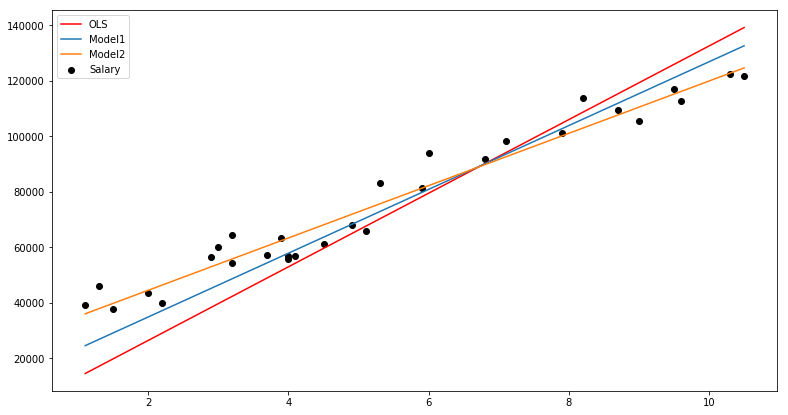

In [16]:
plt.figure(figsize=(13,7))
plt.scatter(df['YearsExperience'], df['Salary'], color='black')
plt.plot(df['YearsExperience'], result.predict(df['YearsExperience']), label = 'OLS', color='red')
plt.plot(df['YearsExperience'], [model1.predict([x])[0][0] for x in df['YearsExperience']], label ='Model1')
plt.plot(df['YearsExperience'], [model2.predict([x])[0][0] for x in df['YearsExperience']], label ='Model2')
plt.legend()

C:\Users\Mohammed Yusuf Khan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


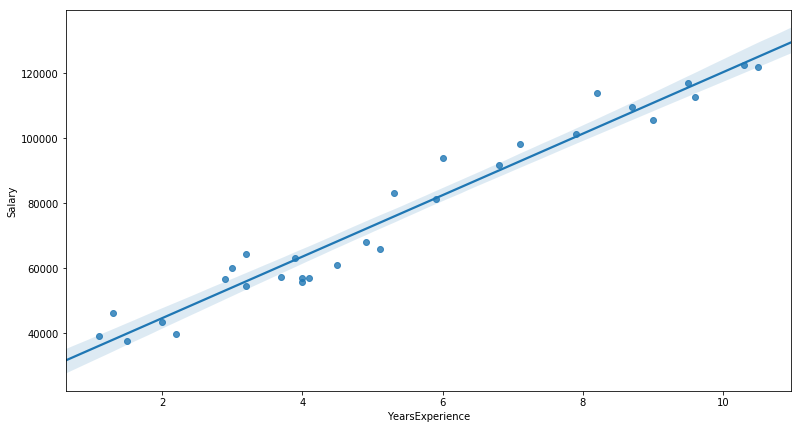

In [13]:
plt.figure(figsize=(13,7))
sns.regplot(df['YearsExperience'], df['Salary'])

In [14]:
#Ends here!